# Организация маршрута движения квадрокоптера

Одной из самых важных задач в автономной доставке грузов является организация маршрута движения между точками доставки. На рисунке ниже представлена схема точек доставки.

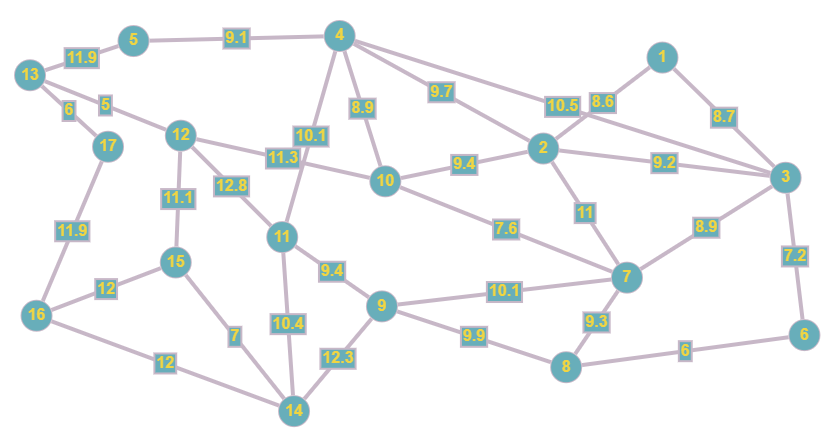

Ваша задача реализовать программный код расчета кратчайшего пути для доставки грузов квадрокоптером из стартовой точки в  конечную точку, согласно заданию. В качестве ответа принимается минимальное расстояние между этими точками.

Sample Input:

1,16

Sample Output:

50.8


## Заметки

## Решение

In [ ]:
import networkx as nx

edges = [
    (1, 2, {"weight": 8.6}),
    (1, 3, {"weight": 8.7}),
    (2, 3, {"weight": 9.2}),
    (2, 4, {"weight": 9.7}),
    (2, 7, {"weight": 11}),
    (2, 10, {"weight": 9.4}),
    (3, 4, {"weight": 10.5}),
    (3, 6, {"weight": 7.2}),
    (3, 7, {"weight": 8.9}),
    (4, 5, {"weight": 9.1}),
    (4, 10, {"weight": 8.9}),
    (4, 11, {"weight": 10.1}),
    (5, 13, {"weight": 11.9}),
    (6, 8, {"weight": 6}),
    (7, 10, {"weight": 7.6}),
    (7, 9, {"weight": 10.1}),
    (7, 8, {"weight": 9.3}),
    (8, 9, {"weight": 9.9}),
    (9, 11, {"weight": 9.4}),
    (9, 14, {"weight": 12.3}),
    (10, 12, {"weight": 11.3}),
    (11, 12, {"weight": 12.8}),
    (11, 14, {"weight": 10.4}),
    (12, 13, {"weight": 5}),
    (12, 15, {"weight": 11.1}),
    (13, 17, {"weight": 6}),
    (14, 15, {"weight": 7}),
    (14, 16, {"weight": 12}),
    (15, 16, {"weight": 12}),
    (16, 17, {"weight": 11.9}),
]

G = nx.Graph()

for i in range(1, 17):
    G.add_node(i)
G.add_edges_from(edges)

a, b = input().split(",")
path = nx.astar_path_length(G, int(a), int(b))
print(path)

1,16
50.8


In [ ]:
a, b = input().split(",")


1,16


'1'

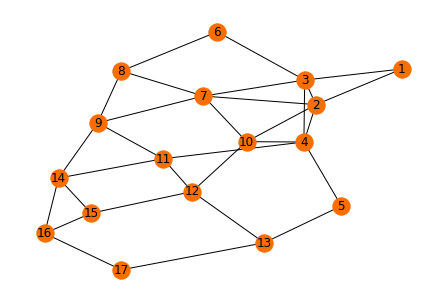

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#f86e00")
edge_labels = nx.get_edge_attributes(G, "cost")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Кратчайший путь

Дрону необходимо пролететь из точки start в точку finish по кратчайшему маршруту. На пути дрона встречаются препятствия, координаты которых известны и случайно генерируются перед каждым полетом.

Препятствия представлены в виде треугольников.
Препятствия не пересекаются и не касаются друг друга.
Размер дрона не учитывается.
Можно пролетать вплотную к стенам и углам препятствий.
Высота полета не учитывается и не задается в условиях и в ответе.
Визуализация решения варианта задачи:

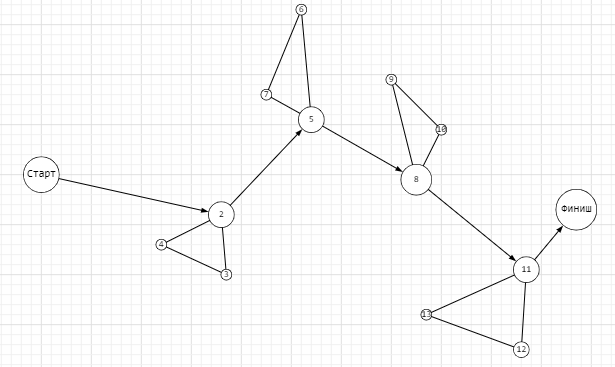

На вход программы поступают данные, где в первой строке указано количество последующих строк; во второй – точка start; в третьей – точка finish; в четвертой и в последующих строках – набор координат вершин препятствия (треугольника): x1 y1 x2 y2 x3 y3.

Программа должна рассчитывать и выводить координаты кратчайшего маршрута. Каждая точка маршрута указывается на новой строке. В одной строке должно быть два числа: x и y данной точки. В первой строке указывается точка start, в последней — finish.

Ответ считается верным, если:

длина маршрута из точки start в точку finish не превышает 102% от длины кратчайшего маршрута;
отсутствуют пересечения с препятствиями;
первая точка соответствует точке start;
последняя точка соответствует точке finish.
 

Рекомендованные библиотеки для Python: networkx для операций с графами, sympy для геометрических операций.

Sample Input:

6

0 95

200 40

2 134 2 131 5 3

79 134 75 75 91 114

102 105 113 136 141 128

185 2 178 102 162 33

Sample Output:

0 95

2 134

113 136

141 128

178 102

200 40

## Заметки
[https://ru.wikipedia.org/wiki/A*](https://ru.wikipedia.org/wiki/A*)

https://habr.com/ru/company/piter/blog/596029/

https://mathter.pro/angem/5_5_5_peresekayuschiesya_pryamye_v_prostranstve.html

https://habr.com/ru/post/267037/

https://www.interestprograms.ru/source-codes-peresechenie-dvuh-otrezkov

https://www.interestprograms.ru/source-codes-najti-tochku-peresecheniya-dvuh-luchej

https://docs.sympy.org/latest/modules/geometry/index.html

## Решение

In [ ]:
import numpy as np
import networkx as nx

from itertools import combinations
from sympy import Point, Segment

count_of_row = int(input())
obstacles = []

for i in range(count_of_row):
  if i == 0:
    a, b = input().split()
    a = int(a)
    b = int(b)
    start = np.array([a, b])
  elif i == 1:
    a, b = input().split()
    a = int(a)
    b = int(b)
    finish = np.array([a, b])
  else:
    n1, n2, n3, n4, n5, n6 = input().split()
    n1 = int(n1)
    n2 = int(n2)
    n3 = int(n3)
    n4 = int(n4)
    n5 = int(n5)
    n6 = int(n6)
    obstacles.append(np.array([[n1, n2], [n3, n4], [n5, n6]]))

obstacles = np.array(obstacles)
lines = []
nodes = [start, finish]

for obstacle in obstacles:
  lines.append(np.array([[obstacle[0], obstacle[1]], [obstacle[0], obstacle[2]], [obstacle[1], obstacle[2]]]))
  for point in obstacle:
    nodes.append(point)

lines = np.reshape(np.array(lines), ((count_of_row - 2) * 3, 2, 2))
nodes = np.array(nodes)

def is_inside_array(point, line):
  l_m = []

  for p in line:
    if p[0] == point[0] and p[1] == point[1]:
      return True
  return False

nodes_dict = {}
e = []

for i, node in enumerate(nodes):
  nodes_dict[i] = node

for i, j in combinations(nodes_dict.keys(), 2):
  node_1, node_2 = nodes_dict[i], nodes_dict[j]
  p1_1, p1_2 = Point(node_1[0], node_1[1]), Point(node_2[0], node_2[1])
  s1 = Segment(p1_1, p1_2)
  is_intersection = False

  for obstacle in lines:
    if (not is_inside_array(node_1, obstacle)) and (not is_inside_array(node_2, obstacle)):
      p2_1, p2_2 = Point(obstacle[0, 0], obstacle[0, 1]), Point(obstacle[1, 0], obstacle[1, 1])
      s2 = Segment(p2_1, p2_2)
      if s1.intersection(s2):
        is_intersection = True
        break
  if is_intersection == False:
    e.append([i, j, np.linalg.norm(node_1 - node_2)])

G = nx.Graph()

G.add_weighted_edges_from(e)

path = nx.astar_path(G, 0, 1)

for node in path:
  n = nodes_dict[node]
  print(n[0], n[1])

6
0 95
200 40
2 134 2 131 5 3
79 134 75 75 91 114
102 105 113 136 141 128
185 2 178 102 162 33


## Черновик

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = np.array([0, 95])
finish = np.array([200, 40])
obstacles = np.array([[[2, 134], [2, 131], [5, 3]],
                      [[79, 134], [75, 75], [91, 114]],
                      [[102, 105], [113, 136], [141, 128]],
                      [[185, 2], [178, 102], [162, 33]]])

In [ ]:
X = np.reshape(obstacles, (obstacles.shape[0] * obstacles.shape[1], 2))
X

array([[  2, 134],
       [  2, 131],
       [  5,   3],
       [ 79, 134],
       [ 75,  75],
       [ 91, 114],
       [102, 105],
       [113, 136],
       [141, 128],
       [185,   2],
       [178, 102],
       [162,  33]])

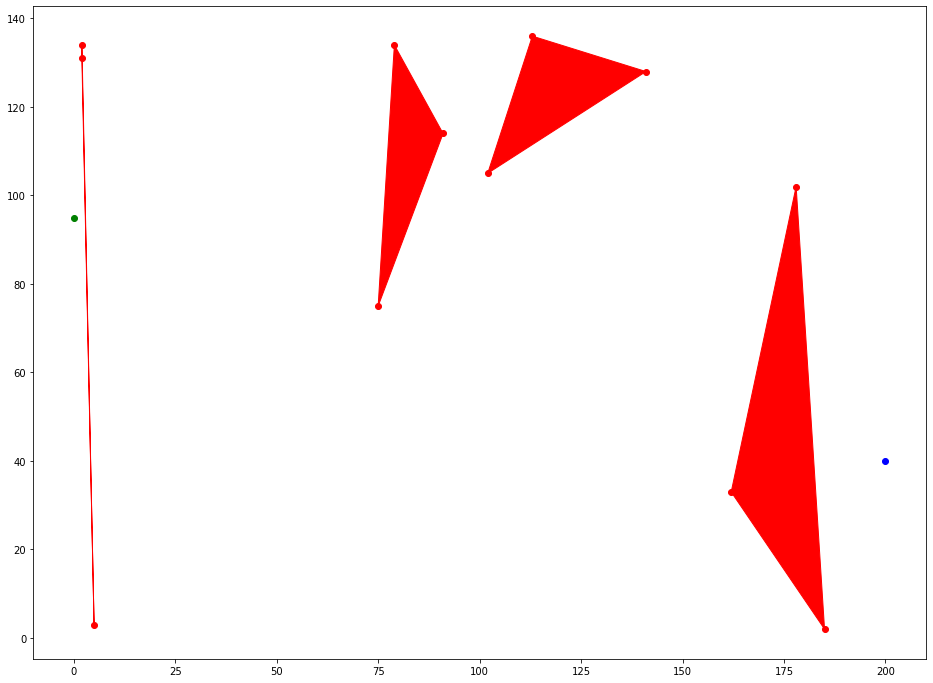

In [ ]:
plt.figure(figsize=(16, 12))
plt.scatter(start[0], start[1], c="g")
plt.scatter(finish[0], finish[1], c="b")

for obstacle in obstacles:
  for point in obstacle:
    plt.scatter(point[0], point[1], c="r")
  t1 = plt.Polygon(obstacle, color="r")
  plt.gca().add_patch(t1)

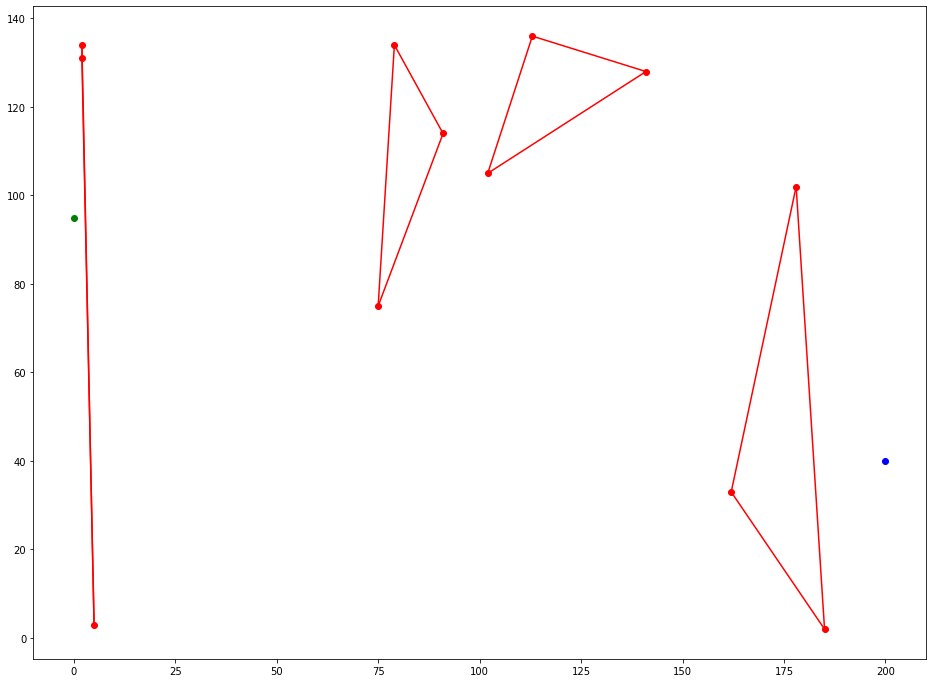

In [ ]:
lines = []
nodes = [start, finish]

plt.figure(figsize=(16, 12))
plt.scatter(start[0], start[1], c="g")
plt.scatter(finish[0], finish[1], c="b")

for obstacle in obstacles:
  lines.append(np.array([[obstacle[0], obstacle[1]], [obstacle[0], obstacle[2]], [obstacle[1], obstacle[2]]]))
  for point in obstacle:
    nodes.append(point)
    plt.scatter(point[0], point[1], c="r")
  
  for line in lines[-1]:
    plt.plot(line[:, 0], line[:, 1], c="r")
# указать входное количество пряпетствий
lines = np.reshape(np.array(lines), (4 * 3, 2, 2))
nodes = np.array(nodes)

[Point2D(73/16, 61/16)]

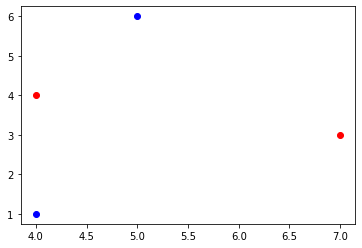

In [ ]:
from sympy import Point, Segment

l1 = np.array([[4, 4], [7, 3]])
l2 = np.array([[4, 1], [5, 6]])

for line in l1:
    plt.scatter(line[0], line[1], c="r")
    
for line in l2:
    plt.scatter(line[0], line[1], c="b")

l1_1, l1_2 = Point(l1[0, 0], l1[0, 1]), Point(l1[1, 0], l1[1, 1])
l2_1, l2_2 = Point(l2[0, 0], l2[0, 1]), Point(l2[1, 0], l2[1, 1])

l1 = Segment(l1_1, l1_2)
l2 = Segment(l2_1, l2_2)
l1.intersection(l2)

In [ ]:
def is_inside_array(point, line):
  l_m = []

  for p in line:
    if p[0] == point[0] and p[1] == point[1]:
      return True
  return False

is_inside_array(np.array([2, 134]), np.array([[2, 131], [5,3]]))

False

In [ ]:
from itertools import combinations

nodes_dict = {}
# для визуализации
edge_dict = {}
# для построения графа
e = []

for i, node in enumerate(nodes):
  nodes_dict[i] = node

for i, j in combinations(nodes_dict.keys(), 2):
  node_1, node_2 = nodes_dict[i], nodes_dict[j]
  p1_1, p1_2 = Point(node_1[0], node_1[1]), Point(node_2[0], node_2[1])
  s1 = Segment(p1_1, p1_2)
  is_intersection = False

  for obstacle in lines:
    # Оба узла отсутствуют в препятсвтиях
    if (not is_inside_array(node_1, obstacle)) and (not is_inside_array(node_2, obstacle)):
      p2_1, p2_2 = Point(obstacle[0, 0], obstacle[0, 1]), Point(obstacle[1, 0], obstacle[1, 1])
      s2 = Segment(p2_1, p2_2)
      if s1.intersection(s2):
        is_intersection = True
        break
  if is_intersection == False:
    # для визуализации
    edge_dict[tuple([i, j])] = np.linalg.norm(node_1 - node_2)
    # для построения графа
    e.append([i, j, np.linalg.norm(node_1 - node_2)])

In [ ]:
edge_dict

{(0, 2): 39.05124837953327,
 (0, 3): 36.05551275463989,
 (0, 4): 92.13576938409967,
 (1, 11): 40.85339643163099,
 (1, 12): 65.7875368135941,
 (2, 3): 3.0,
 (2, 4): 131.03434664239754,
 (2, 5): 77.0,
 (2, 6): 93.86160024205851,
 (2, 9): 111.01801655587259,
 (3, 4): 128.03515142334936,
 (4, 5): 150.45597362683876,
 (4, 6): 100.41912168506553,
 (4, 10): 184.7187050625897,
 (4, 11): 180.00277775634464,
 (4, 12): 199.32385707686876,
 (4, 13): 159.84054554461454,
 (5, 6): 59.135437767890075,
 (5, 7): 23.323807579381203,
 (5, 8): 37.013511046643494,
 (5, 9): 34.058772731852805,
 (6, 7): 42.15447781671598,
 (6, 8): 40.36087214122113,
 (6, 9): 71.8679344353238,
 (6, 10): 84.64632301523794,
 (6, 11): 132.01893803541975,
 (6, 12): 106.48004507887852,
 (6, 13): 96.60745312862771,
 (7, 8): 14.212670403551895,
 (7, 9): 31.11269837220809,
 (7, 11): 146.21901381147393,
 (7, 13): 107.71258050942797,
 (8, 9): 32.89376840679705,
 (8, 10): 45.27692569068709,
 (8, 11): 132.2800060477773,
 (8, 12): 76.05918

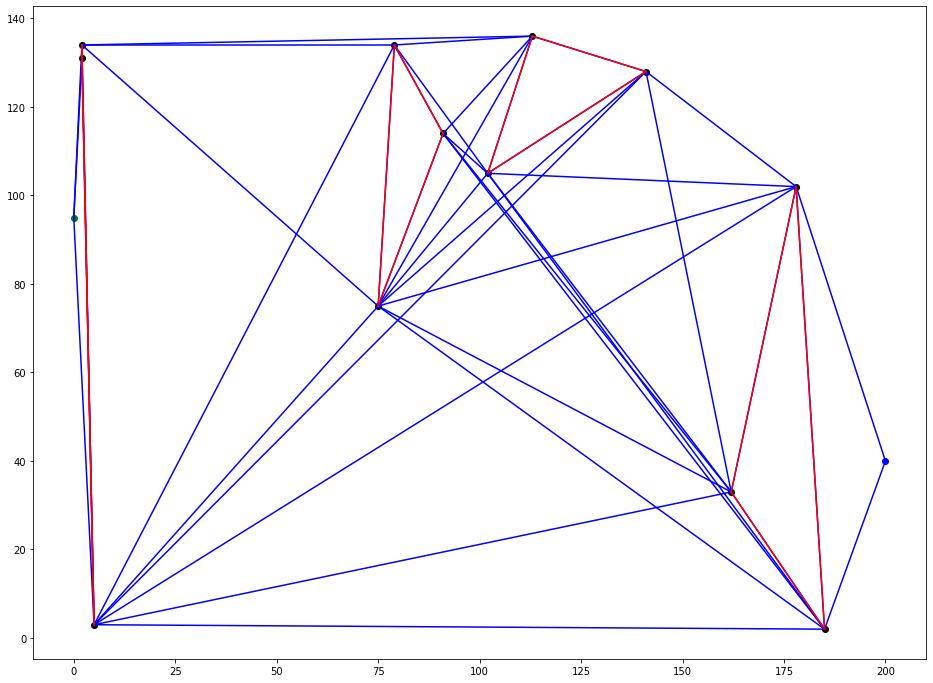

In [ ]:
plt.figure(figsize=(16, 12))
plt.scatter(start[0], start[1], c="g")
plt.scatter(finish[0], finish[1], c="b")

for obstacle in obstacles:
  for point in obstacle:
    plt.scatter(point[0], point[1], c="black")
  
for edge, _ in edge_dict.items():
  i += 1
  x = [nodes_dict[edge[0]][0], nodes_dict[edge[1]][0]]
  y = [nodes_dict[edge[0]][1], nodes_dict[edge[1]][1]]
  plt.plot(x, y, c="b")

for line in lines:
  plt.plot(line[:, 0], line[:, 1], c="r")

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_weighted_edges_from(e)

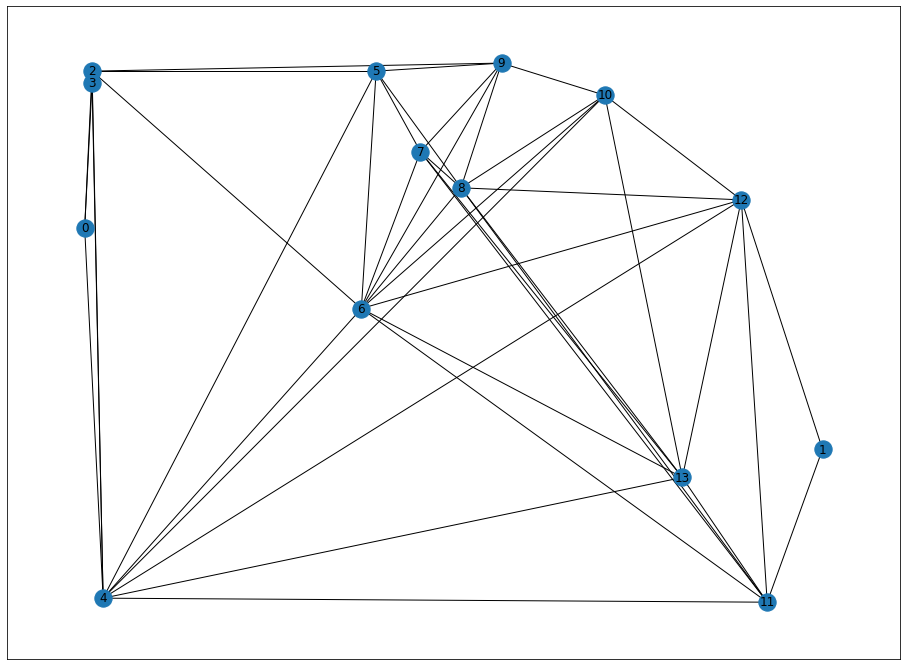

In [ ]:
plt.figure(figsize=(16, 12))

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, pos=nodes_dict)

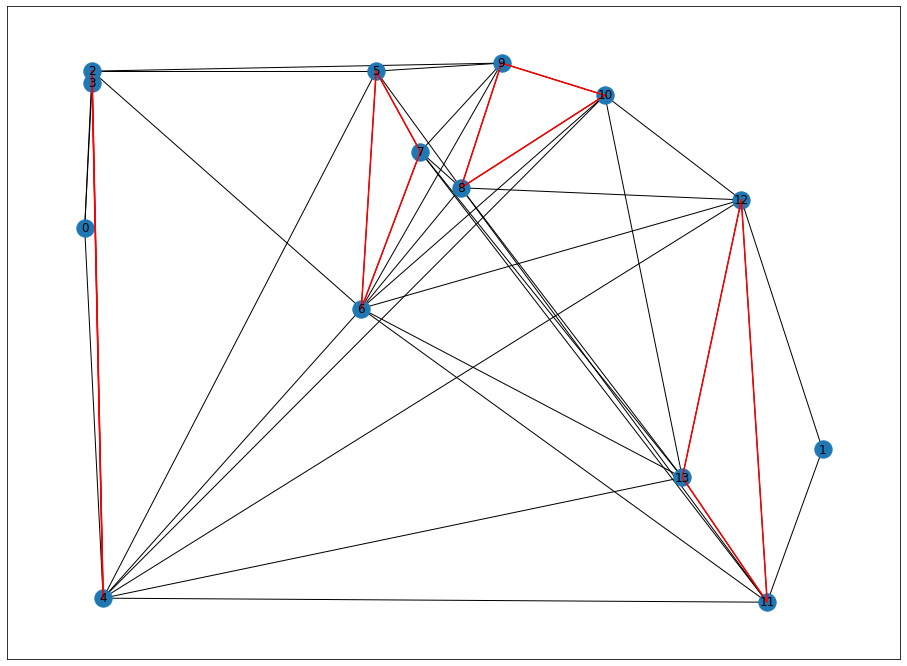

In [ ]:
plt.figure(figsize=(16, 12))
for line in lines:
  plt.plot(line[:, 0], line[:, 1], c="r")
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, pos=nodes_dict)

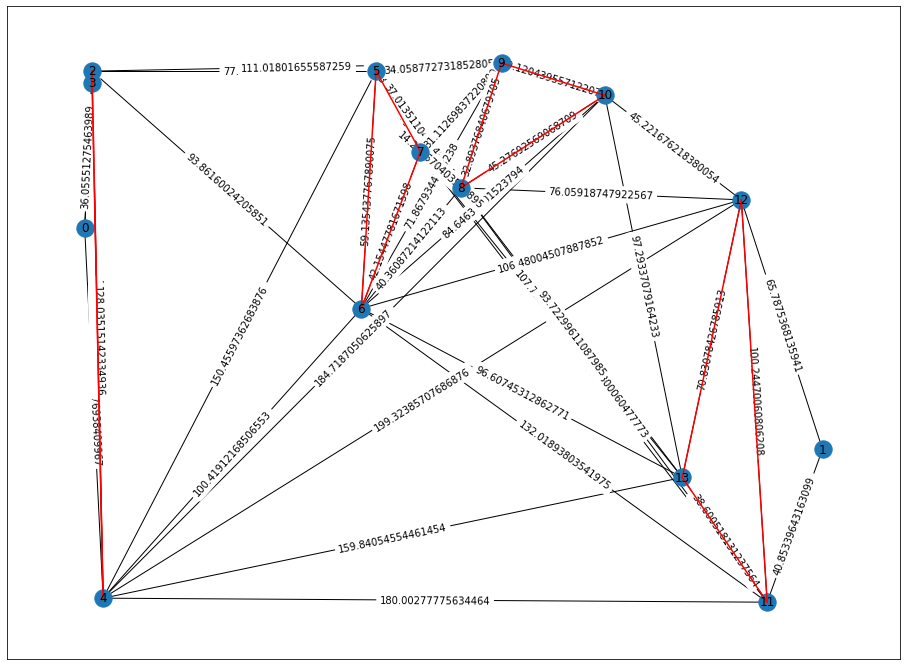

In [ ]:
plt.figure(figsize=(16, 12))
for line in lines:
  plt.plot(line[:, 0], line[:, 1], c="r")
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx(G, pos=nodes_dict)
nx.draw_networkx_edge_labels(G, nodes_dict, edge_labels=labels);

In [ ]:
path = nx.astar_path(G, 0, 1)
path

[0, 2, 9, 10, 12, 1]

In [ ]:
distance = 0

for n1, n2 in zip(path, path[1:]):
  distance += G[n1][n2]["weight"]
distance

290.1989175245021

In [ ]:
for node in path:
  print(nodes_dict[node])

[ 0 95]
[  2 134]
[113 136]
[141 128]
[178 102]
[200  40]


#Запутанный лабиринт

Дрону загружается изображение карты лабиринта из интернета по ссылке. Карта лабиринта представляет собой квадратное изображение, на которым черные пиксели обозначают стены. Один пиксель соответствует одной физической единице длины в реальном мире. Автопилот может посылать полётному контроллеру беспилотника только команды переместиться на эту физическую величину налево, направо, вперед или назад. Назовем выполнение одной команды - одним шагом. Перед тем как сгенерировать команды дрону для успешного прохождения от старта к финишу, автопилоту необходимо найти кратчайший маршрут от старта, где сейчас находится беспилотник, до финиша. Старт находится в пикселе с координатами (1, 0), а финиш в точке (ширина изображения - 2, ширина изображения - 1). Ваша задача написать программу на языке Python, которая посчитает минимальное количество шагов, которое необходимо будет сделать дрону, чтобы оказаться в точке финиша. Пример лабиринта можно увидеть на изображении ниже, и к этой же картинке ведет ссылка в тесте №1 :

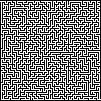

Sample Input:

https://stepik.org/media/attachments/course/128568/maze0.png

Sample Output:

986


## Заметки

Здесь нужно восоздать граф по картинке а далее найти самый краткий путь в графе.

https://habr.com/ru/company/piter/blog/596029/

# Решение

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np
import networkx as nx

req = urllib.request.urlopen(input())
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_src = cv.imdecode(arr, -1)
_, img_gray = cv.threshold(cv.cvtColor(img_src, cv.COLOR_BGR2GRAY), 100, 255, cv.THRESH_BINARY)

start = (1, 0)
finish = (img_gray.shape[0] - 2, img_gray.shape[1] - 1)

nodes_dict = {}
node_i = 0

for i, vec in enumerate(img_gray):
  for j, pixel in enumerate(vec):
    if pixel != 0:
      nodes_dict[tuple([i, j])] = node_i
      node_i += 1

e = []

for i, vec in enumerate(img_gray):
  for j, pixel in enumerate(vec):
    if pixel != 0:
      # Если пиксель не самый верхний, то проверяем верхнего соседа
      if j != img_gray.shape[0] - 1:
        # проверяем верхнего соседа
        if img_gray[i, j + 1] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i, j + 1)], 1])
      
      # Если пиксель не самый нижний, то проверяем нижнего соседа
      if j != 0:
        # проверяем нижнего соседа
        if img_gray[i, j - 1] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i, j - 1)], 1])
      
      # Если пиксель не самый левый, то проверяем правого соседа
      if i != 0:
        # проверяем левого соседа
        if img_gray[i - 1, j] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i - 1, j)], 1])
      
      # Если пиксель не самый правый, то проверяем правого соседа
      if i != img_gray.shape[0] - 1:
        # проверяем правого соседа
        if img_gray[i + 1, j] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i + 1, j)], 1])

G = nx.Graph()

G.add_weighted_edges_from(e)

path = nx.astar_path(G, nodes_dict[start], nodes_dict[finish])
print(len(path) - 1)

https://stepik.org/media/attachments/course/128568/maze0.png
986


## Черновик

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

req = urllib.request.urlopen("https://stepik.org/media/attachments/course/128568/maze0.png")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_src = cv.imdecode(arr, -1)
_, img_gray = cv.threshold(cv.cvtColor(img_src, cv.COLOR_BGR2GRAY), 100, 255, cv.THRESH_BINARY)

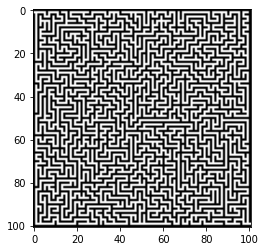

In [ ]:
plt.imshow(img_src);

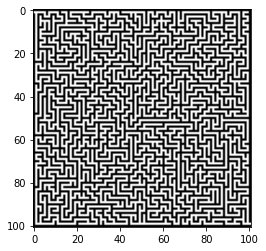

In [ ]:
plt.imshow(img_gray, cmap="gray");

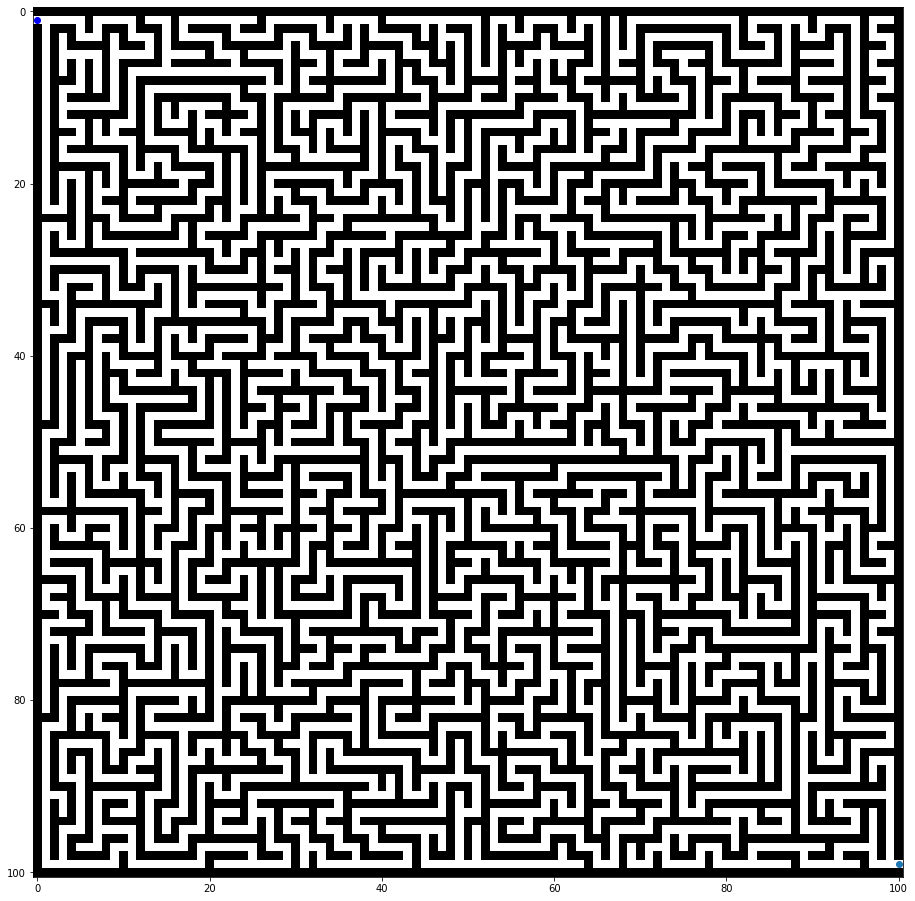

In [ ]:
start = (1, 0)
finish = (img_gray.shape[0] - 2, img_gray.shape[1] - 1)

plt.figure(figsize=(16, 16))
plt.scatter(start[1], start[0], c="b")

plt.scatter(finish[1], finish[0])
plt.imshow(img_gray, cmap="gray");

In [ ]:
nodes_dict = {}
node_i = 0

for i, vec in enumerate(img_gray):
  for j, pixel in enumerate(vec):
    if pixel != 0:
      nodes_dict[tuple([i, j])] = node_i
      node_i += 1

In [ ]:
e = []

for i, vec in enumerate(img_gray):
  for j, pixel in enumerate(vec):
    if pixel != 0:
      # Если пиксель не самый верхний, то проверяем верхнего соседа
      if j != img_gray.shape[0] - 1:
        # проверяем верхнего соседа
        if img_gray[i, j + 1] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i, j + 1)], 1])
      
      # Если пиксель не самый нижний, то проверяем нижнего соседа
      if j != 0:
        # проверяем нижнего соседа
        if img_gray[i, j - 1] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i, j - 1)], 1])
      
      # Если пиксель не самый левый, то проверяем правого соседа
      if i != 0:
        # проверяем левого соседа
        if img_gray[i - 1, j] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i - 1, j)], 1])
      
      # Если пиксель не самый правый, то проверяем правого соседа
      if i != img_gray.shape[0] - 1:
        # проверяем правого соседа
        if img_gray[i + 1, j] != 0:
          e.append([nodes_dict[(i, j)], nodes_dict[(i + 1, j)], 1])

In [ ]:
e

[[0, 1, 1],
 [1, 2, 1],
 [1, 0, 1],
 [1, 86, 1],
 [2, 3, 1],
 [2, 1, 1],
 [3, 4, 1],
 [3, 2, 1],
 [4, 5, 1],
 [4, 3, 1],
 [5, 4, 1],
 [5, 87, 1],
 [6, 7, 1],
 [6, 88, 1],
 [7, 8, 1],
 [7, 6, 1],
 [8, 9, 1],
 [8, 7, 1],
 [9, 10, 1],
 [9, 8, 1],
 [10, 9, 1],
 [10, 89, 1],
 [11, 12, 1],
 [12, 13, 1],
 [12, 11, 1],
 [13, 12, 1],
 [13, 90, 1],
 [14, 15, 1],
 [14, 91, 1],
 [15, 16, 1],
 [15, 14, 1],
 [16, 17, 1],
 [16, 15, 1],
 [17, 18, 1],
 [17, 16, 1],
 [18, 19, 1],
 [18, 17, 1],
 [19, 20, 1],
 [19, 18, 1],
 [20, 21, 1],
 [20, 19, 1],
 [20, 92, 1],
 [21, 22, 1],
 [21, 20, 1],
 [22, 21, 1],
 [23, 24, 1],
 [23, 93, 1],
 [24, 25, 1],
 [24, 23, 1],
 [25, 26, 1],
 [25, 24, 1],
 [26, 27, 1],
 [26, 25, 1],
 [27, 28, 1],
 [27, 26, 1],
 [28, 29, 1],
 [28, 27, 1],
 [29, 28, 1],
 [29, 94, 1],
 [30, 31, 1],
 [30, 95, 1],
 [31, 32, 1],
 [31, 30, 1],
 [32, 33, 1],
 [32, 31, 1],
 [32, 96, 1],
 [33, 34, 1],
 [33, 32, 1],
 [34, 33, 1],
 [34, 97, 1],
 [35, 36, 1],
 [36, 37, 1],
 [36, 35, 1],
 [37, 38, 1],
 

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_weighted_edges_from(e)

In [ ]:
path = nx.astar_path(G, nodes_dict[start], nodes_dict[finish])
path

[0,
 1,
 2,
 3,
 4,
 5,
 87,
 118,
 119,
 120,
 88,
 6,
 7,
 8,
 9,
 10,
 89,
 122,
 123,
 124,
 189,
 222,
 221,
 220,
 219,
 218,
 290,
 319,
 392,
 417,
 490,
 517,
 516,
 515,
 514,
 513,
 512,
 511,
 589,
 614,
 615,
 616,
 685,
 718,
 717,
 716,
 789,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 890,
 917,
 990,
 1020,
 1019,
 1018,
 1088,
 1117,
 1118,
 1119,
 1191,
 1216,
 1217,
 1218,
 1219,
 1220,
 1221,
 1222,
 1192,
 1123,
 1124,
 1125,
 1126,
 1127,
 1090,
 1028,
 1029,
 1030,
 992,
 926,
 894,
 829,
 828,
 827,
 826,
 825,
 791,
 728,
 727,
 726,
 725,
 724,
 688,
 621,
 591,
 519,
 492,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 493,
 526,
 527,
 528,
 595,
 630,
 629,
 628,
 691,
 732,
 733,
 734,
 792,
 831,
 896,
 928,
 994,
 1032,
 1092,
 1131,
 1130,
 1129,
 1194,
 1228,
 1227,
 1226,
 1225,
 1224,
 1293,
 1326,
 1327,
 1328,
 1393,
 1430,
 1431,
 1432,
 1394,
 1329,
 1330,
 1331,
 1294,
 1229,
 1230,
 1231,
 1232,
 1233,
 1234,
 1235,
 1195,
 

In [ ]:
len(path) - 1

986

#Cкитлстрянка

С помощью цветовой метки можно просто выделить на фоне какой-либо объект для дальнейшего его поиска с помощью компьютерного зрения. На входном изображении разбросаны цветовые метки. Необходимо найти их количество, и результат вывести в формате и последовательности как указано в Output. Все возможные цвета представлены на изображении ниже:

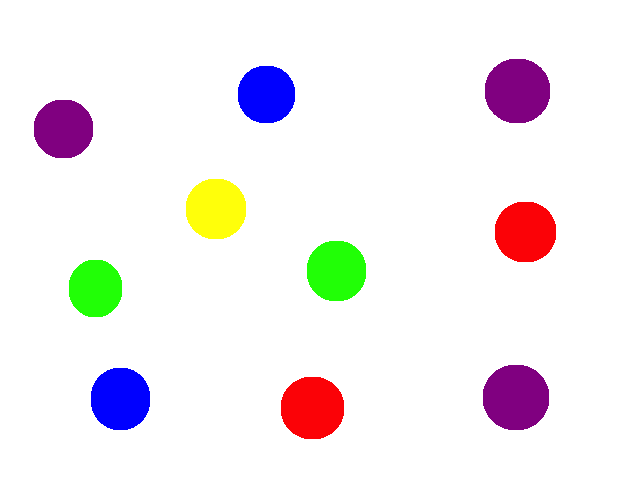

Sample Input:

https://stepik.org/media/attachments/course/128568/color1.png

Sample Output:

red: 2
yellow: 1
green: 2
blue: 2
purple: 3

## Заметки
https://vc.ru/dev/286152-poisk-obektov-cherez-opredelenie-ih-konturov-sredstvami-opencv

https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html

https://roboticsvision.wordpress.com/2017/04/04/%D0%BF%D0%BE%D0%B8%D1%81%D0%BA-%D0%BA%D1%80%D1%83%D0%B3%D0%BE%D0%B2-%D0%BA%D1%80%D1%83%D0%B3%D0%BB%D1%8B%D1%85-%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%BE%D0%B2-%D0%BD%D0%B0-%D0%B8%D0%B7%D0%BE%D0%B1/

# Решение

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np

from collections import Counter

req = urllib.request.urlopen(input())
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
scale_percent = 0.5
src = cv.imdecode(arr, -1)
src = cv.resize(src, (int(src.shape[1] * scale_percent), int(src.shape[0] * scale_percent)))

img_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)
img_g = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
ret, gray_threshed = cv.threshold(img_g, 254, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(gray_threshed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

contour_list = []

for contour in contours:
  if len(contour) > 8:
    contour_list.append(contour)

colors = []

for circle_points in np.array(contour_list):
  a = np.array([circle_points[2, 0, 0], circle_points[2, 0, 1]])
  a[1] += 10
  colors.append(img_rgb[a[1], a[0], :])

color_dict = {tuple([251, 2, 7]): "red",
              tuple([255, 255, 10]): "yellow",
              tuple([33, 255, 6]): "green",
              tuple([0, 0, 255]): "blue",
              tuple([128, 0, 128]): "purple"}
counter = Counter()

for color in colors:
  counter[color_dict[tuple(color)]] += 1

print("red:", counter["red"])
print("yellow:", counter["yellow"])
print("green:", counter["green"])
print("blue:", counter["blue"])
print("purple:", counter["purple"])

https://stepik.org/media/attachments/course/128568/color1.png
red: 2
yellow: 1
green: 2
blue: 2
purple: 3


<ipython-input-25-c8af52b19ce1>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for circle_points in np.array(contour_list):


## Черновик

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

url = "https://stepik.org/media/attachments/course/128568/color1.png"

req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
scale_percent = 0.5
src = cv.imdecode(arr, -1)
src = cv.resize(src, (int(src.shape[1] * scale_percent), int(src.shape[0] * scale_percent)))

In [ ]:
img_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)
img_g = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
ret, gray_threshed = cv.threshold(img_g, 254, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(gray_threshed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

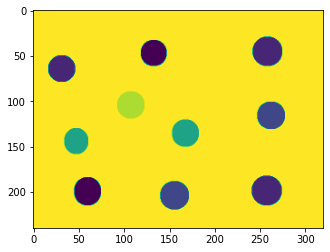

In [ ]:
plt.imshow(img_g);

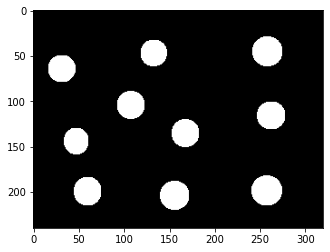

In [ ]:
plt.imshow(gray_threshed, cmap="binary");

In [ ]:
contour_list = []

for contour in contours:
  if len(contour) > 8:
    contour_list.append(contour)

In [ ]:
len(contour_list)

10

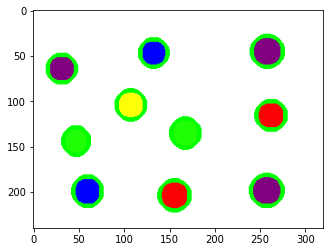

In [ ]:
plt.imshow(cv.drawContours(img_rgb.copy(), contour_list, -1, (0, 255, 0), 3));

<ipython-input-20-f775e406646e>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for circle_points in np.array(contour_list):


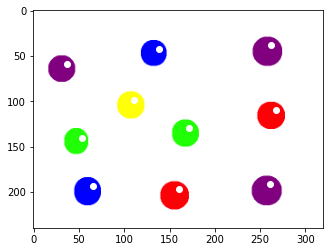

In [ ]:
colors = []

for circle_points in np.array(contour_list):
  a = np.array([circle_points[2, 0, 0], circle_points[2, 0, 1]])
  a[1] += 10
  colors.append(img_rgb[a[1], a[0], :])
  plt.scatter(a[0], a[1], c="w")
  plt.imshow(img_rgb)

In [ ]:
colors

[array([251,   2,   7], dtype=uint8),
 array([  0,   0, 255], dtype=uint8),
 array([128,   0, 128], dtype=uint8),
 array([ 33, 255,   6], dtype=uint8),
 array([ 33, 255,   6], dtype=uint8),
 array([251,   2,   7], dtype=uint8),
 array([255, 255,  10], dtype=uint8),
 array([128,   0, 128], dtype=uint8),
 array([  0,   0, 255], dtype=uint8),
 array([128,   0, 128], dtype=uint8)]

In [ ]:
from collections import Counter

color_dict = {tuple([251, 2, 7]): "red",
              tuple([255, 255, 10]): "yellow",
              tuple([33, 255, 6]): "green",
              tuple([0, 0, 255]): "blue",
              tuple([128, 0, 128]): "purple"}
counter = Counter()

for color in colors:
  counter[color_dict[tuple(color)]] += 1

In [ ]:
print("red:", counter["red"])
print("yellow:", counter["yellow"])
print("green:", counter["green"])
print("blue:", counter["blue"])
print("purple:", counter["purple"])

red: 2
yellow: 1
green: 2
blue: 2
purple: 3


#Инвентаризация

Все чаще встречаются решения на базе беспилотников в области логистики. На нашем складе fpv оборудования необходимо провести инвентаризацию. Квадрокоптер подлетает к стеллажу и с помощью алгоритмов компьютерного зрения должен понять что за товар находится в каждой ячейке стеллажа, и верно ли его местоположение. В каждом QR коде зашифрована следующая информация: "name; i; j", где name - наименование товара, i - номер полки снизу, начиная с единицы, j - номер ряда слева, начиная с единицы. Гарантируется, что на i-й полке и в j-м ряду может быть только один QR. Количество полок и рядов заранее неизвестно. Визуальный пример представлен на изображении ниже:

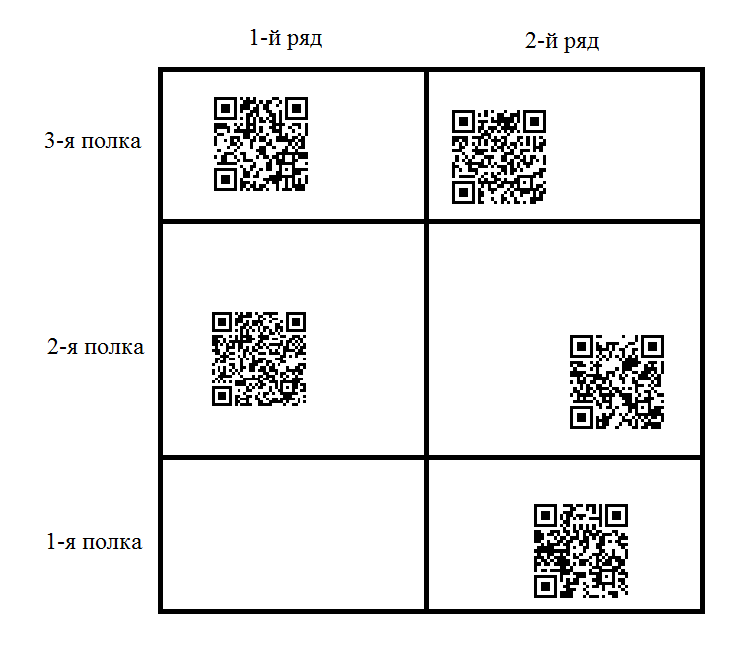

Ваша программа принимает на вход ссылку на изображение стеллажа с QR кодами. Необходимо вывести отчет в следующем формате: "i-я полка j-й ряд. Наименование товара. Расположение верное/неверное." Если товара нет на полке то формат вывода такой "i-я полка j-й ряд. Товар отсутствует." Последовательность вывода должна идти по возрастанию j, затем по возрастанию i. (Смотри пример Output в Тесте №1).

**Замечание: на Stepik не подключена библиотека pyzbar, а также OpenCV только версии 3.4.4 на Python 3.6.2. На Python 3.10 OpenCV свежая, но через сервера Stepik на этой версии Python вероятно не работает скачивайте по url.**

Sample Input:

https://stepik.org/media/attachments/course/128568/shelfQR0.png

Sample Output:

1-я полка 1-й ряд. Товар отсутствует.

1-я полка 2-й ряд. Монитор Hawkeye Little Pilot. Расположение верное.

2-я полка 1-й ряд. Аппаратура управления RadioMaster. Расположение верное.

2-я полка 2-й ряд. Ремешок Foxeer Silicon Durable. Расположение верное.

3-я полка 1-й ряд. Аккумулятор GNB 850mah 3S 80C. Расположение верное.

3-я полка 2-й ряд. Переключатель RadioMaster. Расположение неверное.

## Заметки

## Решение

In [ ]:
! pip install opencv-python==3.4.8.29

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.3 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


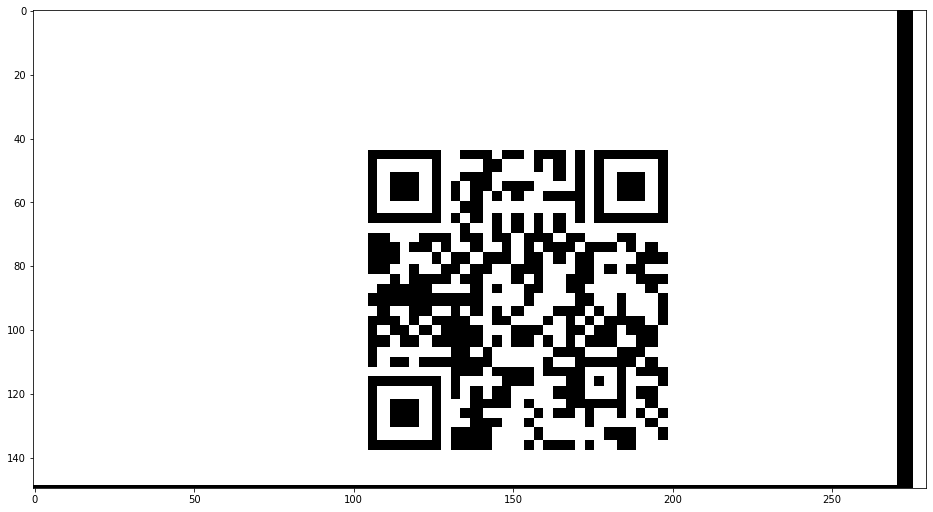

In [ ]:
import random

plt.figure(figsize=(16, 14))
#plt.imshow(img_src[468:468 + 149, 337:337 + 271])
plt.imshow(img_src[468:468 + 150, 337:337 + 280])

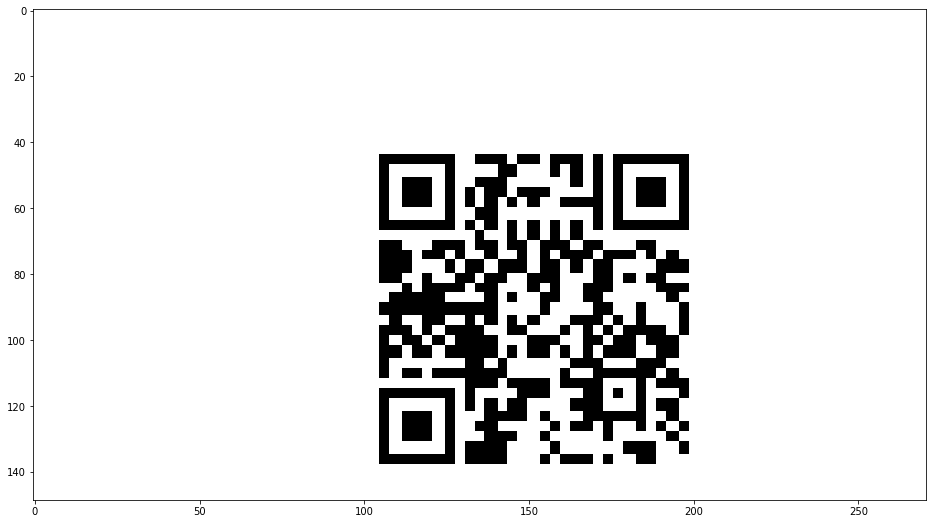

In [ ]:
plt.figure(figsize=(16, 14))
plt.imshow(places[0])

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np

# delete
import matplotlib.pyplot as plt


url = "https://stepik.org/media/attachments/course/128568/shelfQR0.png"
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_src = cv.imdecode(arr, -1)
img_gray = cv.cvtColor(img_src, cv.COLOR_BGR2GRAY)

_, contours, _ = cv.findContours(img_gray.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

places = []
qr = cv.QRCodeDetector()
#plt.imshow(cv.drawContours(img_src, contours, -1, (0,255,0), 3))
for i, contour in enumerate(contours):
  rect = cv.minAreaRect(contour)
  box = cv.boxPoints(rect)
  box = np.int0(box)
  area = int(rect[1][0]*rect[1][1])

  if area > 10000 and area < 100000:
    (x, y, w, h) = cv.boundingRect(contour)
    rect = img_src[y:y + h + 2, x:x + w]
    _, place, points = qr.detectAndDecode(rect)
    print(place)
    #rect = img_src[y:y + h + 10 , x:x + w]
    places.append(rect)


[[[105.  44.]]

 [[198.  44.]]

 [[198. 137.]]

 [[105. 137.]]]
None
[[[141. 111.]]

 [[234. 111.]]

 [[234. 204.]]

 [[141. 204.]]]
None
None
None


In [ ]:
place.flatten()

array([141., 111., 234., 111., 234., 204., 141., 204.], dtype=float32)

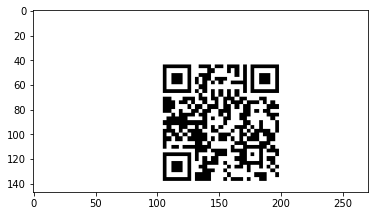

In [ ]:
plt.imshow(places[0])

In [ ]:
qr = cv.QRCodeDetector()

_, place, points = qr.detectAndDecode(img_src[468:468 + 150, 337:337 + 280])
print(place)

[[[105.  44.]]

 [[198.  44.]]

 [[198. 137.]]

 [[105. 137.]]]


In [ ]:
places[0].shape

(150, 250, 3)

In [ ]:
places[2].shape

(150, 250, 3)

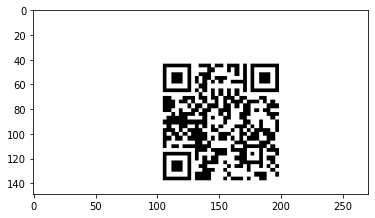

In [ ]:
plt.imshow(places[0])

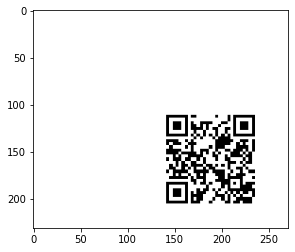

In [ ]:
plt.imshow(places[2])

In [ ]:
import cv2 as cv
import numpy as np
import urllib.request

url = input()
cv.setNumThreads(0)
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_src = cv.imdecode(arr, -1)
gray = cv.cvtColor(img_src, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 254, 255, cv.THRESH_BINARY)

_, contours, hierarchy = cv.findContours(gray.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

places = []
for idx, cnt in enumerate(contours):
        rect = cv.minAreaRect(cnt)
        box = cv.boxPoints(rect)
        box = np.int0(box)
        area = int(rect[1][0]*rect[1][1])
        if area > 10000 and area < 100000:
          (x, y, w, h) = cv.boundingRect(cnt)
          letter_crop = gray[y:y + h, x:x + w]
          letter_square = letter_crop
          _, img = cv.threshold(cv.resize(letter_square, (w, h), interpolation=cv.INTER_AREA), 0, 255, cv.THRESH_BINARY)
          places.append((x, y, img))

places.sort(key=lambda x: x[0], reverse=True)

first_column_x = places[0][0]
count_row = 0

for x, _, _ in places:
  if x != first_column_x:
    break
  count_row += 1
count_column = int(len(places) / count_row)

qr = cv.QRCodeDetector()

points_qr = np.array([[[2., 2.]], [[95., 2.]], [[95., 95.]], [[2., 95.]]])

boxes = []
for _, _, image in places:
  is_find = False
  for i, row in enumerate(image):
    for j, pixel in enumerate(row):
      if pixel != 255:
        for k in range(len(row)):
          if row[-k] != 255:
            is_find = True
        break
    if is_find == True:
      boxes.append([i, j])
      break 
  if is_find == False:
    boxes.append([int(10), int(10)])

shelf_map = np.zeros(shape=(count_row, count_column), dtype="U200")

for i, j in zip(range(0, count_row * count_column), boxes):
  data, points = qr.decode(places[i][2][j[0]-2:j[0] + 96, j[1]-2:j[1]+96], points=points_qr)
  if data:
    name, row, column = data.split(";")[0], int(data.split(";")[1]),  int(data.split(";")[2])
    shelf_map[(row - 1), (column - 1)] = name

shelf_current = np.zeros(shape=(count_row, count_column), dtype="U200")
current_row = 0
current_column = count_column - 1

for i, j in zip(range(0, count_row * count_column), boxes):
  data, points = qr.decode(places[i][2][j[0]-2:j[0] + 96, j[1]-2:j[1]+96], points=points_qr)
  if data:
    name, row, column = data.split(";")[0], int(data.split(";")[1]),  int(data.split(";")[2])
    shelf_current[current_row, current_column] = name
  
  if current_row == count_row - 1:
    current_row = 0
    current_column -= 1
  else:
    current_row += 1

for i in range(count_row):
  for j in range(count_column):
    if shelf_current[i, j]:
      print(f"{i+1}-я полка {j+1}-й ряд. {shelf_current[i, j]}. {'Расположение верное' if (shelf_current[i, j] == shelf_map[i, j]) else 'Расположение неверное'}.")
    else:
      print(f"{i+1}-я полка {j+1}-й ряд. Товар отсутствует.")

https://stepik.org/media/attachments/course/128568/shelfQR0.png
1-я полка 1-й ряд. Товар отсутствует.
1-я полка 2-й ряд. Монитор Hawkeye Little Pilot. Расположение верное.
2-я полка 1-й ряд. Аппаратура управления RadioMaster. Расположение верное.
2-я полка 2-й ряд. Ремешок Foxeer Silicon Durable. Расположение верное.
3-я полка 1-й ряд. Аккумулятор GNB 850mah 3S 80C. Расположение верное.
3-я полка 2-й ряд. Переключатель RadioMaster. Расположение неверное.


In [ ]:
import cv2 as cv
import numpy as np
import urllib.request

url = "https://stepik.org/media/attachments/course/128568/shelfQR0.png"
cv.setNumThreads(0)
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_src = cv.imdecode(arr, -1)
gray = cv.cvtColor(img_src, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 254, 255, cv.THRESH_BINARY)

_, contours, hierarchy = cv.findContours(gray.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

places = []
for idx, cnt in enumerate(contours):
        rect = cv.minAreaRect(cnt)
        box = cv.boxPoints(rect)
        box = np.int0(box)
        area = int(rect[1][0]*rect[1][1])
        if area > 10000 and area < 100000:
          cv.drawContours(gray,[box],0,(255,0,0),1)
          (x, y, w, h) = cv.boundingRect(cnt)
          cv.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 1)
          letter_crop = gray[y:y + h, x:x + w]
          size_max = max(w, h)
          letter_square = letter_crop
          _, img = cv.threshold(cv.resize(letter_square, (w, h), interpolation=cv.INTER_AREA), 0, 255, cv.THRESH_BINARY)
          places.append((x, y, img))

places.sort(key=lambda x: x[0], reverse=True)
first_column_x = places[0][0]
count_row = 0

for x, _, _ in places:
  if x != first_column_x:
    break
  count_row += 1
count_column = int(len(places) / count_row)

qr = cv.QRCodeDetector()

points_qr = np.array([[[2., 2.]], [[95., 2.]], [[95., 95.]], [[2., 95.]]])
place, points = qr.detect(places[1][2][109:111 + 95, 139:141+95])
print(place)
'''
boxes = []
for _, _, image in places:
  is_find = False
  for i, row in enumerate(image):
    for j, pixel in enumerate(row):
      if pixel != 255:
        for k in range(len(row)):
          if row[-k] != 255:
            is_find = True
        break
    if is_find == True:
      boxes.append([i, j])
      break 
  if is_find == False:
    boxes.append([int(10), int(10)])

shelf_map = np.zeros(shape=(count_row, count_column), dtype="U200")

for i, j in zip(range(0, count_row * count_column), boxes):
  data, points = qr.decode(places[i][2][j[0]-2:j[0] + 96, j[1]-2:j[1]+96], points=points_qr)
  if data:
    name, row, column = data.split(";")[0], int(data.split(";")[1]),  int(data.split(";")[2])
    shelf_map[(row - 1), (column - 1)] = name

shelf_current = np.zeros(shape=(count_row, count_column), dtype="U200")
current_row = 0
current_column = count_column - 1

for i, j in zip(range(0, count_row * count_column), boxes):
  data, points = qr.decode(places[i][2][j[0]-2:j[0] + 96, j[1]-2:j[1]+96], points=points_qr)
  if data:
    name, row, column = data.split(";")[0], int(data.split(";")[1]),  int(data.split(";")[2])
    shelf_current[current_row, current_column] = name
  
  if current_row == count_row - 1:
    current_row = 0
    current_column -= 1
  else:
    current_row += 1

for i in range(count_row):
  for j in range(count_column):
    if shelf_current[i, j]:
      print(f"{i+1}-я полка {j+1}-й ряд. {shelf_current[i, j]}. {'Расположение верное' if (shelf_current[i, j] == shelf_map[i, j]) else 'Расположение неверное'}.")
    else:
      print(f"{i+1}-я полка {j+1}-й ряд. Товар отсутствует.") '''

True


'\nboxes = []\nfor _, _, image in places:\n  is_find = False\n  for i, row in enumerate(image):\n    for j, pixel in enumerate(row):\n      if pixel != 255:\n        for k in range(len(row)):\n          if row[-k] != 255:\n            is_find = True\n        break\n    if is_find == True:\n      boxes.append([i, j])\n      break \n  if is_find == False:\n    boxes.append([int(10), int(10)])\n\nshelf_map = np.zeros(shape=(count_row, count_column), dtype="U200")\n\nfor i, j in zip(range(0, count_row * count_column), boxes):\n  data, points = qr.decode(places[i][2][j[0]-2:j[0] + 96, j[1]-2:j[1]+96], points=points_qr)\n  if data:\n    name, row, column = data.split(";")[0], int(data.split(";")[1]),  int(data.split(";")[2])\n    shelf_map[(row - 1), (column - 1)] = name\n\nshelf_current = np.zeros(shape=(count_row, count_column), dtype="U200")\ncurrent_row = 0\ncurrent_column = count_column - 1\n\nfor i, j in zip(range(0, count_row * count_column), boxes):\n  data, points = qr.decode(places

# Числа, числа, числа...

Иногда требуется внедрить беспилотники в систему, с которой раньше работал человек. Соответственно, дрон для успешного выполнения задачи, которая раньше выполнялась людьми, должен уметь считывать информацию такими же способами, как это делает человек. Например прочитать показания с аналогового прибора или дисплея. В этой задаче предлагается, используя алгоритмы компьютерного зрения, написать программу, которая распознает числа из изображения. На вход подается ссылка на картинку, на которой изображено число. Оно может быть как целое, так и в виде десятичной дроби. Необходимо вывести это число.

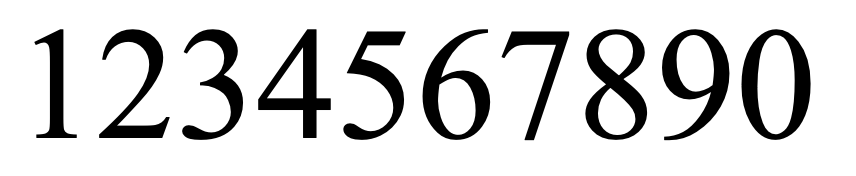

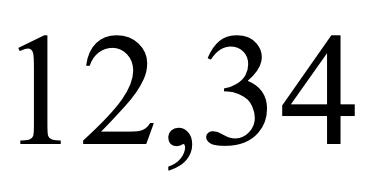

Sample Input 1:

https://stepik.org/media/attachments/course/128568/1234567890.png

Sample Output 1:

1234567890

Sample Input 2:

https://stepik.org/media/attachments/course/128568/1234.png

Sample Output 2:

12,34

## Заметки

https://financial-engineering.medium.com/logistic-regression-without-sklearn-107e9ea9a9b6

https://www.kaggle.com/code/sagira/logistic-regression-math-behind-without-sklearn/notebook

## Решение (не принимает степик)

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

url_input = input()
url1 = "https://stepik.org/media/attachments/course/128568/1234567890.png"
url2 = "https://stepik.org/media/attachments/course/128568/1234.png"

req = urllib.request.urlopen(url_input)
req1 = urllib.request.urlopen(url1)
req2 = urllib.request.urlopen(url2)

arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
arr1 = np.asarray(bytearray(req1.read()), dtype=np.uint8)
arr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)

src = cv.imdecode(arr, -1)
src1 = cv.imdecode(arr1, -1)
src2 = cv.imdecode(arr2, -1)

def img_handling(src):
  gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
  ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)
  img_erode = cv.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

  ret, gray_threshed = cv.threshold(gray, 254, 255, cv.THRESH_BINARY)

  output = src.copy()
  contours, hierarchy = cv.findContours(gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  
  numbers = []
  out_size = 28
  for idx, contour in enumerate(contours):
    (x, y, w, h) = cv.boundingRect(contour)
    if hierarchy[0][idx][3] == 0:
      cv.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
      letter_crop = gray[y:y + h, x:x + w]

      size_max = max(w, h)
      letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
      if w > h:
        y_pos = size_max//2 - h//2
        letter_square[y_pos:y_pos + h, 0:w] = letter_crop
      elif w < h:
        x_pos = size_max//2 - w//2
        letter_square[0:h, x_pos:x_pos + w] = letter_crop
      else:
        letter_square = letter_crop
      numbers.append((x, w, cv.resize(letter_square, (out_size, out_size), interpolation=cv.INTER_AREA)))

  numbers.sort(key=lambda x: x[0], reverse=False)
  return numbers

# images numbers
numbers = img_handling(src)

# images for train
X1 = np.array([img for _, _, img in img_handling(src1)])
X2 = np.array([img for _, _, img in img_handling(src2)])
X = np.concatenate((X1, X2), axis=0)
X = np.reshape(X, (15, 784))

# labels for train
encoder = OneHotEncoder()
y = np.array([['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['0'], ['1'], ['2'], [','], ['3'], ['4']])
y_e = encoder.fit_transform(y)

model = LogisticRegression()
model.fit(X, y)

s = ""

for number in numbers:
  s += model.predict(np.expand_dims(np.reshape(number[2] / 255, 784), axis=0))[0]
print(s)

https://stepik.org/media/attachments/course/128568/1234567890.png
1234567890


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Решение 

In [ ]:
import cv2 as cv
import urllib.request
import numpy as np

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
  
# здесь 11 * 784 + 11 параметров линейной регрессии которая была обучена вне степика. Cпасибо степику что тут не импортируется sklearn!
w = np.array([4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.947181105595326142e-05,9.473184184028263547e-05,9.187034320795925803e-05,4.830260451796596484e-05,7.903139235420364732e-05,1.498459476103336388e-04,1.517771052345451115e-04,2.450644229461608112e-04,3.304629962024034011e-04,3.204990686638763109e-04,2.897685559408346898e-04,2.814178814467574409e-04,2.660655059303323046e-04,2.192041721752976708e-04,2.022946194954282340e-04,8.328097656440302198e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,7.127245415625854414e-05,7.640765142893717575e-05,-2.814930067575458270e-05,-1.804979088821848760e-04,-1.781194065498434254e-04,-1.783187973689199244e-04,-1.807776778206825782e-04,-1.405100012428794919e-04,-2.053531945560572563e-05,1.283955310174439716e-04,4.317833831916597547e-04,3.840775103551855507e-04,2.874095733141151751e-04,2.310362711689029807e-04,1.618692482795663174e-04,7.577476088349554271e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.473254081675656955e-05,4.623382200016117809e-05,-1.454026644962468063e-04,-2.760742065605230398e-04,-2.544278559379112010e-04,-2.475690734025517785e-04,-2.756975098985866104e-04,-2.658945179602705119e-04,-2.613780508490650746e-04,-2.019447181552511583e-04,-1.068718506900235378e-04,-3.180595938780452907e-05,3.238432851661264805e-04,3.632151337183465740e-04,2.214180146664790501e-04,1.123740983286351564e-04,5.610678939082867206e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,6.033666298804103316e-05,-1.137720753702937406e-04,-2.627788274222354068e-04,-2.497795822630169849e-04,-3.902998162630840189e-04,-4.055020202589803874e-04,-4.059469385476155131e-04,-4.014669866830037010e-04,-3.627329927126108950e-04,-2.763981384267722341e-04,-2.904346518633875462e-04,-1.785658884790222560e-04,-1.122122713667256287e-04,2.705775091491095189e-04,1.974599150731295289e-04,9.449487832832288118e-05,4.425861379283685767e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,9.120044943401384358e-05,-2.830337703465230881e-04,-3.463759439527441526e-04,-4.740491821039715379e-04,-4.962446680408542574e-04,-5.110761648206533928e-04,-5.696927487340107789e-04,-5.406003018685832115e-04,-5.001255717633347302e-04,-4.573010478987969262e-04,-4.632666810348318740e-04,-3.471222814337285908e-04,-2.726237463681534202e-04,-1.283823048563198944e-04,1.672565613538775926e-04,7.706216839754307703e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,5.065662861575257500e-05,5.672325231577439930e-05,-3.459250462182177489e-04,-4.293392877624546428e-04,-4.741658045307436454e-04,-4.873423346797491214e-04,-5.673235750771187403e-04,-5.872268775030974660e-04,-5.195260559355497840e-04,-4.841942507611989889e-04,-5.065427190441064995e-04,-5.250231421141284124e-04,-4.129933152881653754e-04,-2.592312193444455595e-04,-2.277313801677433198e-04,-5.239102825743689772e-05,9.703818105961196645e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,7.099781441799294952e-05,-1.437526917253458178e-05,-4.163135162741494859e-04,-4.261133371060002776e-04,-4.301745221810967753e-04,-5.068953588526065295e-04,-6.116061025128157261e-04,-5.847685708250961170e-04,-4.876537546387942177e-04,-4.916460365595229755e-04,-5.478315659956304977e-04,-5.519154635756674809e-04,-4.711017674867261644e-04,-2.402433629035924953e-04,-2.342467244280652442e-04,-2.941728375211358736e-04,1.194023369293854803e-04,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,8.610691333458440021e-05,2.893959170082539955e-05,-4.355970974729374604e-04,-3.632451231590649735e-04,-4.241817129823452384e-04,-4.956642142490060585e-04,-5.397151161275518753e-04,-5.021375503451120867e-04,-4.707994040832511702e-04,-5.336357502456680769e-04,-5.541353083226073332e-04,-5.545777228180636493e-04,-4.896790430111122756e-04,-2.473341211056713767e-04,-2.445407934986534079e-04,-3.628020494299563983e-04,-8.666569788947498095e-06,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,1.052937215571102952e-04,9.151024149038062660e-05,-4.212163431479103962e-04,-3.071061311387397025e-04,-4.210662603855786553e-04,-4.639880916182389592e-04,-4.584394430286117274e-04,-4.117855574781328996e-04,-3.918793315152189019e-04,-4.640941692033580496e-04,-5.177252302088136216e-04,-5.489386602001479227e-04,-4.691282990487429341e-04,-2.711767780112346810e-04,-2.667919637745882946e-04,-3.971143484446742707e-04,-1.354623191693121666e-04,6.214224082303728195e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,1.181132020790231916e-04,1.904642858498570204e-04,-2.191412418628002764e-04,-2.991302009009230581e-04,-4.130029020758338313e-04,-4.430204334858754743e-04,-4.080783001006306303e-04,-4.197975898185249866e-04,-4.259273897213323437e-04,-4.286681472548006886e-04,-4.288052074384339279e-04,-4.377034756859700588e-04,-4.177823443788134493e-04,-3.045936602070504085e-04,-2.980914714449108363e-04,-4.202014183841733187e-04,-2.196341550151469503e-04,7.580732592369802481e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,1.149246868117609463e-04,2.111999565296093393e-04,1.410256834867080122e-04,-2.065302679702539133e-04,-3.865732612244595170e-04,-4.038347075628321062e-04,-4.049410908583354744e-04,-4.391096924376327584e-04,-4.173146860033077714e-04,-4.150672619586690329e-04,-3.398890813611727475e-04,-2.880139892371087816e-04,-3.035042226354735468e-04,-3.146792189721673845e-04,-3.368384204284451534e-04,-4.299311870436742103e-04,-2.551475781131536504e-04,7.384904121383969089e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,1.026875644265232346e-04,2.117387877499596620e-04,2.158569078665907711e-04,9.432480146328571199e-05,-2.078183410273841424e-04,-4.293494745311949223e-04,-4.965233385044402065e-04,-4.572342018151941611e-04,-2.916595897311465599e-04,-8.233318409894337813e-05,1.792467757853564579e-04,1.578108056944989193e-04,-2.525950915144815293e-04,-2.284787481019033724e-04,-3.238107119335135032e-04,-4.495068085874009902e-04,-2.585442747324659808e-04,7.233994877681226897e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,7.170791306131134204e-05,2.151019175171972955e-04,2.160332457604322378e-04,2.382333817815282333e-04,2.551802854976248152e-04,9.391513824594162905e-05,8.932023610714185020e-07,2.349044401645213265e-05,1.616427837213902838e-04,2.776583130666632681e-04,3.285048905166240078e-04,3.164659068439008480e-04,-1.462002010378364190e-04,-2.021344861182913452e-04,-2.490351693106321817e-04,-4.505951935174590879e-04,-2.242700567423035294e-04,8.557336687187852759e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,6.031361811461321453e-05,1.781287859637196709e-04,2.234332911007976962e-04,2.793447447835577984e-04,2.659360795302284685e-04,1.589012090182891968e-04,1.066288160433737808e-04,1.397824089359043695e-04,1.950964276060941052e-04,1.975565680191877739e-04,2.533239383514110181e-04,3.691163199998126259e-04,-1.293304244498101889e-04,-1.769538759747075498e-04,-2.402378218171277746e-04,-3.827263263264506243e-04,-1.695743532012049910e-04,7.909131166398887958e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,6.257472540246194928e-05,1.049672879162120981e-04,2.620354416695006494e-04,2.851003356038422877e-04,2.205636173082643292e-04,2.005346521189258499e-04,1.365361510062044299e-04,1.125035367572596687e-04,1.785904203032539887e-04,1.917242325657288779e-04,2.145767633633004006e-04,2.722463197681571794e-04,-7.305063203375210376e-05,-1.789440966559074800e-04,-2.341692553827368496e-04,-3.218376704402300817e-04,-4.091874589343986634e-06,5.612860002167772451e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,6.318496715572354677e-05,1.031375780948697431e-04,2.015931838730068465e-04,2.582967550772736912e-04,2.134652462852502269e-04,2.164444514650324216e-04,2.079987553211863844e-04,1.654361491222506870e-04,1.950110134711243966e-04,2.103975449684991996e-04,3.221803713133777588e-04,2.441042595620420590e-04,-1.297954588013869781e-04,-1.919308334119288113e-04,-2.280552448242020196e-04,-2.828065348696029023e-04,1.650101655817257334e-04,5.385473360790831750e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,7.473448517774206425e-05,1.401378047966954355e-04,1.337827166185443862e-04,1.431195028787458977e-04,2.119458533711590339e-04,2.117247977375884922e-04,1.872571192032095315e-04,2.071076301395273847e-04,2.608595659495898224e-04,2.861629358365863000e-04,3.687656814805971702e-04,-2.911472776093232070e-05,-3.594926639711352816e-04,-2.045643070652427957e-04,-2.060715945674243196e-04,-9.774279973062497144e-05,2.078093723034742796e-04,5.539098173329098473e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.499232650646553327e-05,1.152543265143906437e-04,1.439748653435519153e-04,1.286065007271291886e-04,1.300254494135176064e-04,1.145809650965665642e-04,1.226116239790496184e-04,1.415020040464138673e-04,1.719380049925926086e-04,2.138520978635281248e-04,2.365510271409194953e-04,1.941822576617593249e-04,-3.703660106743201087e-04,-3.795824683120985177e-04,-2.517210918340986999e-04,-1.562205594666621171e-04,2.111516143496067210e-04,2.029506103661159395e-04,7.922157604817754836e-05,5.157014458679046642e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,5.211829609348421537e-05,1.254696238643416303e-04,1.484461162432359246e-04,1.742800103302955840e-04,1.756462258829763912e-04,1.515148592481563772e-04,1.135841204058883868e-04,1.129631133364876922e-04,1.354293588788355919e-04,2.182746549664444334e-04,2.641720155951670485e-04,-7.266013856389288896e-05,-4.588902653300772376e-04,-3.786371204973735540e-04,-2.854471694103839752e-04,1.111691803645521501e-05,3.916432422038547412e-04,2.382087282819649878e-04,1.226838148790106544e-04,6.801468978760220299e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,5.211829609348421537e-05,1.201287274503680088e-04,1.607265091196538847e-04,1.756462258829763912e-04,1.756462258829763912e-04,1.453126562423312084e-04,1.129631133364876922e-04,1.131531679145823908e-04,1.588060719844512744e-04,2.379885844691346424e-04,5.358623954757432044e-05,-3.656277183387205798e-04,-4.244438013244108943e-04,-3.997721929834502992e-04,-2.446229489139906273e-04,3.541221358159481235e-04,3.658548113781867899e-04,2.278286702954121533e-04,1.189729892662288698e-04,6.801468978760220299e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.855531129997485738e-05,8.848907244565431965e-05,1.403816548274607523e-04,1.496090293150247020e-04,1.496090293150247020e-04,1.199845619436828249e-04,8.692591676853589453e-05,1.066915928903571154e-04,1.569058068344932760e-04,1.217224645538086269e-04,-3.519276857245428290e-04,-4.194782856959060444e-04,-4.056618930538668914e-04,-3.947467255988769538e-04,4.649012482326544970e-05,3.952162458528813934e-04,3.191730573887920303e-04,1.663119731729841878e-04,9.049600836760338573e-05,5.842203842046201994e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.312553669099519825e-05,9.067866956012482070e-05,1.057569087795268191e-04,1.057569087795268191e-04,8.073039865575349033e-05,6.113328432637269339e-05,9.039738617855257803e-05,-6.147970583326467801e-05,-3.913563930925862441e-04,-4.898130093115059605e-04,-3.871551728453942226e-04,-4.113638845766278058e-04,-9.863803588243893355e-05,3.297789292313494454e-04,3.302353491465726681e-04,2.447905608511196621e-04,8.757823497248365722e-05,4.395338401831516429e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,7.441069029400125480e-05,1.052677889889568980e-04,1.057569087795268191e-04,1.045050083291498188e-04,7.412393753370364712e-05,-1.287417968071316750e-04,-5.009032369584658952e-04,-4.953384776811898572e-04,-4.090976518979852223e-04,-3.559654252259809707e-04,-1.405175094981367108e-04,1.972817230607354420e-04,3.009160763037129448e-04,3.265326343493780764e-04,1.618134945830579569e-04,7.237939688848277827e-05,6.854110969769226141e-05,4.478428743588758150e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,6.282088662210292315e-05,1.276528889713132188e-04,1.360958767555764284e-04,2.008703259836947493e-05,-3.115909495959969856e-04,-5.979462557221227551e-04,-5.890177721273976656e-04,-4.296939844793661186e-04,-2.887233993980230706e-04,-2.545570892012865099e-05,2.141356297904721691e-04,2.257504197350027617e-04,3.207561338695550388e-04,2.742427246903182876e-04,1.044950555256159603e-04,8.634053804741245416e-05,7.861400233669736714e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.504190856351308479e-05,1.174981575337302069e-04,9.549489133095464589e-05,-7.388834882231202637e-05,-3.520498219200863025e-04,-5.511071031481725195e-04,-6.057351391190986603e-04,-4.435266991622336102e-04,-1.425364040905720037e-04,1.922616266932185541e-04,2.319831418519078289e-04,2.184706059761414043e-04,3.197764342553629743e-04,3.244375564957932513e-04,2.022493120135589726e-04,1.171977331114129758e-04,9.191031788875934851e-05,6.093892657391490993e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.867615971993946290e-05,-2.436523885434364021e-05,-3.770478900074002810e-04,-3.690525856495412626e-04,-3.480180488487608797e-04,-3.475444104678767883e-04,-2.478987954327911713e-04,1.294591696443075078e-04,3.723156400236130622e-04,3.289872749893205800e-04,2.978191556963528941e-04,3.479694195450031241e-04,3.287424361688972554e-04,2.442844895816104352e-04,1.813863652372092522e-04,9.557419881126708104e-05,8.830678581951380756e-05,4.649477863873750371e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,6.645050933865359936e-05,-1.030896301597409865e-04,-3.778347237925832290e-04,-2.813588759690927791e-04,-6.082923085084219572e-05,2.432653101126178456e-04,4.599596987745586344e-04,5.226567500424612227e-04,4.369980363567614254e-04,3.688343597904118862e-04,3.556583605369911198e-04,3.358890944329305734e-04,2.569048891108352680e-04,2.093262135222433379e-04,1.530878962587994016e-04,9.153771364711931933e-05,7.424274704052558841e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,7.443280161861989396e-05,-4.430609752343954028e-06,-1.012881427944116810e-04,1.392015101599413209e-04,3.300676181388484528e-04,3.643485372550120871e-04,3.697649467902239858e-04,3.782253510367397610e-04,3.449636175348731152e-04,2.541130175121786489e-04,1.965886288484855276e-04,2.036276106900808413e-04,1.982816780560127531e-04,1.873343061323681997e-04,1.473178412713713312e-04,7.918416607098074456e-05,5.485718007489270078e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,4.307379623303785580e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.929453050618215782e-05,2.776051773348989110e-05,3.020382115501099465e-05,1.437205844487882069e-04,6.126555910901551663e-06,-2.049315505018765263e-04,-3.149901518818280961e-04,-2.978071865928421736e-04,-2.058510259981891207e-04,4.346336427781456486e-05,2.497623030729233099e-04,2.883659220939558320e-04,3.240647455669553884e-04,3.199842104569480296e-04,3.025684046674187357e-04,2.659875351181098302e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,2.337238822823613173e-05,6.772373314277717500e-05,2.733128471593204516e-04,-1.825099565624539722e-04,-3.832469151518930238e-04,-4.296842324446685491e-04,-1.837732867394942671e-04,-4.915469868384695425e-05,-7.653866568100836773e-05,-3.983482249624560275e-05,1.773633154468320287e-04,3.825223671408479911e-04,1.896586287444030781e-04,9.195870888230363587e-05,4.344629626791580984e-05,2.421455449692123420e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.840803969704006221e-05,6.150979547149124560e-05,3.191822331835635984e-04,-2.762799345122005762e-04,-4.396598783197596554e-04,-5.438012982191876322e-04,1.170020015247202937e-04,3.893638428958683833e-04,4.817134591641662029e-04,4.862627156808801195e-04,-6.231960973734299719e-05,-2.983178385492266755e-04,-1.703717480586412075e-04,2.110245285543936437e-04,4.835369195091201040e-05,3.042258283418871565e-05,2.053561763898129294e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,2.252948450072097002e-05,3.195898717001852390e-04,-2.193454632367850259e-04,-3.936446158407931432e-04,-7.618788417423386040e-04,-1.603598931658579789e-06,3.501070939364013014e-04,3.937204307655877149e-04,4.254099425543410740e-04,3.270168830450545191e-04,1.059474458254729546e-04,-4.018922389516135893e-04,-3.333658879617310174e-04,-1.129315434693151983e-04,1.417542511320808273e-04,2.771619319303264046e-05,1.831939061612583198e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.387741211298557488e-04,5.242097238821209477e-05,-4.043716292453439763e-04,-6.453849982623130217e-04,-4.529768731039735680e-04,3.292199844754950012e-04,3.466229147244355088e-04,3.497061075030594352e-04,1.840270871113604614e-04,1.139484913815670149e-04,1.642856738486921943e-04,-2.578249493600340845e-04,-3.575780901157913456e-04,-3.484064579608209017e-04,6.323060792784643953e-05,2.802005689510771427e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.951615320846777744e-05,2.411516592651982011e-04,-3.584249138190822356e-04,-4.760135640965538215e-04,-6.893745269943396363e-04,1.075398838408885807e-04,3.414993657223281721e-04,3.416279282873711256e-04,2.048308667874417649e-04,8.553289894419739442e-05,7.364298469479689036e-05,1.080778702140302455e-04,-5.399376269067393883e-05,-3.655051853550386818e-04,-3.472311907584950288e-04,-3.265434344796057159e-04,6.660527788234941798e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,4.144012621254267842e-05,-4.976457722201559400e-05,-4.624756514067759655e-04,-4.526826592373784318e-04,-4.173121328383948845e-04,3.066313984845899150e-04,3.362381259000649385e-04,2.517484856858173453e-04,8.618653528345500317e-05,8.075075984448031583e-05,5.348685564543049456e-05,7.911860524825282623e-05,7.342219284117717940e-05,-3.331692152263419785e-04,-3.485711815611127634e-04,-4.273404687018343001e-04,-8.524919948094421057e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,9.761028155463973282e-05,-4.008667140810650512e-04,-4.803561910920400120e-04,-2.674428248615942898e-04,-2.159946341796503146e-04,3.807582269793684899e-04,3.253352539778442908e-04,1.078348763275928325e-04,8.563791994276193510e-05,6.019504659715274716e-05,5.042797858895157510e-05,7.601464242415305328e-05,1.449272848340966199e-04,-2.540517658526682135e-04,-3.605731711476325161e-04,-4.531503660264532161e-04,-3.782659752675003552e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-2.274658507748848391e-05,-5.947982062185588371e-04,-3.847906253598032552e-04,-1.695174298118944057e-04,-6.260724860332937496e-05,4.672150301945706850e-04,2.378973549015130605e-04,8.619440287678448631e-05,8.426830035182659420e-05,6.112583289422033044e-05,5.475388688725692856e-05,8.207409543766025733e-05,2.058189239571713795e-04,-1.634128447187682275e-04,-3.864522265037170063e-04,-5.200752962341199676e-04,-5.599315307632588131e-04,2.207049873039504951e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-2.183873451112166306e-04,-6.280569331982618214e-04,-2.585393133374540319e-04,-1.661995314384942437e-04,6.877408738372037939e-05,4.844291126726570995e-04,2.302141602249615148e-04,1.002358017460937956e-04,6.666477129832621676e-05,6.533482475203115046e-05,6.569022824166397499e-05,1.443998066827053325e-04,2.712294465557264257e-04,-1.014798808707748632e-04,-4.495015321397638854e-04,-5.730196476423218485e-04,-6.134811183242624196e-04,-9.488307070331166045e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-3.948064531101384269e-04,-5.465916503304801399e-04,-2.884021947923787275e-04,-1.753612821486548532e-04,2.357858355947801022e-04,4.229777224891462543e-04,2.183599681473114798e-04,1.972152753685821997e-04,1.739626838445672622e-04,1.962132136983442171e-04,2.608629378904480278e-04,3.862299946877374279e-04,3.504292419683079410e-04,-9.686724329294588143e-05,-5.382940984807468117e-04,-5.832603778479512197e-04,-6.274336626829417731e-04,-2.515643567635480310e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-5.519637839462571268e-04,-4.327545655395381437e-04,-3.335314875955177022e-04,-2.814199486156593690e-04,4.047609134332422328e-04,3.402790084758827282e-04,3.465704652583203520e-04,4.579122627649414678e-04,4.992782699559262377e-04,4.494629773200725003e-04,5.336078915051201219e-04,5.475153247464926553e-04,4.846803805149709605e-04,1.287834243158645525e-04,-4.729523476974940139e-04,-6.033443756001381384e-04,-6.281593611697140235e-04,-3.312651153065000460e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-6.946475213473210595e-04,-3.553211429327039436e-04,-3.338780412877367021e-04,-3.231054742627448707e-04,4.606887728362665585e-04,4.864158440131684615e-04,4.369241529805190333e-04,3.476745382333647433e-04,3.249656206391970210e-04,3.755571995233734591e-04,4.720342487590839975e-04,4.508035341066231327e-04,4.832479698237665045e-04,2.632448422862867675e-04,-2.525497425376323712e-04,-5.284247234974603956e-04,-6.288647748524758309e-04,-4.102879127344099272e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-7.120333069259672173e-04,-4.228441326344793195e-04,-3.302871856127393888e-04,-3.031562760683177379e-04,4.474113398414794368e-04,4.229018788622396522e-04,2.088936814558689547e-04,2.125489289642829244e-04,2.282930888842750396e-04,2.285853799855112444e-04,2.412985303004025277e-04,3.980389718999203792e-04,5.072476710502052616e-04,3.306718884309992252e-04,-2.368510455789929990e-04,-3.324500601201452752e-04,-5.846812565327240809e-04,-4.980207766084044892e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-6.709154599415487240e-04,-5.929310630933570282e-04,-3.166590227579484714e-04,-3.003633883210986353e-04,3.568450029967896141e-04,4.044601345092046509e-04,2.833198172602307109e-04,1.763437624456142146e-04,2.090485193748566073e-04,2.243614026404148131e-04,2.325746886581414575e-04,3.151801318581120767e-04,6.997878943774383208e-04,3.836590615246915988e-04,-2.275946833702868885e-04,-2.890158755969703596e-04,-4.432106860324473555e-04,-5.432190491322688415e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-5.912108834746493402e-04,-6.489361376045946249e-04,-4.950091048386838803e-04,-3.129882773007696328e-04,3.772967685615719155e-04,4.850983166623352386e-04,4.480490625327631531e-04,2.642813400043286191e-04,2.597281569615573354e-04,3.111955695937999736e-04,4.377991721372951413e-04,6.080640761303669414e-04,6.980179914838086780e-04,4.322984189429801474e-04,-2.012114566646470374e-04,-2.616888743959789004e-04,-4.125874948114055117e-04,-4.887033633516400626e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-5.197944015149291242e-04,-6.309818592296107150e-04,-6.321273577053731487e-04,-4.716987428237461944e-04,3.451352229462761813e-04,4.643943217075744518e-04,3.570604531263148174e-04,3.526924887904996021e-04,3.690155994312350530e-04,4.487031620673652280e-04,5.276388908654546265e-04,4.197928930442584384e-04,4.397229956145995823e-04,3.336888785472068883e-04,-1.047744275332615163e-04,-2.407786922909566616e-04,-4.972024499244624609e-04,-3.548510975546460508e-04,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.902873049624687464e-05,-3.754508605267932605e-04,-6.291199340647973294e-04,-5.789131513472940910e-04,-5.128071857198960573e-04,1.151284660059376731e-06,1.762998121002364103e-04,2.016114900233540114e-04,2.264127711752252949e-04,2.115332044323202701e-04,1.786072617912424988e-04,1.803927509198948993e-04,2.248559732066575292e-04,4.953577082979320053e-04,1.805100500514539123e-04,-8.605123551206344406e-05,-1.615150345818356736e-04,-5.850839576388907346e-04,-1.863507989749113537e-04,2.222060220735518757e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,2.248659151661421167e-05,-2.255084259246803143e-04,-6.095056230550244432e-04,-4.961784927763362345e-04,-4.901852310789045703e-04,-1.083215458641309097e-04,5.473561470683441520e-05,5.201140484436593092e-05,5.784057655231531170e-05,1.015081076599619098e-04,1.274298091746150650e-04,1.114402918824252293e-04,2.005028730717087866e-04,5.403004184297231218e-04,4.264448706254296719e-05,-8.353395823090007885e-05,-2.198748355215799852e-04,-5.621752914082238763e-04,-3.207590056471930266e-06,3.020028148512599191e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,2.248659151661421167e-05,-6.397666978331760642e-05,-5.472966523765346964e-04,-4.901852310789045703e-04,-4.901852310789045703e-04,-2.361769566042782361e-04,5.201140484436593092e-05,5.220639511380444157e-05,8.182437969327418495e-05,1.203424550398380114e-04,1.112864680148440067e-04,9.464558660388643649e-05,2.927794497225385704e-04,4.711507911387246140e-04,-1.261807346319271373e-04,-1.023138742301289434e-04,-3.773328069462629822e-04,-4.699439730349446202e-04,1.411434005842557217e-04,3.020028148512599191e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,2.075766100643049403e-05,6.107237854269106307e-05,-4.387636367936554043e-04,-5.028197232687065888e-04,-5.028197232687065888e-04,-4.008267785342529217e-04,3.937691265456227935e-05,5.965590067618578433e-05,9.395365172218418106e-05,9.247302389177630060e-05,8.139214581880007803e-05,1.539598865427093419e-04,3.930822052710681571e-04,3.680294365878350807e-04,-2.791005286944513446e-04,-2.720129190443988220e-04,-4.354693563913668449e-04,-2.354253937502337967e-04,1.215754689602778244e-04,2.554546857309295156e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.928905133856079085e-05,-1.949377804580156048e-04,-5.240988680094287337e-04,-5.240988680094287337e-04,-5.409801644157142663e-04,1.643640268899910955e-05,6.665034500407409051e-05,5.916109926862125505e-05,5.594451463315457113e-05,7.076637839748712449e-05,3.320518733025304252e-04,3.871815166823857376e-04,2.571712360393957060e-04,-5.058033098819773735e-04,-4.262584347708916490e-04,-4.629776516553489271e-04,5.872249874434519164e-05,3.834958613408909461e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,9.167845372718951284e-05,-4.970621610075059852e-04,-5.240988680094287337e-04,-5.816442344118621845e-04,-7.076022367663004054e-05,5.703851797047944697e-05,3.717219721406922874e-05,6.087863208630415080e-05,2.579332482312124528e-04,3.846257744843205187e-04,3.814594961899246597e-04,-1.775878204409353086e-05,-6.984174756049907253e-04,-4.315970334270469730e-04,-3.728839778912152294e-04,2.532056808914337292e-04,4.422646401862484066e-05,1.985268033878843111e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,9.416010983223521854e-05,-2.095593619898428086e-04,-5.044147964780235213e-04,-5.136457774262316459e-04,-2.782147618119456558e-04,3.367772334657549797e-05,4.079898087484677043e-05,2.101734262736411904e-04,3.895396393890900662e-04,3.736412639449347792e-04,3.184572492672265061e-04,-5.597065559339211693e-04,-6.187758101807410826e-04,-4.370982932712043269e-04,5.559297167303325237e-05,1.423947019790231742e-04,5.456094829887533757e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.833160079482978744e-05,4.954112548620963834e-05,1.900564800087791416e-04,-3.415390934987078781e-04,-4.436842078918614568e-04,-5.151251894706283807e-04,3.478752876099549618e-05,2.237569722212481187e-04,4.061625318546477847e-04,3.982616850334482210e-04,2.982263106957725634e-04,-8.201842175311707629e-05,-7.664904423068981268e-04,-4.578391913195341409e-04,-2.064505754522037142e-04,3.024718674821960055e-04,6.945481253818761513e-05,3.642685324107719123e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.893579860600014088e-05,1.017331919921371644e-04,1.810492445588571546e-04,1.388976858070173717e-04,-3.643486475624792406e-04,-3.744807149764158060e-04,-3.023858340084327421e-05,4.310025155201795415e-04,4.223355191850148866e-04,2.579139070552097734e-04,-2.940410489414294909e-06,-6.300806377516846718e-04,-5.031849448539193331e-04,-2.686829430703242664e-04,3.245018476220167805e-04,9.131324634384068296e-05,6.450545204024870478e-05,2.160759276373671762e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,4.208157105479938038e-05,1.505308147861762291e-04,2.189222646205980869e-04,3.140749396494369968e-04,3.321543958016065826e-04,-1.238191145240072326e-05,-8.231204111747028943e-05,-8.061183527989450423e-05,-1.092688278572092827e-04,-2.709730878483176324e-04,-5.613566310468685655e-04,-4.430669755542927736e-04,-1.381197905515806296e-04,2.955973763083505649e-04,1.179408144212619285e-04,6.782028662070653676e-05,5.007617210178575730e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,5.027116237122425439e-05,3.132616764610443062e-04,3.504424573252015967e-04,3.440774425697929123e-04,3.220735090521811904e-04,2.452486263957132876e-04,-1.054910685961431938e-04,-3.150717517441971034e-04,-3.942918620791821386e-04,-3.727614542045165451e-04,-2.215802816163082924e-04,6.925443833528919266e-05,1.839162181311495691e-04,9.473902975427448585e-05,8.102947609063130055e-05,5.514591910719158780e-05,3.018716461903907711e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,1.809776791384029706e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,5.148982517541062794e-06,1.661994833513746439e-04,1.737051682255229127e-04,2.366724619153106072e-04,3.380638677463618453e-04,4.628752038729350973e-04,4.316754624986649251e-04,1.173856344349228389e-04,-1.775892953688768959e-04,2.757368919952604821e-04,3.255411468154362654e-04,3.212504585335813055e-04,3.133283515643269456e-04,2.797649439024194420e-04,2.668643293579897320e-04,1.169252291114079016e-04,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,8.272304574640315330e-05,2.164459094663339538e-04,3.703062009753621000e-04,4.846220859207020135e-04,4.729042137091127545e-04,1.952379011149002420e-04,-8.955743882544528402e-05,-1.083030016136119232e-04,-7.961639136522410086e-05,5.314804164999117897e-04,5.873126139087939080e-04,4.322274206027374604e-04,3.367716704275522648e-04,2.888895723942863387e-04,2.380394106241903599e-04,9.874377619584224629e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.171494427134196545e-05,1.837215865478719298e-04,4.052690936731438254e-04,4.166794985162578825e-04,1.143139286291333217e-04,-1.168518186217329787e-04,-1.623773949826680808e-04,-1.380341776723196059e-04,-1.267750708549213005e-04,-1.017868964562281290e-04,5.413290638753712539e-04,6.364625842457752054e-04,5.782195878384086343e-04,4.016664643766639799e-04,2.786857810950310816e-04,2.021243946272347576e-04,2.875848002197742295e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,4.277199334672207863e-05,3.538807792516372231e-04,4.200612289010849376e-04,-1.180751208616101863e-04,-4.483617959637643536e-05,-4.672288225209390199e-05,-3.537546689609944697e-04,-3.697466717986585931e-04,-3.150904704560793875e-04,-2.340183860953657291e-04,3.529642620690019066e-04,4.914445077150407515e-04,5.049679980135462001e-04,4.850073231513913610e-04,2.759851981905565442e-04,1.653562870119303291e-04,-1.340133695023024930e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,1.660150961029596174e-04,4.658200289088583078e-04,3.228568113141711731e-04,1.328948481983465118e-04,1.700624580239821983e-04,1.726166017798551431e-04,-2.772628743000318027e-04,-5.746916266660672410e-04,-5.595941381171981891e-04,-5.145909880604901876e-04,1.612298602919798362e-04,3.013002302847390371e-04,3.526338230591016506e-04,5.089738944312386217e-04,3.303176109400988601e-04,9.942018183501883722e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,9.364964214761828325e-06,3.056853722177387662e-04,3.146384690996559350e-04,1.552878659446532965e-04,1.649613819282907869e-04,1.906924387559082699e-04,1.356321427217412772e-04,-1.580133969772728921e-04,-5.717735735121893745e-04,-5.566241584157787881e-04,-5.733251786179403885e-04,7.776358981826614835e-05,2.810329017855246335e-04,4.069238833911036014e-04,5.403443738245990993e-04,4.030887601271528043e-04,5.173474234914527943e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,5.281834429764880999e-05,2.331815503166433589e-04,1.759265877501514955e-04,1.525367927773444950e-04,2.236508311407213662e-04,1.774508983228370736e-04,1.052545876913036813e-04,-1.206972971082039247e-04,-5.590227044002503160e-04,-5.623043687497716187e-04,-6.044026995520574265e-04,3.632001724305648814e-05,2.457410250580925408e-04,4.779957370654663255e-04,5.390960955092835094e-04,3.986358626147405910e-04,4.523689591368826042e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-4.913043458805588581e-06,1.229378740440246760e-04,1.455170324434222531e-04,2.106727919854204604e-04,2.352035830194932969e-04,1.862402355016820176e-04,1.529917934956260303e-04,-5.842742967747656342e-05,-5.475874603926482540e-04,-5.937972856012987619e-04,-6.091259269103640756e-04,3.221205350031068382e-05,2.317485979209139705e-04,5.327229804262751181e-04,5.232119690373331121e-04,3.279072647284744422e-04,7.843645451091727124e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-3.157076402097646774e-06,5.005567208789837001e-05,1.595064928157197517e-04,2.568883153123409455e-04,2.338348375103711514e-04,2.118703816362553830e-04,2.011563737911174939e-04,7.034945708999495888e-06,-4.953044898643705436e-04,-5.473582316818051017e-04,-5.841488261075599006e-04,4.049164512551290860e-05,2.871398618604047159e-04,5.393481921696102353e-04,4.880039331969088364e-04,2.442950246327795991e-04,9.762207361749646582e-05,-1.345634102656402630e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,2.894900195158674240e-06,3.147984022073460321e-05,1.894783480036932495e-04,2.625598738015024998e-04,2.334657624230736511e-04,2.272191644137383959e-04,2.319795461182674390e-04,1.666065652287144109e-06,-5.210026105451503629e-04,-5.230561876574555888e-04,-5.228459875476531085e-04,1.300090064835826001e-04,3.824336533770699527e-04,5.045159414068094714e-04,4.283314723607068667e-04,1.941613089186224397e-04,9.467743895230545438e-05,-6.669122987368316899e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,5.083536340770487231e-06,4.189349741687523363e-05,1.608565676534951926e-04,2.422310679591387018e-04,2.387017955375692958e-04,2.499018703429874773e-04,2.321356210849286712e-04,-8.430583642418593485e-06,-5.075139961253436870e-04,-5.091486104203389075e-04,-4.888577365593381376e-04,2.061734416801949471e-04,5.034222445466903038e-04,4.775745029020250689e-04,3.425667682123160118e-04,1.766303275995945003e-04,8.794474430914511688e-05,9.858673530870341238e-07,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,4.950596319492734703e-06,5.186874646720185172e-05,6.514160098242260531e-05,9.333164020789997675e-05,1.633080339610108993e-04,1.753223860567152954e-04,1.756776543488943831e-04,-8.047979450419045472e-06,-4.746762608426610490e-04,-4.962969641423704533e-04,-4.659826054828418549e-04,2.201373590854315790e-04,5.084743080655448324e-04,5.460058489523337936e-04,3.000082974505676944e-04,1.455281949856436453e-04,8.707128021454501546e-05,3.798626231214760447e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,1.718899529828124901e-06,6.067963496688008000e-05,6.311957332063706215e-05,7.975354793032125302e-05,1.123257857440117995e-04,8.843364161241243598e-05,5.392469101914535454e-05,-1.489919117961615333e-04,-5.909660868423415384e-04,-5.190190833893857953e-04,-4.854026829596636613e-04,2.608455391652148079e-04,5.677089642220645984e-04,5.487734026157884857e-04,3.338935717833517685e-04,1.363569766335089755e-04,8.272426591109113630e-05,6.716294241849381706e-07,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,6.086125955546175608e-06,5.603517125254767330e-05,6.866423152386482310e-05,1.105572046149214067e-04,9.441509862047502339e-05,4.537832848291250637e-05,6.212564573511313211e-05,-1.222920152784455017e-04,-5.964566970373675866e-04,-5.947690550912307144e-04,-5.492062650064408365e-04,3.407781874833275509e-04,5.876573906048132524e-04,5.262348929323161853e-04,3.340321182281213064e-04,1.971886434805072649e-04,8.118753256712810010e-05,-1.164375876608965414e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,1.180151164125980172e-05,4.319566355135421231e-05,9.916230107136333929e-05,1.148697165507663005e-04,5.223426309942219413e-05,2.566604519137784246e-05,3.718658261966930554e-05,-1.634884476337541916e-04,-6.219260722423918322e-04,-6.016601177781775740e-04,-5.286363364110274786e-04,3.393047018452876326e-04,6.158778464328990574e-04,4.397916142071341323e-04,3.426826355589841539e-04,2.529278619936932340e-04,8.517907879411552494e-05,-5.511871957315437962e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,1.465048135638994208e-05,5.882930344612037203e-05,9.984989755358008288e-05,9.550202193597714505e-05,4.636850850202333291e-05,3.632266291357901986e-05,2.882874191700903204e-05,-1.954641245890282057e-04,-6.649917503100821617e-04,-6.499539969892372503e-04,-4.418958573950804267e-04,3.588657994676291833e-04,5.375473726802115423e-04,3.804766054695966405e-04,3.481901299882222381e-04,2.909054838497212420e-04,9.280412964558173332e-05,-3.750537388536201099e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,2.421767653078552016e-05,8.655259446226059303e-05,8.185947056364476187e-05,6.558792719029904656e-05,5.322690843886624762e-05,3.213488353314278761e-05,1.042455358719691524e-05,-1.906111801335810742e-04,-6.676748688129903464e-04,-6.348601880867736982e-04,-3.677787594466981570e-04,3.189761728513478760e-04,3.593966389335775946e-04,3.617337537784457357e-04,3.676963655234132249e-04,2.835342619920872042e-04,1.040859860577830233e-04,2.149542753330186040e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.617981466883654321e-05,5.372950629271773152e-05,8.942760241949026471e-05,7.995261592811421243e-05,8.333022137179977380e-05,4.805976455984294863e-05,1.707594201312273094e-05,1.425065061772834892e-05,-1.832685635883721730e-04,-6.606261648202710248e-04,-5.434298065906332641e-04,-3.625421087607119566e-04,2.713060693385098356e-04,2.467591328315318932e-04,3.230064340932612050e-04,3.709153064743281021e-04,2.837202234239693762e-04,1.333706273380507075e-04,2.218339607868923287e-05,-1.125122959930045133e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.084051417683898569e-05,5.872120066130952454e-05,9.339497235885144361e-05,1.163175542307125438e-04,1.175298061566282883e-04,7.917645071516758292e-05,3.529992131905883377e-05,3.474889771636993662e-05,-1.636992261296023538e-04,-5.940160380799037586e-04,-4.273942552339002527e-04,-3.493108965844535186e-04,2.180665264661277682e-04,1.867834625476377417e-04,2.951781648932975282e-04,3.600169308338821450e-04,2.944901388117810337e-04,1.720420131124444972e-04,5.490218354896455130e-05,1.070233074539857987e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.084051417683898569e-05,5.014652391225369270e-05,1.042576960882520904e-04,1.175298061566282883e-04,1.175298061566282883e-04,7.604504212436732967e-05,3.474889771636993662e-05,3.505086016893244484e-05,-1.265578444643990306e-04,-5.594272307103449618e-04,-3.732254704886196132e-04,-3.487991672800263166e-04,1.489383475102536625e-04,1.619416271259447888e-04,2.653900418633682460e-04,3.149583156410446622e-04,2.770115429745441458e-04,1.643338830373329118e-04,4.955618677555689194e-05,1.070233074539857987e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.351016442283774074e-05,2.024806795794136771e-05,8.903601305854731869e-05,9.802082358971473742e-05,9.802082358971473742e-05,6.134788204783542676e-05,1.523991514945612828e-05,4.664401021596996583e-05,-1.077175955558583309e-04,-5.408230698531067606e-04,-3.730219731291315485e-04,-3.564764295629812619e-04,8.062815010270728310e-05,1.449129878087707319e-04,2.187665307944843061e-04,2.817990165083663462e-04,2.529770254413299109e-04,1.147313492817900513e-04,2.459301217219122314e-05,-6.117286818533558022e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.748176651668696674e-05,4.606850130565689805e-05,6.516358979280741982e-05,6.516358979280741982e-05,3.865244350138106869e-05,1.104312835373870509e-05,5.757133204064462836e-05,-1.464804573341355618e-04,-4.884208289720495767e-04,-3.933955375644389231e-04,-4.113360193668963720e-04,3.524119003130014757e-05,1.086308781085557122e-04,1.844640136230176321e-04,2.600847182624241457e-04,1.970465739652485764e-04,4.638937495133697972e-05,-1.531293242445861270e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,2.083027237555486218e-05,6.461147065748346801e-05,6.516358979280741982e-05,7.517015331226507802e-05,6.836500732188927022e-05,6.221408372941907982e-05,-1.352807824820351592e-04,-4.096227801777491758e-04,-3.785781369627910634e-04,-4.801688580319354882e-04,-1.730127699010790101e-06,7.463548366569032260e-05,2.120936320037702309e-04,2.586633772160791870e-04,1.259628836244466952e-04,2.503276022072357829e-05,2.284564999594170629e-05,-1.489965657438742446e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.980940685997760844e-08,7.396650033046301700e-05,1.055330982928115468e-04,1.476468232807711138e-04,1.184045187450815582e-04,6.759634540196770983e-05,-7.431253542222355526e-05,-3.823591288404518465e-04,-3.769211266021880481e-04,-5.963138470661753484e-04,-5.857440858756990431e-05,1.237703930150413443e-04,2.429070911682971925e-04,2.201759718894023160e-04,6.692011826413370504e-05,4.782913276397314045e-05,3.884965998176119766e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.626720509054285104e-05,6.650649549327152465e-05,2.013658353269386222e-04,3.137821486531640227e-04,2.875818376833325541e-04,1.680467582258529907e-04,1.056011486346524858e-04,1.340119406500496073e-05,-3.605245760645453827e-04,-4.438571437989418051e-04,-6.367812272200590665e-04,-6.643064986584163700e-06,2.432966337048747584e-04,2.754442226999427026e-04,1.729539570037581906e-04,9.051247511210131684e-05,5.971372091763387381e-05,1.076715189343638194e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.360254391339070427e-05,1.820633978011629089e-04,3.024254056599161322e-04,3.483580120813196154e-04,3.824353980076432616e-04,3.603329606637352390e-04,2.696816564453021099e-04,2.707144878648641318e-05,-3.456391528465261416e-04,-4.524416462342893209e-04,-5.102053206293771185e-04,4.988605777805397117e-05,2.962258644326666731e-04,2.226533718571275123e-04,1.480137292344900480e-04,6.350256115673981222e-05,5.424974506245543204e-05,-1.218199450132389339e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,1.952406301775266921e-05,1.896703257401419370e-04,3.054028773835411738e-04,3.094326361159230668e-04,2.556601469617343419e-04,2.027524279795875871e-04,1.032590681122437455e-04,-1.239447007312494381e-04,-2.140980447574174401e-04,-3.993358698553269937e-04,-4.262829955806962212e-04,-3.408910494437291804e-04,-4.898047692958192284e-05,1.593353795281154017e-05,4.629037990748717513e-05,5.938310675602030106e-05,3.190452357282066949e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,3.220648602538327934e-05,8.811450290567941150e-05,1.687675608284716676e-04,1.955847318173783197e-04,-1.810507077711658768e-04,-2.892541519906544024e-04,-1.705795547673054932e-04,-9.298575075551133876e-05,-1.371951252757884173e-04,-3.254777930796961681e-04,-3.824485484162094937e-04,-3.942213166736329463e-04,-4.114377276709535068e-04,-4.253814729756338767e-04,-2.024105171009806144e-04,3.975554733944919664e-05,1.104353411432098450e-06,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,-1.761731864745124014e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,4.451480229928690300e-05,2.782794530834559361e-04,2.798835654625473680e-04,7.786387084855195815e-05,-7.372981463104671333e-05,-1.348301762164374465e-04,-1.568453074238083272e-04,-9.728417896413033862e-05,-6.662168438196336729e-06,6.711663953124261898e-05,3.022870420251312466e-04,3.688415672688033975e-04,3.602461151839459245e-04,3.297363385293609179e-04,3.251204751404342987e-04,2.043537717585964825e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.571134822581540769e-04,2.315486223936714450e-04,-1.703207954843262060e-04,-1.903444682221856657e-04,-1.532934000578262330e-04,-1.484084599407159855e-04,-1.554183038472372962e-04,-1.300897666768837974e-04,-7.552920437406319303e-05,-1.004843764900542293e-04,-1.118756795520582154e-04,1.219897896357991852e-04,3.914691383088728474e-04,3.544832496738481659e-04,3.368889718399855249e-04,1.803675574670502671e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,2.003682839518540444e-05,1.978571296286965706e-04,-2.377612954735383122e-04,-1.664168345837832813e-04,-1.435705585253023247e-04,-1.938267112902339849e-04,-2.618720852020295299e-04,-2.348050254045733415e-04,-2.255030217682454626e-04,-1.863165528301975098e-04,-1.196417964802666843e-04,-1.000927566545840576e-04,-1.582683401162331203e-04,-2.563278698505882405e-05,3.468661329236574146e-04,3.231856173939619400e-04,7.878396576502914059e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,9.475938180625134743e-05,-1.621594085647009415e-04,-1.757461090464766901e-04,-2.044767910900347732e-04,-2.168919956007703178e-04,-7.943552514454663702e-05,4.366133136490562872e-05,-1.440240463416820638e-05,-1.996969875181418786e-04,-3.491002800742186202e-04,-3.877368951431298290e-04,-2.826991839071217615e-04,-2.580879625525952983e-04,-2.950677412608533026e-04,4.619196754774861129e-05,2.770555543882517323e-04,1.758903100477528914e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,3.420073924518720460e-05,-2.492769596777617814e-04,-3.376508289477966841e-04,-6.015428953917073605e-06,1.289879590074669209e-04,1.055316609503003262e-04,1.260969654019762089e-04,1.575416165488562959e-04,1.734478473964181126e-04,3.203569550488555893e-06,-5.318441369857202514e-04,-5.116643006777543950e-04,-4.172507303221984734e-04,-1.812608351158161363e-04,-3.719833362478041695e-04,1.551854990616494134e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,5.063429577531231322e-05,-1.116600310366548795e-04,-3.868152265990191596e-04,1.058791497171316168e-04,1.948609203471225293e-04,1.247509049469928803e-04,9.415228019871622835e-05,1.117758141443681935e-04,1.657166907387125354e-04,1.840942523878339831e-04,1.701299190989031423e-04,2.515727983217446782e-05,-5.463725729838893319e-04,-3.383708963795645426e-04,-1.399916644873349834e-04,-4.327934355437975896e-04,-1.061005586358535087e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.071042558223362116e-04,-5.439687044711937619e-04,-1.295126140348584439e-04,2.465385297940731173e-04,2.112431115375389265e-04,1.103077812836497542e-04,8.434839082769049555e-05,1.085131352950281065e-04,1.818779846154096791e-04,1.790864183466282940e-04,1.416603459549716155e-04,2.158486712907900561e-04,-2.718867572892833570e-04,-2.366638266462335008e-04,-1.471773427582850154e-04,-4.800879421620082139e-04,-2.677818351706719624e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,-3.360115333359240411e-05,-5.475453053557980234e-04,1.992557302151953466e-04,2.705208941429116266e-04,2.114063825810169985e-04,1.174743838834753758e-04,9.997728748431189091e-05,1.352403021184289201e-04,1.866270383291059758e-04,1.508975883985216805e-04,1.374613231988343581e-04,1.995790394060865155e-04,7.718712271335110924e-05,-1.679109608030100525e-04,-2.100865860458042862e-04,-5.988027025907756559e-04,-2.666485289467812039e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,5.390563195756995320e-05,1.685470807254530259e-04,2.504697460810702053e-04,2.881157744392852447e-04,2.055643380408510475e-04,1.445444398481755452e-04,1.290168085311862566e-04,1.594715091331489756e-04,1.910575171096803632e-04,1.573958982532527374e-04,1.455222989039001462e-04,2.311425931539692099e-04,3.267153743616728920e-04,-1.684244998356493773e-04,-3.450167916969417467e-04,-7.197141890774268799e-04,-1.549930837784440328e-04,2.357362131759191515e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,7.288137801405372978e-05,1.526546484937803825e-04,2.531548196012634944e-04,2.900157810210737363e-04,2.035941498596883278e-04,1.610332274224540120e-04,1.714726051749330482e-04,1.568480140976730207e-04,1.670646718179589552e-04,1.652390097500732477e-04,1.672993618972445516e-04,3.437015871525841699e-04,4.465368331284250624e-04,-3.023227319209919098e-04,-4.738867875307249005e-04,-7.746954670002753054e-04,3.034018784213584228e-05,4.261517541811276575e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,8.046292788400127220e-05,1.574919722362043591e-04,2.155371720535421151e-04,2.784053210297320557e-04,2.119537737300964807e-04,1.840938500853969055e-04,1.756426399472932874e-04,1.586227358869930521e-04,1.803308931819884160e-04,1.732688952077596960e-04,2.536016635733759892e-04,4.619338069933851855e-04,3.578694052721657871e-04,-4.662784902522868293e-04,-5.984539773296210794e-04,-6.127618266079236809e-04,1.702586936612648027e-04,6.137263029419926029e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,8.114494501308396144e-05,1.640520432588581459e-04,1.713194680906312151e-04,1.962488579910175298e-04,2.050526199759485915e-04,1.599593794879436372e-04,1.466020791582165383e-04,1.631951904944307344e-04,2.157772030857969901e-04,2.459636801654868426e-04,4.318625650315201952e-04,4.897611168604769317e-04,-2.986125578561285533e-05,-4.641271197971671915e-04,-6.911691245364444663e-04,-2.090944292039480993e-04,1.861385057482318670e-04,6.857330891093868096e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,6.991731510104168268e-05,1.691575630232758083e-04,1.705713992657299110e-04,1.853592620156027486e-04,1.822513170302254501e-04,1.116050411100993466e-04,7.701117870180508812e-05,1.220716398645605783e-04,2.922171563299761428e-04,4.215169060052239495e-04,4.429319908503704262e-04,5.729658754868632766e-04,-1.352650078788142731e-04,-4.007050327151856560e-04,-5.691195391854108210e-04,1.681813716555714659e-04,1.834941977924729674e-04,6.616338517974886489e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,6.857517418556352865e-05,1.508312155154569953e-04,1.755006868490204322e-04,2.127441930338895267e-04,1.621055582422861448e-04,1.436546062174938508e-04,2.518497613691182040e-04,3.355512942740042121e-04,4.019735252554257647e-04,4.025181857760366279e-04,4.269145722628898249e-04,3.796524271785575722e-04,-2.557803753232574390e-04,-3.169586606079354300e-04,9.633964718480311773e-05,2.385600704651569227e-04,1.824107971074262718e-04,6.294991920008064467e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,7.230806033355249819e-05,1.130016111836822752e-04,2.016224754496566570e-04,2.165780833764492305e-04,1.269022904802425604e-04,1.253321249275403707e-04,1.497509911911041095e-04,1.754767856796993176e-04,3.011018075702632819e-04,3.813653248681339591e-04,4.829851183939464594e-04,-8.954330384132240213e-05,-1.953475739446956284e-04,-6.744626909251425330e-05,5.500322640586351956e-04,3.368759624427562316e-04,1.808217120798989068e-04,5.058262710617787000e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,7.143247291408736960e-05,1.161922773389731183e-04,1.732828153319950870e-04,1.992537887339981557e-04,1.314939207409263696e-04,1.246861171218521932e-04,1.140734297590875464e-04,8.828604648041869069e-05,1.415292994349115648e-04,1.785882969864295133e-04,9.335741505230642852e-05,-2.401302472256631657e-04,-9.459269815972114821e-05,4.966062157145101873e-04,5.686157010535734455e-04,4.782640587050450572e-04,1.703874704898756360e-04,4.855877437505509855e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,7.697279483106413286e-05,1.408387152554298172e-04,1.368988358129369712e-04,1.473494867350080265e-04,1.414382005533613767e-04,1.187554977132483116e-04,8.800991814759143378e-05,1.070014621034323567e-04,1.602597590422745076e-04,5.486348213079629836e-05,-4.559677052384242930e-04,-3.956172618682126784e-04,3.949898030111680808e-04,5.755607219892995346e-04,5.962399019831236434e-04,5.149200789214844563e-04,1.967466028493508189e-04,4.818795074082717566e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.274750097626985757e-05,9.725342111392033123e-05,1.433946421504698457e-04,1.418845622885661303e-04,1.527301605021298258e-04,9.669518149509852680e-05,6.295365618859169563e-05,6.617377934298704128e-05,9.231168994463921250e-05,1.027114051092068814e-04,-5.719738591084455506e-04,-5.443583659107440820e-04,1.177209275841388031e-04,4.220367941957894648e-04,5.645842865929142501e-04,6.022524343358707155e-04,5.337743950268069356e-04,2.404659878113324964e-04,5.892782205094172223e-05,1.712908993919552746e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.749422235277259984e-05,9.454544548979953349e-05,1.490131236954629482e-04,1.814754615109785555e-04,1.831922197608379084e-04,1.247648945302838575e-04,5.880426491886198181e-05,5.802392025983522375e-05,7.198650309683316656e-05,-4.909904620252913575e-04,-6.642198300235291472e-04,2.798149724220390247e-05,4.075337611165654600e-04,2.678416453750659420e-04,5.545982615355011603e-04,5.981016912747187534e-04,5.358682980256874616e-04,2.854499415250261402e-04,8.043922377612255762e-05,2.808306234650972843e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.749422235277259984e-05,7.862889666737196454e-05,1.641075355024888480e-04,1.831922197608379084e-04,1.831922197608379084e-04,1.221401801769730520e-04,5.802392025983522375e-05,5.410481931416511245e-05,-4.100629132205342326e-04,-8.547377609974724476e-04,-7.598346738648577704e-05,4.877157895671830126e-04,3.248135692520327409e-04,2.074870434721567155e-04,5.053637834557672681e-04,5.686495195845610957e-04,4.976736087231037331e-04,2.753033362238570410e-04,6.849891806369919338e-05,2.808306234650972843e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.512086166452124141e-05,4.465464151582210233e-05,1.498199883839248993e-04,1.658484301159228198e-04,1.658484301159228198e-04,1.139497459785338034e-04,4.068013061492094825e-05,-3.669063677347227321e-04,-9.251325229654932354e-04,-3.772526692277196943e-04,4.634017744122609925e-04,4.934449797359129501e-04,2.408434948166934223e-04,1.852953882140867526e-04,4.472059805105063905e-04,5.182109916611051881e-04,4.689073523732303819e-04,2.071092834828040699e-04,4.609983621099526390e-05,2.169324510890973523e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.154808398666400666e-05,9.940948777281638320e-05,1.366378370297525026e-04,1.366378370297525026e-04,9.923174114150805445e-05,-3.473146659785849850e-04,-9.643865979429919058e-04,-6.050959364667227907e-04,3.041294194017077953e-04,4.515794825503428042e-04,4.542650544479840736e-04,1.824822027066793555e-04,1.679273645348885015e-04,4.022290034949951875e-04,4.764782793967515715e-04,4.183026395930191255e-04,9.551326455335587117e-05,1.280482731328992505e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,5.925467703455546543e-05,1.348441522224677429e-04,1.366378370297525026e-04,-2.270788093593384708e-04,-9.399715983970294677e-04,-6.702645830658914179e-04,5.564489797983024241e-05,4.273219056581490445e-04,4.935050326590479774e-04,3.633696155981278627e-04,1.578594512792803775e-04,1.559217365199838093e-04,4.112376276402470191e-04,4.749949161848340123e-04,3.017635842107946266e-04,-6.026676818516409534e-06,-5.136899891909822800e-04,-2.380237098227699601e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,3.085647712557119330e-05,1.172942133174374502e-04,-2.076159105696124651e-04,-8.332600750985326996e-04,-6.381681285312364822e-04,1.407195242727021751e-05,1.762892975554224866e-04,4.828067888382064649e-04,5.171809323243299400e-04,2.322849220352368174e-04,1.171381880634291982e-04,2.222379246743820330e-04,4.541883881065938555e-04,4.454065489498325011e-04,6.777934172111245556e-05,-6.487021385632255879e-04,-7.214023393114755121e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.190526594523988375e-05,9.611921765136675693e-05,-8.862419089712206808e-05,-6.134174912900681965e-04,-6.669814616795694418e-04,-3.073308164693701675e-04,-3.409502789749500407e-04,-9.564869427463945032e-05,9.684649139345380105e-05,1.296590658182209023e-05,-2.683814990907064705e-04,-2.683680621381065120e-04,-1.931294216314693559e-05,-7.396121143516597289e-06,-3.541542777971574268e-04,-8.449367614978592518e-04,-9.874329968215919597e-04,-3.569259513641969642e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,8.748689728427775134e-06,-1.369821879940473150e-04,-6.045890309064914448e-04,-5.664983502866054090e-04,-5.087093763409411421e-04,-5.669081101417443314e-04,-7.170072399927755183e-04,-5.522551904208990777e-04,-5.159658999620354066e-04,-6.938512227593924154e-04,-7.614686126998609613e-04,-5.883612313427852335e-04,-5.544788528693324076e-04,-7.146051592429654865e-04,-8.988583530340351572e-04,-9.827478569153656664e-04,-9.212764875406238190e-04,-5.907427949330384384e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,-4.705798787886159278e-04,-7.545435216630185437e-04,-6.163693446965552280e-04,-5.974527154407138860e-04,-5.234620884586572119e-04,-4.559532029612096233e-04,-3.642238041189589182e-04,-1.699366916417304949e-04,-2.561400396836293453e-04,-5.109650990800832741e-04,-5.264598680031173624e-04,-5.548201589186686203e-04,-7.505486034649196071e-04,-8.796305280496795635e-04,-9.425547817208774441e-04,-9.879012036170115030e-04,-6.312630175610719173e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,-6.351821185067405310e-04,-6.495758636876376854e-04,-5.021272490307632404e-04,-4.322319087154535139e-04,-3.695265751732446026e-04,-3.358441771483785046e-04,-1.716370020303731401e-04,-5.959800337366702867e-05,-1.262145386467080287e-04,-4.096913269942532398e-04,-5.247485747526872951e-04,-5.982491250284438945e-04,-6.285267277102448390e-04,-6.430873392817292077e-04,-6.781338721743322478e-04,-7.331596421484834133e-04,-2.315147211027684189e-04,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,1.146953752874982132e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.597074768458769340e-05,4.162758652213846723e-06,1.176257262758637863e-05,-4.411399189952509029e-05,-2.960790280035230392e-04,-1.798104489995659629e-04,-2.289499470656949031e-04,-1.880705692988486025e-04,-8.582073247457758887e-05,7.533257461893316798e-05,4.626889589983462824e-04,4.818106819239472653e-04,4.499371238863761184e-04,3.540300135764559014e-04,3.049336747397350753e-04,-3.046456726760383077e-06,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-2.182267133387702084e-05,7.811253779685701517e-05,-1.636317135309011859e-04,-5.893956772873645833e-04,-4.049204254861273077e-04,-3.235258461734113046e-04,-3.665740511304568469e-04,-3.429405356562512000e-04,-2.491113995499596263e-04,-1.251439401934777368e-04,6.531803432883874261e-06,5.642353045228059054e-04,5.145209031414733642e-04,3.877314447324228092e-04,1.857319172408008784e-04,-1.683556860927372056e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.122032949995953101e-05,7.167971956244795890e-05,-1.328438892870469979e-04,-5.862038094114784730e-04,-5.996857283821357227e-04,-4.330452673388563594e-04,-4.037515220937519566e-04,-4.911438437650617094e-04,-4.994692931620172294e-04,-4.382638337440967536e-04,-2.842143686677101023e-04,-1.075290842693839852e-04,-1.507932474086342573e-05,6.739294560921699770e-04,3.684225291617690130e-04,4.093321180924987013e-05,-3.862133314306699471e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-3.114698827762769190e-05,5.975671042242434728e-05,-5.804800526293109287e-04,-3.197444681656878103e-04,1.712021041966655830e-04,5.042138520561603200e-04,4.349181635708103378e-04,3.464127360177096594e-04,-5.971807692669370683e-05,-4.903652989590751455e-04,-5.548279982931413274e-04,-4.058891798055258722e-04,-2.318735692681296861e-04,1.607128200239364246e-04,4.047811505188223945e-04,3.900279561445250946e-06,-5.174528768149671410e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,8.619053441396087867e-05,-4.429055650833990210e-04,-2.096653985142379320e-04,2.701295199041390291e-04,3.644951705393563446e-04,3.117827324753221808e-04,4.538261756656189477e-05,5.969363678039664743e-05,1.454299826086340056e-04,-1.434416830065124427e-04,-8.727840618350721485e-04,-7.945247161527991837e-04,-5.325833146452201364e-04,-4.220147960533853350e-04,4.881131734960647713e-04,-4.915639245089942991e-06,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.465835223074463744e-05,-7.795974899947515709e-05,-3.576264207863732417e-04,3.385478549125419865e-04,3.800434882124426885e-04,3.808650878747020150e-04,1.448390255393185307e-04,2.324562813345585125e-05,1.046196018652872185e-04,1.784275380562986982e-04,1.273292389826649563e-04,-7.197317124929933536e-04,-8.473509336054642826e-04,-5.355777553726649969e-04,-4.634613421640694573e-04,5.150071439021683363e-04,6.383314517690573148e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-2.666552944722809041e-05,4.412304561360840655e-04,3.781361171470952465e-04,3.673584851650518799e-04,5.933261562115193372e-04,3.236209491520900352e-04,1.417946510709894032e-05,3.500939327778906777e-05,1.713355818343317979e-04,1.632271743402082594e-04,4.851075420438698743e-05,-4.315714208794870833e-04,-9.624813422325360955e-04,-5.051078279924248139e-04,-4.273766990951126735e-04,6.039527266890651986e-04,1.328528520113408278e-04,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-1.884465119153751932e-05,3.924666530025888570e-04,3.480612110539712156e-04,5.436628186227836961e-04,6.726086149111963923e-04,3.947048400588108242e-04,2.255985873241148022e-04,2.518315228177877012e-04,2.187588032975490524e-04,7.794214176535155356e-05,3.564013145744087768e-05,-3.547660325263427960e-04,-1.038421414183618051e-03,-4.758374848253252905e-04,-1.303958641296245463e-04,6.348925626049618234e-04,1.601394176825482766e-04,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-2.525792397946035212e-05,1.080321268185863246e-04,3.690271581925855119e-04,7.045863736277403928e-04,6.725379210658664420e-04,5.915273729108270042e-04,4.572350350760200598e-04,5.077195974603851024e-04,4.782724645216753206e-04,3.013145710029541298e-04,1.430713255905993622e-04,-5.018046771153963134e-04,-9.669795921288922231e-04,-4.630406226778192576e-04,4.927339759706259037e-04,4.934771880885486205e-04,1.569835332420528064e-04,-4.522334682046300465e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-1.174821957385826310e-05,4.649198086057989757e-05,4.820040751259266538e-04,7.279974835183259394e-04,6.704597694134242346e-04,6.662879273665029247e-04,7.042244097604781917e-04,5.200523506130318944e-04,4.114381422821851387e-04,4.058422193487315152e-04,3.941497280079531802e-04,-5.588135300833290287e-04,-7.792869569404678584e-04,9.603619624967480904e-05,7.083761611405260889e-04,3.818661650630754780e-04,1.080244809946335485e-04,-3.217080216014069869e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.753022525742388050e-06,6.123253338496485721e-05,4.261486262555869934e-04,6.858247687059200156e-04,6.805600221111735449e-04,7.472796712208169909e-04,7.475177834694844443e-04,6.301248825874127945e-04,4.793316802597170955e-04,4.155299241263179892e-04,1.159572830213886208e-04,-5.782834587121152411e-04,2.161487495151457401e-05,7.671400924468686593e-04,5.317075035020787585e-04,3.251517950512427006e-04,6.715400245440125314e-05,-1.910376461789392282e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.354446026870988802e-06,5.693826973489613089e-05,7.190205750367805186e-05,1.756036744743093899e-04,4.071709254040151832e-04,4.767864989152562614e-04,4.859709591543115957e-04,5.605762122294612399e-04,6.724486363759160168e-04,2.590944367527430446e-04,-5.369604237692957591e-04,-4.003716216156534341e-04,7.187264116414152255e-04,9.260268597023617494e-04,5.972506452160049892e-04,1.998393755297355042e-04,6.240856497748875945e-05,-1.396539075003001700e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-1.034756449659487865e-05,6.287743645942693745e-05,6.452212878314281740e-05,1.098491045441272052e-04,2.618305743768760906e-04,3.301667355831687674e-04,2.368673173331550948e-04,1.034949784653808847e-04,-3.485789056843666372e-04,-7.060831722311128713e-04,-6.670230747643793529e-04,-7.564477669298506164e-04,-3.502416591961102915e-04,4.397944109866793383e-04,7.909208148808497246e-04,1.302583084081066010e-04,6.083472970047386011e-05,-1.496408821927918137e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-8.922638364015973941e-06,5.219938631721462687e-05,7.963112070347104607e-05,1.937879485459479572e-04,1.572434549298085582e-04,-2.244090043071023490e-04,-7.588000108684526349e-04,-1.012774959047299831e-03,-1.038520972261910763e-03,-1.031262107793457341e-03,-8.713889853882968509e-04,-5.262016820033494236e-04,-3.972939431892973951e-04,-3.811832259513395064e-04,7.348789351510881852e-06,3.078461684631790822e-04,6.188557289786947877e-05,-1.649551186269472702e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.796689922196568218e-06,3.004641294695245738e-05,1.632301915081846029e-04,2.055393867062026484e-04,6.700943129946139085e-05,-2.138632542473509714e-05,-1.346402266332893363e-04,-2.765218093049524309e-04,-5.623275644724253430e-04,-9.412341470145986228e-04,-1.012918622362203244e-03,-5.310272245106010787e-04,-1.839028079846862667e-04,-4.638081591804498697e-04,-7.170983213650299623e-04,3.487700201675687019e-05,9.433578232207230087e-05,-2.425001369998954089e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.516508534321070927e-06,7.797127186463973056e-05,1.794977334812003164e-04,1.566039153010915163e-04,1.616146364679775255e-04,2.531537854608792741e-04,1.831799501104828859e-04,2.799700015008754647e-05,2.026559072167426645e-04,1.718407558383854049e-04,-2.354428566007005957e-04,-5.281296860840143737e-04,-3.413128400137614856e-04,-4.612477778398760839e-04,-6.854993543586961448e-04,-6.152844522215275992e-04,1.627279674315923442e-04,-2.484787135377441373e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,1.826571212319106895e-05,1.535162314662781092e-04,1.436425320944293674e-04,1.997986890453756076e-04,2.709552627183589731e-04,2.140507598238925780e-04,1.133244270583071859e-05,9.817730499218968847e-06,5.681054913334366874e-05,2.386153408083816429e-04,6.615103786648392041e-04,2.973244950332553423e-04,-7.404740513640485113e-04,-4.905935764039920247e-04,-5.033615770495748114e-04,-8.084879975245163166e-04,-3.153786808542922315e-05,-2.333113772281717371e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.914053708192138382e-05,9.948683283585621723e-05,1.613505235731148410e-04,2.222495831683083409e-04,3.298310584513084029e-04,2.825627533210917953e-04,8.576544142611967284e-05,2.066915301846845905e-05,4.037502311126315977e-05,8.800622743684943458e-05,3.334346147092131845e-04,5.515629353563760275e-04,5.264050473828978160e-04,-3.219950086464340964e-04,-6.257820727050778182e-04,-4.608765160770441466e-04,-6.329640074514522900e-04,-2.012235069384887397e-04,2.341967741211178740e-05,-3.571032204162988326e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-3.459113745493906097e-05,1.185902899371693944e-04,1.983954952292089327e-04,4.124331092421871007e-04,4.237524061371047458e-04,3.377055414074381888e-04,9.478348661999160668e-05,8.963835166775678900e-05,1.090793761536862735e-04,3.409082257080092043e-04,4.994935114843606673e-04,3.686430037312037554e-04,3.092947097778064045e-04,2.319059643311069071e-04,-7.001633001458897618e-04,-4.439568383357935422e-04,-4.854962384052554183e-04,-1.469628601058410079e-04,1.101940681606453093e-04,-2.134784440901386808e-06,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-3.459113745493906097e-05,1.057026954720258064e-04,3.009184894583321083e-04,4.237524061371047458e-04,4.237524061371047458e-04,2.679530446607789008e-04,8.963835166775678900e-05,9.085497710000418642e-05,2.587243043201461210e-04,4.583249954069165319e-04,3.807191104014171867e-04,2.438215462930589078e-04,1.934358923813328578e-04,2.991714091858322841e-04,-5.118812005758783352e-04,-4.615561774929134980e-04,-5.054415495418719973e-04,-4.600291082546891853e-05,1.008496900971016382e-04,-2.134784440901386808e-06,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.186583726843018513e-05,3.940954960558694094e-05,3.056059230378112496e-04,3.705911382692835313e-04,3.705911382692835313e-04,1.899521441340897411e-04,3.647708379993633342e-05,1.630061287536917268e-04,3.600744663477779893e-04,3.019574855991967541e-04,1.900609400763152742e-04,2.017376078429278024e-04,1.692397854989219396e-04,1.751598971300435471e-04,-3.811411852248568167e-04,-5.038377596275811412e-04,-5.626815624067053965e-04,4.257479794008564004e-06,4.278173770751533014e-05,-2.172051470799312741e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.296631133957776318e-05,2.118243219230273218e-04,2.810563713340083155e-04,2.810563713340083155e-04,1.003249984485694792e-04,6.028508646546010681e-05,2.498820494943237774e-04,1.731737673638870229e-04,7.802989329398573280e-05,1.038314112900670698e-04,1.284514851252112095e-04,1.315135524713081081e-04,1.583046475762240430e-04,-4.252680156218511111e-04,-5.485102992368287751e-04,-6.632823551527877769e-04,1.051317790294779099e-04,-5.150436260738549719e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,1.531804741653726226e-04,2.797274044794895208e-04,2.810563713340083155e-04,2.420024414825827825e-04,2.607211322557034588e-04,1.729446554668291592e-04,1.932805119083864292e-06,9.772661171751979750e-05,1.299130105132156789e-04,1.133694943866275074e-04,1.182564972349631384e-04,1.237183350862249996e-04,-5.987446542517040407e-04,-5.535851103102659059e-04,-4.165924697991546283e-04,1.258600053562485845e-04,1.099701247858447491e-04,-4.210805424511093677e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,7.729262098934274329e-05,3.492313076845264346e-04,4.447455332684753016e-04,5.125566485474552722e-04,2.287069490813069413e-04,-8.918500441323243489e-06,1.469846811277884120e-05,1.232577058838610091e-04,1.452719184759148296e-04,7.495722614491600634e-05,9.656685238718974522e-05,-1.207590759241594837e-04,-6.946210425823337933e-04,-6.119061452869587392e-04,9.886070045064546878e-05,2.283207751858107337e-04,1.744512726949702566e-04,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-4.725059156057435298e-05,-6.962618192010986329e-05,-2.084916121895106394e-04,1.522880665188677688e-04,4.634225771092461972e-04,2.637145774107664607e-04,1.120662678007041866e-04,1.873463498368236452e-04,2.672891107548483079e-04,2.392730495645912527e-04,1.843809531359401485e-04,1.607721579776803605e-04,-5.604821697242143427e-04,-5.255817450978981023e-04,1.136578158213418508e-04,4.329546093276218218e-04,2.602688830591506734e-04,6.130510749593885049e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-3.587155587248744688e-05,-6.644704927917406950e-04,-5.919594510091875450e-04,-3.743260379786242267e-04,-3.150238361289207077e-04,-6.834946806162452604e-05,2.149793465953988821e-04,4.702013352404023935e-04,5.271508077310008925e-04,4.628008757955927050e-04,7.778363007626027412e-05,-4.296886504504993532e-04,-4.347952687421776817e-04,2.177997086015960940e-04,6.114741477732973766e-04,2.886008425757920367e-04,2.364991697395998579e-04,-3.115842535488217802e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,9.658724503112062632e-05,-3.862698681738176241e-04,-6.392960175933099735e-04,-5.738296830297570867e-04,-3.674935653249446666e-04,-2.793305329157375777e-04,-2.661609377815027746e-04,-2.818199590508942490e-04,-3.209851810102025719e-04,-4.818226792734681173e-04,-5.009626610630169138e-04,-2.035037899914572668e-04,4.714261334627205800e-04,6.245193130144412186e-04,3.965996881536109470e-04,2.571818020878094630e-04,1.464688877532740715e-04,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,1.476855131855218755e-04,1.687147521015829553e-04,-2.900732237666557166e-04,-5.349918183124798042e-04,-6.157100847801594539e-04,-5.524443546823739910e-04,-4.174706789273833064e-04,-2.846794693548159480e-04,-1.667609219269152441e-04,-4.616023268181353287e-05,2.231622678524530019e-04,4.785915971687027242e-04,4.029972337177683823e-04,3.285390715587665415e-04,2.790150498918850274e-04,1.781011489917129638e-04,2.237309366401430303e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,-5.305768313533962776e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,2.353094931722122081e-05,6.729590947188548219e-05,7.057465555939652728e-05,1.463326728909241541e-04,2.768810637071505380e-04,3.883965301447665189e-04,4.287580443630643326e-04,4.330988524804533948e-04,4.018776992172702124e-04,2.396297156150673587e-04,-3.489854871793645111e-04,-4.311525636642081580e-04,-2.596757103737743540e-04,1.835528571875469838e-04,1.742504122627499326e-04,5.452941647552678059e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,4.461145368491283621e-05,9.684297714288080203e-05,2.863242752058921649e-04,4.419271751888831476e-04,4.807235720069243687e-04,4.852159646711941580e-04,4.755933422402840844e-04,5.146290227475682150e-04,5.904136086094433598e-04,1.828750205372919868e-04,-1.414291975850369182e-04,-3.679742860534337859e-04,-3.236429902085792652e-04,1.263518322377264844e-04,9.477006213867681544e-05,4.896503610867533824e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.894823097641864756e-05,8.727557675586074270e-05,3.224592400066760294e-04,4.660601959903526567e-04,4.756998443312414793e-04,4.445096998556356252e-04,4.065390457235859198e-04,4.656110852445459578e-04,4.941528303273967724e-04,3.044210523326140228e-04,-1.280533845967879718e-04,-1.406791512064105645e-04,-2.033441522327064719e-04,-2.565972958745624906e-04,1.120274704803790513e-04,7.803390297655403310e-05,2.994675499434472986e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,3.429578293648260324e-05,2.564292315780233259e-04,4.598624641585020620e-04,4.615756666619760958e-04,2.979361782073062267e-04,2.317456000956160734e-04,2.892610564051839844e-04,3.129191891562295154e-04,3.105702474283107261e-04,-1.853062224305494744e-04,-2.980531473117798542e-04,-2.215072967621282366e-04,-1.846180375572119791e-04,-9.533361311472011664e-05,1.429222219330069093e-04,6.706677355484544822e-05,1.848995914233844410e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,9.916575544533136203e-05,4.190255747264584347e-04,3.757894882782525912e-04,2.153017615686090560e-04,1.722562929714309410e-04,2.020506377806194733e-04,2.064499914030066337e-04,2.207387003144135559e-04,-2.802214440213173126e-04,-4.528473198186141742e-04,-3.485172611509398596e-04,-3.176240968045532720e-04,-2.356364403608057951e-04,-3.092265066416702914e-05,2.365916732561409671e-04,5.093962764929884843e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,2.467662890242186159e-05,2.219669169522014605e-04,3.843205664830483021e-04,2.452790951727334577e-04,2.185571035067619466e-04,2.185973871702680759e-04,1.910936091567839426e-04,1.958887300923103307e-04,-8.264980072745072232e-05,-5.036291630124499052e-04,-2.972921841359546925e-04,-2.651575845734511919e-04,-3.534669049260950294e-04,-2.250393517541782597e-04,-1.098690816327759797e-05,3.248060451543621492e-04,5.639311566998534970e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,3.858811678265045524e-05,2.168992040223769802e-04,2.614164119561823750e-04,2.460237378172517382e-04,2.962066669175141367e-04,2.106950893733987654e-04,1.782177524860585898e-04,6.449736364987642236e-05,-4.702308387131993984e-04,-4.360796665748599486e-04,7.947182627228733805e-05,-3.061417953427000740e-04,-3.905968355873881259e-04,-2.051746132994885575e-04,-1.372159379436616661e-05,3.376883251042845811e-04,8.793565337478513383e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,3.235627254939123855e-05,1.867827543543940018e-04,2.368424576456551976e-04,3.149081508747321695e-04,3.151407353614710380e-04,2.236246855880696450e-04,1.752239983701253266e-04,-3.729256033098299079e-04,-4.922880273684836867e-04,-4.612937520167776289e-05,1.373141888844067119e-04,-3.131736338828709212e-04,-4.042610668017787871e-04,-1.958704972671218819e-04,-4.091136948302988047e-05,3.072037147937030474e-04,1.298848650582595679e-04,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,4.196409722255283695e-05,1.297040087786267414e-04,2.655713863548354761e-04,3.572084261061786339e-04,3.109725290922096233e-04,2.642904515545177685e-04,-1.475913253775189857e-04,-5.029691065992714311e-04,-1.917209806493665213e-04,1.634950974482140954e-04,1.479010043692247415e-04,-2.994356809644194779e-04,-3.740181996728099661e-04,-2.067766126837109354e-04,-9.879967900225910930e-05,2.603771943189828924e-04,1.549513379600480365e-04,2.420258664058097818e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,5.483539719049206382e-05,1.079408698393163521e-04,2.985128521276822901e-04,3.602022822888331557e-04,3.084700290619306296e-04,1.192686357765736915e-04,-4.422817808412859877e-04,-3.784875983801716894e-04,1.486469294751763769e-04,1.737957827847937163e-04,1.745902961826972853e-04,-2.220782966821630326e-04,-3.234982412860821772e-04,-2.674010660560187380e-04,-1.579607417655515820e-04,2.271344541499003688e-04,1.557891654655494198e-04,3.660132917880315018e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,6.100954720741237619e-05,1.315788792730943361e-04,2.544797854169542940e-04,3.443484902360699094e-04,2.695194486158350921e-04,-2.973695932412725854e-04,-4.319725800546481164e-04,7.365645916414628085e-05,2.109841990413198281e-04,2.117403490744710183e-04,2.576415363708687493e-04,-1.085630394264636237e-04,-2.906573019208997860e-04,-3.465633445308242077e-04,-2.140786793952825513e-04,2.163594079918801957e-04,1.519127244998037156e-04,4.988736227637454720e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,6.304834010882978158e-05,1.641224134499471557e-04,1.943609806960990927e-04,2.276172658805504046e-04,-1.310167762869354703e-04,-4.495966659205270235e-04,-7.986673898879143550e-05,2.692720498347934434e-04,3.112839582511294141e-04,2.917046795115369340e-04,3.731732344704111041e-04,-1.000934880982801422e-04,-3.094199048326697955e-04,-2.912039079857769758e-04,-2.056607123788440987e-04,1.950022049349305173e-04,1.513567380663402009e-04,5.514501200312783608e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,6.102724698372788653e-05,1.870289008442719528e-04,1.933722358150073641e-04,-1.033347599288898520e-05,-4.553818890031032657e-04,-2.968913984036176869e-04,1.590450065978637681e-04,1.676933509768477456e-04,2.399642512702377794e-04,3.119285250778612898e-04,3.506613039143648613e-04,-1.255036208049999167e-04,-2.295782916269614878e-04,-2.352188336332203256e-04,-1.335349206734608759e-04,2.063662345538033640e-04,1.478022844298951559e-04,5.333660416099133525e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,7.517107409747265337e-05,1.827331284377510762e-04,1.254703318790420464e-04,-3.875662756371423922e-04,-4.350473723171500214e-04,5.541940047322151217e-05,1.678195321615926926e-04,2.061965562309387660e-04,2.477599462879207003e-04,2.484752716585167625e-04,2.679796963256585954e-04,-1.055288755168606803e-04,-2.058365883378834155e-04,-1.758480343990975986e-04,-9.486251182435030476e-05,2.788224914486974598e-04,1.557253791582002833e-04,5.210978839429791039e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,8.999302795926050747e-05,1.554213051801334850e-04,-2.550337280872669592e-04,-4.403788675873379133e-04,-9.041014108496679897e-05,9.041184660182455919e-05,1.209127141380318693e-04,1.351380679639850862e-04,2.041625473388562870e-04,2.388529508037036018e-04,2.666910896780497610e-04,-1.193299909339839120e-04,-1.619140137493908218e-04,-1.935952293707058247e-04,-5.467304688211775904e-05,3.359740171934315258e-04,1.867775838361979514e-04,4.553426703888074873e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,9.762095934307331465e-05,-1.117807338127375748e-04,-4.682511629803074046e-04,-1.980636713526879374e-04,1.435739655400799120e-04,1.160703797164564031e-04,9.990331907725217772e-05,6.590168694710949826e-05,1.241748445884280653e-04,1.537243532238244241e-04,2.769147968418085321e-04,-7.993530156813646967e-05,-2.082475706588373505e-04,-1.889007998644383389e-04,-4.226933934191848843e-05,3.973966556482485309e-04,2.009379686082376885e-04,5.085124808402061657e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,-8.363914194301710710e-06,-4.512902534925660467e-04,-3.874671166515119723e-04,1.633393822659701827e-04,1.618190065464837363e-04,1.070358458298426024e-04,6.019892015449897080e-05,7.069820826495894174e-05,1.075938436043101987e-04,1.485342374704644330e-04,2.680066827657410209e-04,-1.609616989815850884e-04,-3.144560708587171814e-04,-2.051978960981467020e-04,-1.874315016356662748e-07,4.059348917288450008e-04,2.129044778197058192e-04,6.652203514023114959e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,-2.599177595940247728e-07,-4.066579686794305525e-04,-4.864986481260281915e-04,-1.815689056016356264e-04,-8.638956681124918392e-06,-9.816080749391272754e-05,-1.768066258400707402e-04,-1.863609401353453034e-04,-1.693130110000483216e-04,-1.354570425963409384e-04,-8.630053978739663531e-05,-9.528723298855072509e-06,-2.944326118983642965e-04,-3.841248936603946108e-04,-2.393603405890366951e-04,-5.751344534956272535e-05,1.888763899878011525e-04,8.764558220763004495e-07,-1.521634465066439143e-04,-6.061716570267458966e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,-6.564693636459802909e-05,-5.483938155297933201e-04,-4.779396160229216713e-04,-4.284874305382956267e-04,-4.258721707290125699e-04,-5.207451320209647736e-04,-6.227627253793262783e-04,-6.239514798380928467e-04,-6.087579727041008857e-04,-5.407346594148682668e-04,-4.828225716433516795e-04,-4.560608816689635256e-04,-4.650327454263902534e-04,-4.372397566745500771e-04,-2.633654154899752668e-04,-1.817852657001647594e-04,-2.425241633262079565e-04,-4.030559869194951655e-04,-5.724972036062329385e-04,-2.115102855603755161e-04,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,-6.564693636459802909e-05,-5.697276701156925522e-04,-4.545377732760648459e-04,-4.258721707290125699e-04,-4.258721707290125699e-04,-5.257638182241414909e-04,-6.239514798380928467e-04,-6.237441283521039798e-04,-5.832537399273550038e-04,-5.194323168265549103e-04,-4.691492655033491005e-04,-4.513597894105078547e-04,-4.922321916090688886e-04,-4.816694276901728271e-04,-2.978959496423491389e-04,-2.192381160695765208e-04,-2.645546967080476060e-04,-3.983136532943275091e-04,-5.856214910791746487e-04,-2.115102855603755161e-04,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,-3.295342706209603532e-05,-3.629814931802933836e-04,-2.070094495725972449e-04,-1.869580642876519244e-04,-1.869580642876519244e-04,-2.734325910934504384e-04,-3.850373733967320114e-04,-3.634728188537940624e-04,-3.180059947652889699e-04,-2.770421913200151365e-04,-2.163396241405955061e-04,-1.985468162392353198e-04,-4.260785850839209099e-04,-5.144467433520282613e-04,-3.514562370454554123e-04,-1.878817855416382062e-04,-3.169013458859605597e-05,-1.851448173981498049e-04,-3.607212560089105677e-04,-1.234892989767167931e-04,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.769668705551210051e-05,1.698611820072995504e-04,2.154235886662188119e-04,2.154235886662188119e-04,1.551838828483938454e-04,3.859757804865469503e-05,6.897479956859799762e-05,8.294860102320441003e-05,1.621619760474743920e-04,1.968027727171702153e-04,2.171226201699699699e-04,-3.158674929459023622e-04,-5.421195320918053813e-04,-4.004858287877435244e-04,-1.007469044783979544e-04,3.559737598363209667e-04,1.681430031810994736e-04,2.333520702949964248e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.076214768505840352e-04,2.141172261666638441e-04,2.154235886662188119e-04,1.980427591815944060e-04,9.255782118886941520e-05,7.557956588199206524e-05,9.467359721047728530e-05,1.913459817124207657e-04,2.187376474589037276e-04,2.020262438723118643e-04,-3.447171102780856268e-04,-5.649457712946521354e-04,-3.876854281352193603e-04,-1.017811996936310228e-04,2.905627450188142335e-04,1.130787304753890974e-04,4.512937867977091826e-05,1.921044293104603868e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,4.965189094414479767e-05,1.951859907485527874e-04,2.398611827568299733e-04,2.620396217833960819e-04,1.698846901027450517e-04,8.654685794998294315e-05,1.191952182008627735e-04,2.131404725248067539e-04,2.275277681065069116e-04,1.461848960279636808e-04,-3.896406936098350572e-04,-5.253653430056984654e-04,-3.409264256022762627e-04,-1.242437473319636296e-04,2.039799700144907075e-04,8.491103892829639167e-05,5.611900743723047410e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.791653985361457317e-05,7.801336177984401112e-05,2.550499330398716866e-04,4.101990969556649396e-04,3.828340328855344928e-04,2.563685898548280495e-04,1.246620771297325800e-04,1.772695048221183253e-04,2.362533985504602289e-04,1.898173295728471240e-04,1.210877032750654091e-04,-3.443012779170548572e-04,-3.923728373129395678e-04,-2.785446840339226389e-04,-1.936570838881688920e-04,1.568611867482547467e-04,7.093216115979589437e-05,3.683531924017898553e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.912534685843848695e-05,1.976626199652349711e-04,3.066955846062897591e-04,4.071107747871438630e-04,4.918452411428184731e-04,4.610659505467231789e-04,3.256605978416465992e-04,2.344276370514441186e-04,2.322509687300698016e-04,1.937832318700808321e-04,2.099690909686260595e-04,-1.629871888133689281e-04,-2.805866694299578509e-04,-3.312664452336687090e-04,-2.838143506944248518e-04,7.946588022737262466e-05,6.669393322271040551e-05,2.107660630495426047e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,4.284851233388333293e-05,2.018924120589900490e-04,3.037160980634664087e-04,3.185995892435133339e-04,4.115245289149343914e-04,4.917053522705177107e-04,5.020363511725918493e-04,5.045448857153721385e-04,4.141781909062691638e-04,3.570226463127919932e-04,3.857632915422020683e-04,-5.338110876583755963e-05,-3.447898854914584459e-04,-4.608051534465175403e-04,-3.893175911131928715e-04,7.021890848453678279e-05,5.134992325946512192e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,5.155727474545483588e-05,1.119155420689271681e-04,1.951274605693706637e-04,2.208172322641299365e-04,2.526552106791926915e-04,2.970002154799399985e-04,3.869655332625608103e-04,4.416464016030217455e-04,4.312855421410912988e-04,3.514817516988332836e-04,2.771429738832504350e-04,-1.347477116550715721e-04,-3.504929266083170306e-04,-3.834097628853328421e-04,-2.727288254481352679e-04,5.674106189519973116e-05,3.020007168850549287e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,1.734427955713781688e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-9.601074378011601265e-06,3.911670397561468242e-05,4.263891371904884886e-05,1.527860587076413658e-04,2.271362549198745315e-04,-4.280513182884534669e-04,-3.999211995198583935e-04,-3.942489576042584052e-04,-4.397189235012512404e-04,-6.026857594471875853e-04,-6.902389512959017804e-04,-6.516583554875403925e-04,-6.160996872346731924e-04,-6.167328505548038244e-04,-4.958300416625850042e-04,1.148249800831225503e-08,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,1.386508064048899519e-05,6.835497668971863368e-05,3.552811704796329491e-04,6.133830457614285062e-04,5.684353522948564831e-05,-3.742110764970080542e-04,-3.501991439261344509e-04,-2.533693339532918113e-04,-1.123964327555298967e-04,-1.341598488875829628e-04,-2.562731484736524307e-04,-6.632305343012048467e-04,-8.710503263225782833e-04,-9.550237768568448516e-04,-4.301927826135442052e-04,1.871135178561418615e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.470241242551175244e-05,5.899917800134139086e-05,4.073863233010472078e-04,6.543541290030352540e-04,5.745401805666972396e-04,-3.198980981143586437e-04,-3.764397110697527264e-04,-1.743178376630551358e-04,-8.177850304479184558e-05,-6.815870456071563080e-05,-1.893541251215941329e-04,-3.526064537956675386e-04,-5.018817139167936576e-04,-8.882595998999511877e-04,-9.258442011741387567e-04,-3.015025039531276155e-05,-2.459201111511426640e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,1.935538718455153142e-06,2.921746452444198231e-04,6.458003733663214519e-04,6.235303433632851397e-04,-2.096943637845659900e-04,-7.479556788858621489e-04,-2.593808649823213107e-04,-1.305536557246904969e-04,1.602773037950406683e-05,6.164625652613991513e-05,-1.089750937408239879e-04,-9.351377616192612307e-05,-8.738365747408732614e-05,-2.934341862450690866e-04,-3.753416070257151313e-04,3.886163707323972221e-05,-1.521254623026180838e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,6.559968269243793390e-05,5.792118535227723649e-04,4.697868255592571097e-04,9.753819738847012541e-05,-7.765712430042219852e-04,-4.737837168742501477e-04,4.429644902759639338e-04,5.073579209799816778e-04,3.444520652116445981e-04,3.671912619944993936e-04,5.574665081644100250e-04,5.785181060161828995e-04,6.120299638146534582e-04,6.162705476514547098e-04,1.572684544328967074e-04,1.942432946696809052e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-8.325739866136581683e-06,2.490300571981482014e-04,5.061013006590083354e-04,2.057123589701106200e-04,-3.272149333843209934e-04,-6.349410294260746188e-04,2.196175947885436075e-05,4.598896122078754327e-04,3.659614806101088276e-04,2.482592358299829521e-04,2.395789909546389325e-04,4.226789631426119509e-04,5.660541791622725541e-04,6.272368609432213199e-04,6.591124491064460434e-04,2.678393323132220467e-04,9.455401846989877699e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,5.222681758579352844e-06,1.478288977930657425e-04,2.233720876685567694e-04,1.331672642009955072e-04,-5.637473254693631253e-04,-4.752616766893656090e-04,3.923557929454195509e-04,3.688134061181733863e-04,2.491346392511161563e-04,2.441669757181561527e-04,2.218032601283578635e-04,3.106196760544897763e-04,5.492522655587260159e-04,6.490260503605111472e-04,6.504317255698750496e-04,2.902183492463831344e-04,2.137757649803884004e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.033366373350013346e-05,9.524371620325395281e-05,1.934489749635858390e-04,-1.557482632458356256e-04,-5.828036624077942082e-04,-5.117078362194216407e-04,-2.190065387711794139e-04,-1.830879462772378190e-04,1.274359782501471091e-04,2.231423356456177845e-04,2.192941603304785262e-04,2.894391286702583180e-04,5.428368776793548577e-04,6.649446418230143272e-04,5.685336090175111988e-04,2.520479783678170808e-04,6.793006455848711839e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-8.093412134131626863e-06,4.493041958913402512e-05,2.030068466129662699e-04,-5.036868997428198963e-04,-5.840024107091065049e-04,-5.999109021595724640e-04,-7.413381014774245766e-04,-8.604538308775835963e-04,-7.896444277374887024e-04,-5.338403743848713556e-04,-8.525204496425335232e-05,3.262726976857004547e-04,5.641750517231880003e-04,6.594724653813338697e-04,3.956608938878160243e-04,2.197033636510900014e-04,1.026580164983623199e-04,-1.413243200958827705e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-3.897932655833689598e-06,2.258870146841918312e-05,-1.436061422630472697e-04,-5.672411376512404620e-04,-5.847146595180218592e-04,-6.021208709471083127e-04,-8.301940546666055796e-04,-8.619892476118109007e-04,-8.290646882025248235e-04,-8.301556011581230198e-04,-8.232160389128206522e-04,-3.092190427646328808e-04,4.478285590465056983e-04,4.998862354324104963e-04,2.897895174527232885e-04,1.988087501856377021e-04,1.151820697498200650e-04,-8.995780778220701911e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.976949639239273935e-06,6.243961050161124949e-05,-4.849485535715603013e-04,-5.176666251231088357e-04,-5.781804674070047806e-04,-6.642314929275144973e-04,-8.617569934049474755e-04,-8.486621600127684708e-04,-7.539885665331781499e-04,-7.058134345344930366e-04,-5.942420429873672806e-04,-3.889440903422078984e-04,-4.026206523917917569e-04,4.487097809022894904e-05,2.530328962897275893e-04,1.918583609410131534e-04,1.175315033923443798e-04,-1.567088145673174015e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.452229326570635633e-06,2.095713464921114002e-04,2.847796620747717212e-04,3.117039832654163877e-04,3.499608119332839697e-04,5.574390593762331786e-05,-1.612683037649159190e-04,-3.594243615577953741e-04,-5.251250739923588821e-04,-5.127338672516699178e-04,-3.092675894739283339e-04,-3.495158809709728248e-04,-4.771857581613400570e-04,-5.051001758828214082e-04,3.914520243557571355e-05,1.789410424731975461e-04,1.176316259114030556e-04,1.162866444030744068e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,6.918810236228504934e-06,2.841130300530476786e-04,3.047553424237680296e-04,3.135917373641278184e-04,3.345597366614226783e-04,3.149810159680480493e-04,2.950129895975239216e-04,2.537670891506966565e-04,1.809718755775124974e-04,-1.936481919908928967e-04,-3.686178696381366333e-04,-3.327970168718904055e-04,-2.026013107240084879e-04,-3.550079049258325213e-04,-4.500448615146326122e-04,1.484529260977659733e-04,1.098086685002772729e-04,-3.608459476695166940e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,5.888283637791075936e-05,2.999849556283761204e-04,3.077008074038879953e-04,3.299554316981258631e-04,3.082018114353331228e-04,2.388812552801150319e-04,2.903427797583844005e-04,3.734431258910848785e-04,4.499161103780095414e-04,4.293386640743102186e-04,-6.849531403284647868e-06,-4.087927765756284543e-04,-1.648483174526499601e-04,-1.525053622077875170e-04,-3.766356809053676810e-04,-1.824634933773505621e-04,1.413515644110923623e-04,-5.142206458118271213e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,1.060208249805670870e-04,2.943717056574940579e-04,3.239071524699403876e-04,3.322463489048861737e-04,1.965336122889086313e-04,3.897790701308145904e-05,1.073065188678225739e-04,1.662503760860896277e-04,3.185967165957720709e-04,4.230874170246488051e-04,4.705680391012771052e-04,1.130345679062256560e-04,-2.015626055556405630e-04,-1.750807179928410282e-04,-2.146509192776370717e-04,-4.315987628728437772e-04,1.705561138931357924e-04,-7.446407281551450659e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,1.374147594522667087e-04,3.027305510143041951e-04,3.244180264781151477e-04,3.221376546383638174e-04,1.651167798955366427e-04,2.091529242822299281e-05,1.451450230433140291e-05,1.995831182042871141e-05,8.759198668126817863e-05,1.262528659052758505e-04,3.484263394089085180e-04,5.361142391956147824e-04,9.719093156900723309e-05,-1.897058002120477753e-04,-2.061474267252766184e-04,-2.957114645631114922e-04,-3.737440278440740837e-05,1.697939814042371726e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,1.562379985561047077e-04,3.174578759149026684e-04,3.151071105920146215e-04,3.116837374341646129e-04,1.471191451706231612e-04,1.733838030016605572e-05,-1.205085205813335141e-06,2.131580053304269579e-05,7.999708621946501205e-05,9.920126085091839476e-05,1.953281837466357563e-04,3.362366834244900253e-04,5.261141864055862228e-04,-1.669881819793928121e-04,-1.894865465498544684e-04,-2.733927361682870973e-04,-1.438358735642980275e-04,7.783184142845366732e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.572424167321688704e-05,1.713460294205618347e-04,3.189851540527429297e-04,3.181864942579533373e-04,3.247848326878493902e-04,1.276451691053473350e-04,4.421465106910168441e-06,3.085635519709131257e-07,2.532309777884622238e-05,8.334267900417037013e-05,1.241592633943073567e-04,2.002021643574758089e-04,2.508917177317165014e-04,4.184886785518561513e-04,1.294072763829415198e-04,-1.930709667811100218e-04,-3.088573621754568351e-04,-1.600869925157946336e-04,1.212410986746399380e-04,-1.310605057977703685e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.288786798865705978e-05,1.560538111305058526e-04,3.223738076477440239e-04,3.419526950855303338e-04,3.429881170173362673e-04,1.464487044101589778e-04,1.180104595830013620e-05,1.133039962566128941e-05,3.579643387983914854e-05,1.136024488160951974e-04,1.692443824161830922e-04,2.511993127896073306e-04,2.429482803696215814e-04,2.565123493923417456e-04,3.385604431984865479e-04,-2.238842323994461091e-04,-3.287210789234048928e-04,-9.296850538226553173e-05,1.508434194671334240e-04,-6.560572846177534178e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.288786798865705978e-05,1.151054785144697915e-04,3.316673460978451608e-04,3.429881170173362673e-04,3.429881170173362673e-04,1.652028361252929798e-04,1.133039962566128941e-05,1.145581048457190817e-05,5.122196952587142714e-05,1.273019487292481231e-04,2.205221535786911738e-04,2.990410606593698868e-04,2.178973370067826328e-04,1.942772278454174431e-04,3.393928889142712848e-04,-3.037969314344171742e-04,-3.445272549947821965e-04,3.379011322785968515e-05,1.311343402352249036e-04,-6.560572846177534178e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.430605483093700136e-05,4.457583227368072464e-05,3.210257193188394208e-04,3.326244439391360546e-04,3.326244439391360546e-04,1.977746531186181419e-04,9.667265474618718686e-07,1.400945587418817864e-05,5.678547552934776378e-05,1.414788499522753667e-04,2.797763091195523558e-04,3.044666070218978436e-04,1.976901418364215542e-04,1.747856461188190933e-04,1.619199990388442520e-04,-3.403712720980671251e-04,-3.499370699883281016e-04,2.335254370418206999e-04,8.009559063522471380e-05,-1.037876819077726673e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.534108561043010942e-05,2.543012824864477705e-04,3.151698366495381330e-04,3.151698366495381330e-04,2.494687716313371455e-04,-1.151531719176337308e-06,1.473942312665968207e-05,6.465149165553558063e-05,2.324489191340408040e-04,2.847092372250134649e-04,2.838469347068211450e-04,1.787470640517320594e-04,1.081868716948335677e-04,-1.325519674678632669e-04,-3.534883032910400157e-04,-1.525773003077179966e-04,2.901325629095974812e-04,3.007636496877187796e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,1.304794928068654875e-04,3.147519779401525730e-04,3.151698366495381330e-04,3.070491201996704690e-04,6.453977168261357494e-05,5.277299661074461609e-05,1.407526001001325197e-04,2.791432502386530213e-04,2.924360135666970043e-04,2.590033992215319721e-04,1.159999700103037004e-04,1.606492373582947685e-05,-4.415750404007422539e-04,-3.413549879596272326e-04,2.701447735018856376e-04,1.860646453446366427e-04,3.171743519143138673e-07,-1.535918301193935672e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-3.649570658002588192e-05,1.970179404439174171e-05,1.711463430939000557e-04,3.633482636877076737e-04,2.620567904016914032e-04,1.318479425120741512e-04,1.806983400199426186e-04,2.904643533967499495e-04,2.832272393597058202e-04,1.572878405442937680e-04,2.007081012125761315e-05,-4.397410522834858666e-04,-4.621654907075379215e-04,4.612962364419846261e-05,3.429729672065921970e-04,6.404789463987003095e-05,6.963949874188312165e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-3.294983778509529818e-05,-6.864805948422985195e-04,-6.674681480346701884e-04,-3.887245126320317272e-04,-8.832993824571864052e-05,3.496517022568550745e-04,1.924235963680964506e-04,2.171844728629481109e-04,2.677123925093210805e-04,1.769461961444388355e-04,4.340336253125909967e-05,-4.896951283466853370e-04,-6.177918474415404655e-04,-7.173832768782988382e-05,4.455163251810062217e-04,1.805502700824814150e-04,1.577427607970811451e-05,-4.699260004518796055e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-6.163285175136171091e-05,-6.022125417373879949e-04,-5.213410778109125879e-04,-3.626263464167101577e-04,-1.915516749099980425e-04,-1.915048242870105027e-04,-7.093332470076946597e-05,-1.113619097711704875e-04,-1.376385158185837953e-04,-3.655194881912027629e-04,-6.501835307383004546e-04,-5.986014707001508775e-04,-1.548661789508316836e-06,4.754185164261627052e-04,2.579324544650622589e-04,2.519653706619932767e-05,1.335990367864072260e-05,-1.423048528174184652e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.062345096104791825e-06,-2.188481050420934613e-04,-5.140469678356274956e-04,-5.240141413811913148e-04,-4.031408230082520090e-04,-2.679049798306111399e-04,-2.652748945809173947e-04,-2.519841635072524611e-04,-4.060746515739173542e-04,-4.724652506512909932e-04,-2.706199461656651770e-04,3.429926142779837024e-04,4.630890767612173072e-04,2.444357125086742263e-04,5.344449674030866824e-05,1.549188828012463805e-05,4.079500119239180693e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,4.204910978150027301e-06,6.956346796923761815e-05,-7.683255763282080444e-05,-4.172426867551335696e-04,-5.303188913442202215e-04,-5.281499831045266069e-04,-3.487446879613625267e-04,-1.441196351280722395e-04,5.406402583950856161e-05,2.562960755111456631e-04,3.955615027833294045e-04,2.721526295515058758e-04,1.498667183813973288e-04,8.950686296595055009e-05,5.543656158320453613e-05,7.340182450920789308e-06,-8.712407489665388601e-06,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,-1.648788074213683813e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.060394606670130289e-05,1.872989173051595603e-05,2.049851057357854260e-05,7.313528199470338271e-05,2.670683257986392316e-04,6.116430321153948010e-04,6.850173669003432279e-04,6.848060749053637474e-04,6.266575694985789110e-04,2.832189820310993000e-04,-5.760467110837924956e-05,-2.814148701370208262e-04,-4.388120068292857391e-04,-5.675113101314455165e-04,-5.571815836399385876e-04,1.909811072175169217e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.451801413513567762e-05,3.880528637145354710e-05,1.838904676009657632e-04,4.293587578669070528e-04,6.398366921453674597e-04,7.101602829011324693e-04,6.070822735277121981e-04,3.390281202088309066e-04,1.813034258665490383e-05,-7.331645255053285590e-05,-1.039083301840595187e-04,-9.269947969451012150e-05,4.726260777739139208e-05,1.551253924869765567e-04,1.271076221512336358e-04,1.532635427970363554e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.753061703998223611e-06,3.608653814542030176e-05,2.071723335268370770e-04,4.664024711349483128e-04,5.085628202609883105e-04,6.151465662198728635e-04,3.262408697680153078e-04,-2.447692478389316560e-04,-5.178898732926901166e-04,-4.543653028779717578e-04,1.240065080182514538e-04,7.440894866163599158e-04,8.088273002881586236e-04,4.933512280260575087e-04,2.813450789765189119e-04,4.084624222783019595e-05,1.179518417448572907e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.336744831224392181e-05,1.489055004402622397e-04,4.478436485248122635e-04,4.984073433137857934e-04,5.128730454916380788e-04,1.937312141889651674e-04,-5.281095293537685234e-04,-6.463367471942078326e-04,-6.000053663060527908e-04,-4.477671920284635598e-07,4.223701189547496792e-04,7.044538248229266063e-04,7.799546882524048498e-04,6.551384945636480519e-04,2.006180032389378275e-04,1.868734751238089058e-05,9.667973267727901284e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,4.813861797593940853e-05,3.520904214639330879e-04,4.727926208063327009e-04,4.205346762588572582e-04,2.326837094598919250e-04,-5.935818151994658003e-04,-8.567765976389199716e-04,-8.362951237592344432e-04,-1.985622898596929164e-04,1.716300468432438106e-04,1.663510353947621743e-04,3.892853117555701006e-04,5.785499451059646601e-04,5.631007391422724251e-04,2.521552528764495443e-04,1.773957322435815159e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.081666715737711802e-05,1.349773685753276667e-04,4.633560655513527574e-04,4.412037205948095005e-04,3.319764475388728713e-04,-4.818233418284058431e-04,-7.763244284854554532e-04,-8.677704807372305356e-04,-3.219393008229171765e-04,1.558544136230470296e-04,1.256133288633199633e-04,1.216442552060063549e-04,2.748008548833160043e-04,5.732546005648806332e-04,5.678293219695104612e-04,4.323843208056561953e-04,4.234307781777700010e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.374910543196050837e-05,2.635466653895443805e-04,4.465956664434759691e-04,3.681340905516560132e-04,-1.593820063103364897e-04,-6.315941624791651839e-04,-8.740327052029579422e-04,-5.726671925931594220e-04,1.433822493856283357e-04,1.482492579561258978e-04,6.354914613361269517e-05,1.086335479528502640e-04,1.967832598134664933e-04,5.725154198968348618e-04,5.673048702824317604e-04,4.639096871438620263e-04,1.386296569159084469e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.876051425251974516e-05,3.483183799448899163e-04,4.313934795111794827e-04,-4.284370986399769826e-05,-2.735980730810907719e-04,-6.104817627327197146e-04,-6.544492936253320375e-04,1.063732983878254136e-04,1.896491466619355391e-04,8.529335751184556537e-05,5.404620675840401473e-05,1.073061806689707971e-04,1.756399852527282290e-04,5.467106973247798981e-04,5.621723834514330380e-04,4.450992382534516511e-04,2.501246433990193438e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,6.855304384391588978e-05,3.458961967470161364e-04,1.602591777404357033e-04,-2.011511717516963873e-04,-3.135586503877895999e-04,-5.198032789377262123e-04,-1.178330941220814344e-04,4.133178059524221103e-04,3.842822742016950999e-04,2.527197027506591963e-04,1.343841231705726516e-04,1.109580716035544833e-04,2.122756885326633621e-04,5.018236384393392471e-04,5.508840840818017082e-04,3.942798424244715275e-04,3.180138737756342776e-04,2.276313360126149858e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.352693952146085527e-04,3.022416918402226114e-04,-1.907028025997570860e-04,-1.908817490804022847e-04,-3.457142052216728299e-04,-4.392589406494354473e-04,3.759376419464610652e-04,4.093816704408673223e-04,3.350180368964911486e-04,3.308863241246608839e-04,3.299776589100960429e-04,3.421524112636523921e-04,2.994043384759751888e-04,4.568634866239720273e-04,5.074895662896625886e-04,3.545441917440728618e-04,3.300650329710549686e-04,7.132541691911392331e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.842428018355643244e-04,6.161307494251913087e-05,-3.332621753235978385e-04,-2.167558327450542089e-04,-3.711420462882496327e-04,-1.298218730345126191e-04,5.034921369822818781e-04,3.828261481611439543e-04,1.411888899017153234e-04,-5.980772531562936033e-05,-1.005717113460704367e-04,9.207357109502617963e-05,2.995527129737879943e-04,4.279143497632950373e-04,4.404176976505438565e-04,3.497996345047705321e-04,3.302495960418893629e-04,1.278621611381686347e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.207409106987086962e-04,-2.890027591631451711e-04,-5.782159401910150816e-04,-5.354675414962773708e-04,-6.004616422049596173e-04,-1.032829317953428208e-04,-1.581449504593143978e-04,-4.594670738544155003e-04,-4.761133151100809457e-04,-5.190611683312985761e-04,-4.681869690006394322e-04,-4.164213378415964305e-04,-4.313460335624799843e-04,-1.576874797205204655e-04,2.920965036050033378e-04,3.418711135106702577e-04,3.299891855033291023e-04,1.540614177882251455e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.096206231773007939e-04,-5.197832322694397999e-04,-5.836916709758003174e-04,-5.502247975239760950e-04,-6.631667337541721947e-04,-6.646519925124170234e-04,-7.107249805899651645e-04,-3.999362403284900604e-04,-1.294216825765591374e-04,-4.221166126371565900e-05,-2.685384515700524246e-04,-4.864866171579987006e-04,-4.559738750386036757e-04,-3.281336968888588865e-04,-1.843527198845085441e-04,8.947611249003670339e-05,3.293717740415709255e-04,1.706136149568884862e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,5.687791477873618400e-05,-5.832865182318344244e-04,-5.725360464918580064e-04,-4.882491059465267325e-04,-6.871504900673462745e-04,-4.213857041847069969e-04,5.539080413187380325e-05,1.442821497035831331e-04,1.683597285368475813e-04,1.737879661322640971e-04,2.737109962895190171e-04,6.817143424695278415e-07,-4.377355489063311641e-04,-3.163760041411870622e-04,-1.990947621307433905e-04,-3.436512024472706379e-04,1.935040952074947973e-04,1.871269887248156404e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,-8.633501111191810014e-05,-5.917493414190191708e-04,-5.103784568778929652e-04,-4.795725091256846403e-04,-4.614565524644134178e-04,6.432930079521330879e-05,1.186996351060219283e-04,1.268822475379446327e-04,1.601300513767951793e-04,1.666783966439337001e-04,1.720286254974514554e-04,3.321213175829816687e-04,-1.002615287243634255e-04,-3.025107757253982796e-04,-1.946108679776773983e-04,-2.995151296981858201e-04,-2.423213505095479401e-04,1.828742525441920722e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,-1.998859116314536364e-04,-5.516904508683599792e-04,-4.857306184394272999e-04,-5.172930092424823717e-04,-3.267214607200076408e-04,1.242946479762138635e-04,9.659890364532967854e-05,4.004359519304561570e-05,1.177904662515115160e-04,1.520519738123636989e-04,1.806858369177815867e-04,2.592787068298123385e-04,2.554610795509316642e-04,-2.213374022676393364e-04,-1.749494092101238024e-04,-2.762591299521109742e-04,-4.582712893339948635e-04,9.392933509685482036e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,-2.435915627804029063e-04,-4.959123284486561221e-04,-5.046124489470036906e-04,-5.227675599234212584e-04,-1.880842987371252170e-04,1.088176143795432373e-04,2.858141389154015392e-05,3.080318489013791151e-05,5.617412089088276157e-05,1.134207940618009810e-04,1.844044829851171699e-04,2.400753184219333463e-04,2.738948000996359626e-04,-4.742340260787516256e-05,-1.028590158782628690e-04,-2.638656316789961200e-04,-4.512109628874351073e-04,-1.190026414866877675e-04,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.234745111733304612e-05,-2.168375732544630208e-04,-4.901279305680965705e-04,-4.871092184791759954e-04,-4.552626116974630333e-04,-8.814025268654512933e-05,7.939153740350490178e-05,5.237936404805059023e-05,6.262618120917451685e-05,8.518230154384776509e-05,1.013693964046023511e-04,1.580914760975471705e-04,2.289878253652883168e-04,2.549573512125906318e-04,1.187935341907990434e-04,-8.143659233214646412e-05,-1.729348823791545739e-04,-3.911401376951462996e-04,-2.288175130560446175e-04,2.226356176972487839e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.308990432409080258e-05,-1.884405447962323019e-04,-4.754654776870386357e-04,-3.907490832631590311e-04,-3.862688893272796199e-04,-1.632754502572697801e-05,1.168503796477508665e-04,1.148139278587148826e-04,1.245208771618040548e-04,1.595332923368099841e-04,1.739281419704162774e-04,1.734225800655073266e-04,1.890069407603377672e-04,2.448470930286267624e-04,2.383074713129124111e-04,-6.647232558587043525e-05,-8.042456413140240028e-05,-3.106660956682514478e-04,-2.476063233840027772e-04,4.705383840070432184e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.308990432409080258e-05,-1.325387596208109115e-04,-4.370927375134899310e-04,-3.862688893272796199e-04,-3.862688893272796199e-04,-8.726788071481747088e-05,1.148139278587148826e-04,1.148909037906966534e-04,1.339889167955352187e-04,1.671438154020035629e-04,1.715174518356205589e-04,1.692857838304621552e-04,1.451375715132972616e-04,1.955099684607056068e-04,3.422085383531126186e-04,-7.315771841537771535e-05,-8.524461545041023866e-05,-3.331351184320846971e-04,-2.438314988791243077e-04,4.705383840070432184e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.771867772071192266e-05,-5.352578553048695741e-05,-4.655729690375141655e-04,-4.255201606596640987e-04,-4.255201606596640987e-04,-2.219046210102680117e-04,7.556265652633089170e-05,8.356815345241189338e-05,1.045135888248076452e-04,1.244668493759225119e-04,1.293990905895689263e-04,1.335038481613369391e-04,1.330599902370171008e-04,1.510231861971787900e-04,3.959834761141661926e-04,-9.149853417933333233e-05,-1.283745856578814859e-04,-4.981036545260975577e-04,-1.694196918480443746e-04,3.259284369929971002e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,5.904783360032173253e-06,-4.770332321796334546e-04,-4.916275650089431837e-04,-4.916275650089431837e-04,-4.478188038046952766e-04,1.295451828978368841e-05,2.862225924045788136e-05,3.463584568707385268e-05,5.900598141973563556e-05,6.521876491980052582e-05,7.269767910475185592e-05,1.113335503668981460e-04,1.730774690188512598e-04,3.964417780736730177e-04,-1.143609851137998291e-04,-2.576027747265328223e-04,-6.711849375257948613e-04,-5.090271771228675919e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,-2.618085910866169196e-04,-4.998745996340126689e-04,-4.916275650089431837e-04,-5.265552605416087438e-04,-4.714614656998624938e-05,2.686143684031402966e-05,3.022293972016217210e-05,6.408169326707010584e-05,7.192568889911166554e-05,7.072678162373390335e-05,1.063141192077974543e-04,2.421758776084588234e-04,3.531795895338544198e-04,-1.178029462635817953e-04,-4.450370591185643342e-04,-4.989840834628354437e-04,1.977002706257986747e-05,1.014803556488611073e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.004321962449335672e-05,-4.118985766920925775e-04,-4.434271149586857270e-04,-4.994361688679442796e-04,-2.947370347182948561e-04,2.196730156612831925e-05,3.452203164487970216e-05,7.021426691818379267e-05,7.550753689390942444e-05,6.079392889657081272e-05,9.995968489527998528e-05,4.841375743132899485e-04,1.527878981184516377e-04,-2.290501955638970914e-04,-6.349503378282481342e-04,-1.137452894897683279e-04,2.384975145760186805e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.379784225338555766e-05,2.218224872150401951e-04,1.800647511449667178e-04,-1.863481385260047662e-04,-2.814547381783122511e-04,-5.015025514379733247e-04,-7.927176958384300276e-05,5.243903299574836978e-05,8.130662623240794077e-05,7.313169482124638450e-05,7.197655446424574676e-05,3.162114015338466440e-04,5.518926867914943427e-04,-1.487467291040210019e-04,-4.595940232110887224e-04,-3.551600577853304837e-04,3.030598590576848847e-05,1.669098978331784132e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.147435081895065966e-05,2.928093729217916405e-04,3.645851395855465244e-04,1.192377026197949977e-04,-1.628068226677279254e-04,-1.995079403156566099e-04,-2.993957633428589093e-04,9.656212463925635547e-05,1.704395255754880911e-04,2.129460701334416877e-04,3.491121738866201645e-04,5.627353034333047125e-04,-6.672058005773014524e-05,-3.931125086482544699e-04,-3.911491046960014124e-04,2.000001266444139663e-05,2.777552398866100467e-05,1.084081895271996420e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,1.892329181078265536e-05,1.925501115199201342e-04,3.419648496036210654e-04,3.671254008592782724e-04,1.624414630831721084e-04,-1.387360644975477186e-04,-1.482915125320690797e-04,-1.091057969141539494e-04,1.437866229091779827e-04,2.678348529690885329e-04,1.953673618968470183e-04,-2.092876339514192772e-04,-4.222447374995541070e-04,-2.668968879169207891e-04,9.598600252516484982e-05,2.908411483234745243e-05,2.207930502202617109e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,2.215628095400783008e-05,3.975952936560961208e-05,1.442125066222119361e-04,2.517280767874307428e-04,3.172673524772583013e-04,2.862786423185953921e-04,6.069354925249482774e-05,-1.060873192728815998e-04,-2.250126969217014939e-04,-3.423693648662434210e-04,-3.965376694249612933e-04,-2.702389822286009819e-04,-1.080670314356294263e-05,1.271914391219081022e-04,9.450356329919380207e-05,2.408067925354651976e-05,1.422775995990814689e-05,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,9.455252177052091232e-06,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-1.432896492952387803e-04,-8.745138980024255064e-04,-8.977310561396782207e-04,-7.435045428697003396e-04,-5.259720124323518991e-04,-3.488863339314865952e-04,-2.756936202967789798e-04,-2.041463105690410722e-04,-1.990987334236530920e-04,-5.409754467858872212e-04,-7.273543168835519936e-04,-7.639653697345138604e-04,-7.810753427699834023e-04,-8.325701847586243400e-04,-8.416039317082125472e-04,-6.394061085876746832e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-4.955023764212144978e-04,-9.669517760716305355e-04,-6.029651339549645366e-04,-4.002427108114199042e-04,-3.351176399113360072e-04,-2.561898493326609334e-04,-1.921980411961136644e-04,-1.562452879342134246e-04,-1.085377997156002002e-04,-2.510385978578050150e-04,-3.255110454595677586e-04,-6.612119249010124222e-04,-8.855214193093259838e-04,-9.493315114969531725e-04,-9.858531673176554669e-04,-5.682419613711447298e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-6.672166513741778656e-05,-8.226363740982648061e-04,-5.359166683271993515e-04,-3.571249887851207891e-04,-2.756054625714898483e-04,-2.527901134443941481e-04,-2.727982847847237836e-04,-2.600407373134709221e-04,-2.552539091021794855e-04,-2.030517101808564421e-04,-2.594836057236528989e-04,-2.528536541582338069e-04,-2.972443675226888794e-04,-6.547891366734078563e-04,-9.526001073223214471e-04,-1.003674716320678310e-03,-2.504848271161875888e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.100822146421705096e-04,-6.405159575486035891e-04,-3.589554914804034616e-04,-5.115434467685618750e-05,-1.410240874591300094e-04,-1.808040246994392837e-04,-1.061314742070348634e-04,-6.802653087799460224e-05,6.327380884457935617e-05,2.539190785055432317e-04,1.008673682053559570e-04,1.717390792089698581e-04,2.071609630200723121e-04,-2.526215352044094021e-04,-8.512978316141492797e-04,-8.706854987945342704e-04,-5.906486672163582948e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-5.947741475745109418e-04,-3.403238514726015336e-04,1.909886271962180386e-04,2.073727282408646309e-04,9.740159332022086010e-05,9.015851524386405357e-05,1.684131554627208642e-04,2.670860713557589587e-04,3.136438334558932280e-04,4.382917755208270223e-04,4.928998570519047993e-04,5.802979378671418217e-04,6.029868793198112087e-04,-2.745882477043995614e-04,-6.157792628227299432e-04,-5.522634895133791532e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-1.624316453346937679e-04,-6.044082020889049271e-04,3.134301095656720861e-04,2.491455889363346915e-04,1.429908932015249616e-04,1.033648022845560724e-04,6.143769586864054357e-05,1.247616641865495436e-04,2.911932118042394324e-04,3.308102169782077117e-04,3.064558953272142425e-04,2.510236846919734321e-04,5.242207365902978086e-04,3.418546313635042262e-04,-3.301313459692068971e-04,-4.821236648620838366e-04,-1.532680631458029010e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.413861707566137648e-04,-4.049116650333501390e-05,3.255101828898060478e-04,2.089194287770622057e-04,1.733457275934904363e-04,9.302361804052973113e-05,3.854380869947475653e-05,1.193407826366746713e-04,3.270024701769311455e-04,3.226483608948854057e-04,2.610521058437829099e-04,1.433976430019547911e-04,3.983341358132488561e-04,2.096822351058164841e-05,-3.319657469080290616e-04,-3.165018706397799541e-04,1.307391513947151200e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,1.016332306644627983e-05,3.472664836497926788e-04,2.155317823126865623e-04,2.447863877944986993e-04,1.854276221545500178e-04,1.081865735060447484e-04,7.644127891860583125e-05,1.795899783552024802e-04,3.372365489778706305e-04,2.763299592096175677e-04,2.541413064965858067e-04,1.383972586284430261e-04,2.421896209707433535e-04,-2.614146712352584173e-04,-3.513005664856060106e-04,-2.023724399764014283e-05,2.086900466589733253e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,6.640355517672375053e-06,1.046499826804436301e-04,2.108049044154300085e-04,2.755370506858818846e-04,1.884529085650352501e-04,1.506560946239322407e-04,1.395349744589031321e-04,2.329723979262055683e-04,3.610491438389675433e-04,3.006922104072225427e-04,2.729651692801222680e-04,1.483190449413338582e-04,-3.812182163000681155e-05,-3.526602271167393978e-04,-3.845450360257647538e-04,2.744971835050810964e-04,2.126449776783273266e-04,-2.565258548318457589e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,1.623258868486159286e-05,8.210474099665957882e-05,2.194339421578988690e-04,2.797054322490866683e-04,1.944882816889459713e-04,1.776337794639524874e-04,2.130681550992191264e-04,2.277153761328862551e-04,3.220120155109020173e-04,3.190073201425561319e-04,3.194196615349212290e-04,2.352282065447661586e-04,-3.241249699272101786e-04,-3.999271954366336273e-04,-2.765070019013828062e-04,4.245316435510178873e-04,1.667770121608087429e-04,-1.098169599042453238e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,1.384506112669100146e-05,8.566295130109439744e-05,1.741792197337606470e-04,2.628477497581487130e-04,2.159082805856142931e-04,2.211137045838637691e-04,2.212210681143670266e-04,2.248558996324148565e-04,3.372845674496598839e-04,3.236682972558860760e-04,3.546319627115778286e-04,2.612330884729543697e-04,-5.403650398768635376e-04,-4.536154602717341780e-04,-2.850133035784650364e-06,3.916350774432558420e-04,1.278349125134542669e-04,8.872970900952239633e-07,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,4.685972013182094847e-06,8.809470710771703881e-05,9.369796848194449686e-05,1.283216723201381811e-04,1.995910310439294108e-04,1.738405324643518281e-04,1.529009941844978050e-04,2.102815288062474222e-04,3.784629278716165456e-04,3.536462793085481818e-04,4.130573206610647441e-04,-3.719667941635061389e-05,-6.057612966271798665e-04,-4.228596491107246280e-04,3.355793827214809924e-04,2.686479585993728990e-04,1.233082696078089573e-04,4.202567299208001931e-06,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-1.840532003736588217e-05,9.129131537886346376e-05,9.217652997702710060e-05,1.165145624606335050e-04,1.779367482937079610e-04,9.666808386109572416e-05,3.999910093996947129e-05,1.122817977587859696e-04,3.185868908724573899e-04,3.854701680461115388e-04,4.054632789439408663e-04,-4.013231611334764953e-04,-4.757254137380533964e-04,-2.204608445570956316e-04,5.132396165364610683e-04,1.668078279963477453e-04,1.200640431105023313e-04,-3.675474125317288223e-06,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-2.645196947505152891e-05,6.379883984553392574e-05,1.002892074715622706e-04,1.615849929858301616e-04,1.517480781404627669e-04,7.209420299252001455e-05,7.810735096484536417e-05,1.675489078579643718e-04,3.345372284241931202e-04,3.358091110447014387e-04,3.252436765127248710e-04,-5.723150160260356400e-04,-4.174276024332246164e-04,1.532806707667456916e-04,4.208044062335574180e-04,1.936722800005634100e-04,1.169417117962399141e-04,-1.297235054926032855e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-2.433112229766523147e-05,9.342191233355214236e-06,1.435771287436891149e-04,1.678948532593586244e-04,1.029934067556144552e-04,9.652209231581016977e-05,7.732078569742394949e-05,1.163322743906029956e-04,3.035348453084227576e-04,3.282034082177446568e-04,3.686988979085432803e-05,-5.091470581025206747e-04,-3.129483176765789575e-04,4.100070576007005694e-04,3.635621239420160468e-04,2.448832279989242582e-04,1.109336900414534239e-04,-3.015730166360502449e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-2.358127203438152550e-05,1.779438259635132154e-05,1.055898328779006888e-04,1.393739614641716334e-04,1.087404616394918843e-04,1.248722356022085526e-04,1.091319321083414893e-04,1.073281696381943740e-04,2.722556700041838624e-04,2.991258834183276060e-04,-1.321046980274972885e-04,-3.670939618108754409e-04,-1.626763268372656654e-04,4.378195556810965589e-04,3.732849038879498252e-04,2.900198107968439735e-04,9.604627612488790989e-05,-3.162871416726031898e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-1.070117303757347651e-05,5.835777006902879771e-05,5.177193185368418496e-05,6.032865929687391979e-05,1.227715221673707647e-04,1.160761836497532871e-04,7.047559852781488064e-05,1.340818201484615202e-04,2.981253245659291418e-04,3.362476529414716369e-04,-2.829490871957237360e-04,-4.708686833170074612e-04,-1.290088059137195302e-04,4.275621467223751724e-04,4.142559879822807142e-04,2.942629751617677376e-04,8.173040180178915205e-05,-2.991379570689251956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.781958392433797811e-05,3.449967411463520961e-05,6.256434358471369187e-05,5.705822564716984182e-05,7.148106352078351111e-05,5.822365778710449747e-05,3.806256970791246702e-05,4.222615390757256424e-05,1.162478628227808336e-04,2.800672617760243061e-04,1.908384608308554952e-04,-4.231358546207233582e-04,-7.017696095079053922e-04,1.194047039382530224e-04,4.019090232183739910e-04,4.246681701416007396e-04,3.276976853071366172e-04,9.355284952999621010e-05,-3.267608751649865638e-06,-3.060831504030650058e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.000737596663715883e-05,4.684173729299223062e-05,7.089744543440791428e-05,1.190442561215306077e-04,1.215904816867155588e-04,9.618300251561301341e-05,3.785423646755649415e-05,3.669686121065465886e-05,1.068577331511750747e-04,4.569781897699671841e-04,-4.878953710697348385e-05,-5.415161543034210847e-04,-6.213027354101767746e-04,2.660796857569735162e-04,3.827749700170832636e-04,4.228645630454070195e-04,3.403521533883803766e-04,1.465243434752757908e-04,4.521450172297340666e-05,-1.258014283022756958e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.000737596663715883e-05,4.250119289778175776e-05,9.394042553532316354e-05,1.215904816867155588e-04,1.215904816867155588e-04,8.137073706491645389e-05,3.669686121065465886e-05,3.789091090816807273e-05,2.537258459453259969e-04,5.436141165785046518e-04,-4.697849802273812523e-04,-6.497769393822589584e-04,-2.827059986954180964e-04,2.394072800782340359e-04,3.560490009947108164e-04,3.861738244816987514e-04,2.860438812117109542e-04,1.507633700397135719e-04,4.228179711155026564e-05,-1.258014283022756958e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.391347994548751934e-05,9.433208086134304334e-06,7.806478286959102960e-05,9.304587568742371138e-05,9.304587568742371138e-05,4.876589144370118285e-05,8.152255211363097735e-06,1.323334237527587346e-04,3.768255515302385917e-04,1.361581905763195295e-04,-6.808708339501605335e-04,-6.472841997252395257e-04,6.492848681824642601e-05,2.068389835041671999e-04,3.106533394096899509e-04,3.145244099988791391e-04,2.420763116766486329e-04,1.018509213055276996e-04,1.154557783765679275e-05,-2.309657661944025900e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.987369209339369915e-05,2.713442517746989655e-05,4.497074979388020031e-05,4.497074979388020031e-05,2.807989941689404653e-06,7.039081236678885079e-05,2.573955039986604580e-04,2.410355047150320687e-04,-3.641614448455982359e-04,-7.191843212097634224e-04,-4.580924230186548857e-04,2.029777735753374320e-04,1.783957495220291338e-04,2.469183487528991148e-04,2.529979537463798635e-04,1.748346984940225097e-04,2.256755813594127892e-05,-3.908683467280381932e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,1.003865033683228480e-05,4.460491216394339969e-05,4.497074979388020031e-05,1.160961483032331052e-04,2.612797978364461097e-04,1.920833344590467588e-04,6.067917681246070226e-05,-6.534388616579977745e-04,-6.587779363025207972e-04,-1.245006342566180283e-04,1.887587151049678602e-04,1.402979649435226028e-04,2.073798840309901701e-04,2.505684411421505364e-04,1.104325158652400945e-04,1.797054248552643944e-05,1.200797887846178090e-04,-2.917642340455976814e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-1.102315161098724759e-05,5.405975655616173151e-05,1.614065925572608063e-04,3.347553743688319442e-04,2.330726415073802510e-04,3.529736148357830449e-05,-1.900076150619890096e-04,-6.741919793478162596e-04,-6.180295152483841889e-04,1.677223657878312900e-04,1.374746330241648847e-04,1.226668193774116313e-04,2.278337337232528756e-04,2.194114239234242814e-04,6.839389420963612736e-05,1.829932457654300079e-04,1.833644227528290422e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.890536458577311237e-05,3.398477995780047186e-05,2.689233152081211740e-04,4.921594973699212243e-04,4.532127248840378151e-04,2.077540334039113543e-04,1.521123233321227232e-04,-3.339165450540061263e-04,-5.088779744269422657e-04,-3.612184367555549636e-04,3.940880395836483829e-04,2.440978990942544553e-04,3.251819852240356171e-04,3.775482125438653315e-04,3.152815055978260765e-04,2.839670024831793390e-04,2.652542273378825466e-04,7.231780088408090192e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.593067921954679349e-05,2.417648938259020443e-04,4.837232715060468965e-04,5.434553235957439304e-04,5.624462638534796213e-04,5.463345390916211604e-04,4.486126624753528211e-04,-3.692778112178350344e-04,-3.542649240608467974e-04,1.088178743508977532e-04,5.901774041750952994e-04,5.490939083267177244e-04,5.171118230307822014e-04,4.603498202582190202e-04,3.822991739280779473e-04,2.717991252578739829e-04,2.442609573260133256e-04,-1.842997612693896201e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,1.069452421119703107e-04,3.907796266853427866e-04,5.000613392259532037e-04,5.287849169430006114e-04,6.230830054925551656e-04,6.764050645554856717e-04,4.223086343534204691e-04,-2.260453313226172046e-04,-2.936762221572019617e-04,5.223427496481006151e-04,6.788502147455069066e-04,6.763399067807030190e-04,5.257475659795004825e-04,4.403804083307420302e-04,3.468500029815525061e-04,2.645598021837415647e-04,1.559012797100199675e-04,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,1.570953294075336389e-04,2.908255816866436578e-04,3.674187818889421532e-04,3.909617613568616159e-04,5.165127107835968063e-04,5.653470874885717324e-04,1.205005433430170783e-04,-2.146832107175798774e-04,-1.171252802862551438e-04,5.010916645663644536e-04,4.465839672929959895e-04,4.459666704025772076e-04,4.340622423626618737e-04,4.159582826772498980e-04,3.208828081272563381e-04,1.869465718453693244e-04,3.410821056365142097e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,-3.992287068218048956e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,3.253489286541875005e-05,7.280443611509004832e-05,6.542807197617194132e-05,-1.021301902655356533e-04,-1.722243826803530192e-04,-1.716150300349002288e-04,-1.757051455655264964e-04,-1.707704430695467022e-04,-1.547538928993289788e-04,-1.327246078050673967e-04,4.915237642512503143e-05,2.260112246117450849e-04,2.281774230544432642e-04,1.991166715658634618e-04,1.894756848906277837e-04,6.114195777047098164e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,5.193174092285224763e-05,-2.546564059790409624e-05,-3.366548829274618616e-04,-2.539861364871601602e-04,-1.321402306179256269e-04,1.381558576965126841e-04,2.348753158156786523e-04,2.695000996769720712e-04,2.011587248410447171e-04,-2.611561843934300680e-05,-1.234665185953214982e-04,-1.846198652754781826e-04,1.439774995746014887e-04,1.305240833087577051e-04,9.861872102630479353e-05,5.593761171732204322e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.831818676597672675e-05,-2.942201167306230096e-05,-3.901490694058642019e-04,-2.276148947089981663e-04,1.496154001586689229e-05,4.955480161887724968e-04,4.442566170767462243e-04,5.113538501054305839e-04,5.453521827833220396e-04,5.893533116099879555e-04,5.649139781314865090e-04,-3.829825186265722029e-05,-1.962337328934752950e-04,-3.634795717443187126e-04,8.379086052585484686e-05,8.269133050165352250e-05,3.843828140463762943e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,3.569224320425794423e-05,-3.595198186458072693e-04,-2.392441598533142082e-04,-1.634012538127384620e-04,3.125817312680073917e-04,2.017058471706233331e-04,2.439576464925070659e-04,2.756190023821404426e-04,3.800971317674860044e-04,4.884061552628831022e-04,4.802538374725822063e-04,3.629304315291144402e-04,-1.694200624201593335e-04,-3.069138843997822703e-04,-2.767533490073504428e-04,7.259360081011815603e-05,2.789651615603250511e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,-8.113766178258078124e-05,-3.126461194241422618e-04,-3.400258060940219746e-04,-1.899503084729895115e-04,2.015788606969593150e-04,1.839269901006906167e-04,1.783234647509300216e-04,1.877755574870665714e-04,1.594672608380738198e-04,2.191316598229477847e-04,3.733250111481954659e-04,4.810037698833935027e-04,-1.581539502408801381e-04,-2.009832552250880630e-04,-4.829838803746471865e-04,4.077434430904367804e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,3.358906939027913983e-05,-1.218942880604890995e-04,-3.224995115652525782e-04,-5.264394476031101404e-04,-1.463727917395317381e-04,2.223251548648485078e-04,1.751224022891147212e-04,1.720018192906683165e-04,1.545490954046828251e-04,1.378436970410528220e-04,1.215732341495033716e-04,2.662598308908071935e-04,4.408876749213326302e-04,-8.124278000413284935e-05,-1.826990479691101093e-04,-4.220330737610700493e-04,-2.437042546460933655e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,4.759241111269361230e-05,-1.965962861949098386e-04,-5.102941442435802999e-04,-5.261611806509086534e-04,-2.577446534958951108e-04,1.942341361022872882e-04,1.632440189139266291e-04,1.464733462451659938e-04,1.359996272442819966e-04,1.319182395204000346e-04,9.001567397105817337e-05,1.891758375696076140e-04,3.624837476696249209e-04,-9.959315878470603929e-05,-1.887317378561227243e-04,-4.152125417303083798e-04,5.148882512791282633e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,4.770783404872742413e-05,-1.236894805752580698e-04,-5.369405048417432444e-04,-4.503917374006760209e-04,-4.690346301684246129e-04,1.033495527140203508e-05,1.767683400533354241e-04,1.331324412568553534e-04,1.406513848186150353e-04,1.003677939474239281e-04,8.531441051918077273e-05,1.757186421418031918e-04,2.381703626175077490e-04,-1.877173244256628805e-04,-2.407662268436332653e-04,-3.323388084653783586e-04,2.065423704477922220e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,7.681189079495646878e-05,4.553961623801014322e-05,-4.965564935783653476e-04,-4.050947478331216487e-04,-5.032749734154466159e-04,-4.760900912592509466e-04,9.794734621737128939e-05,1.520782487272873996e-04,1.478163378799066390e-04,1.094671233820634779e-04,9.508108129433564973e-05,2.018678686730602926e-04,-6.640906003003830714e-05,-2.319881423687606358e-04,-3.475004933595392470e-04,1.410521377793817832e-05,2.514153012858825857e-04,3.993168126951573017e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.123665323781019177e-04,2.199730254282638133e-04,-2.807713652890505532e-04,-4.021698691657547950e-04,-5.152383874452828904e-04,-5.970080089503607438e-04,-4.974328424239558063e-04,2.652309293684295788e-05,1.210138576699869127e-04,1.189698300822143013e-04,1.206321407684194833e-04,8.688054714738324962e-05,-3.859677898415857168e-04,-3.528266779356451074e-04,-1.319519833122836461e-04,2.925822622441422529e-04,2.546935533773586483e-04,6.950436722043661238e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.338894421993091165e-04,2.615603804682654367e-04,1.891318873317417908e-04,-3.748367087950759909e-04,-5.182494326104494483e-04,-5.931754079041050634e-04,-6.583997587912282512e-04,-6.075861614520832767e-04,-6.341978071605285192e-05,1.633229618166020635e-04,6.397333191197844397e-05,-3.319616280661310875e-04,-4.186795202036923316e-04,-1.743075362202126653e-04,3.397978080913287963e-04,2.941038182214068472e-04,2.516268153725442422e-04,1.013327110788368832e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.463480227556830822e-04,2.994045133627455646e-04,3.339344826675698439e-04,5.830844339462890616e-05,-5.093029834266476217e-04,-6.397273472560267588e-04,-6.509837619105272345e-04,-6.166750589067426704e-04,-5.517248079505875829e-04,-1.697410697158819389e-04,-3.293073802201929869e-04,-3.330605973142182550e-04,5.363754699941665476e-06,4.100564851027250308e-04,3.826442519842633344e-04,2.777147259772914435e-04,2.511140130938127450e-04,1.150368279501129707e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.482344785193310567e-04,3.258324105510788308e-04,3.331509051570787864e-04,3.497075286180376802e-04,-1.985094494961250251e-06,-6.003836219261945864e-04,-6.740365420771080637e-04,-6.757004470486732521e-04,-5.737194262987319786e-04,-4.546006319373961744e-04,-3.564374309865784326e-04,3.085819113549968860e-04,5.379212546890208653e-04,5.197106536045532346e-04,4.662858433312928050e-04,2.974961169044174742e-04,2.495063378950551224e-04,1.190349290201735605e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.668335435931703886e-04,3.175387198234864289e-04,3.386697796440652831e-04,3.803679424346299550e-04,2.648319033558475767e-04,-4.029455798796633558e-05,-5.457072965874194305e-04,-5.486369833617174910e-04,-5.179597958144885458e-04,-5.172998856269757622e-04,-4.989045573586977072e-04,-1.414286396231186592e-04,4.887295861069431736e-04,6.500342092682517793e-04,5.667640994074245493e-04,3.781940119359855027e-04,2.624831467147616375e-04,1.222097514384235244e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.846454784308846904e-04,2.888181419292195013e-04,3.684165372267918519e-04,3.846604003689516353e-04,1.903538734225022498e-04,-2.130147932767918067e-04,-6.544196606621119827e-04,-6.450884895503599271e-04,-6.013944074668746897e-04,-5.350055766897095135e-04,-5.006673371199787384e-04,-3.987575241125668407e-04,-1.120346989242871846e-04,5.055202322256491633e-04,6.631683287184469977e-04,4.695585449779694559e-04,3.084274284515213385e-04,1.118996372413806964e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.891776206292608011e-04,2.977965889627494128e-04,3.513038243087311034e-04,3.488942107283729403e-04,-2.777744355263862233e-04,-7.103694925098495011e-04,-4.968997961775553900e-04,-2.700652822457655204e-05,-4.734537308183939014e-04,-7.010472344363127004e-04,-5.356616928282223033e-04,-3.538941770797751022e-04,-2.880595428914505592e-04,-1.143470907342589952e-04,5.148570414744729111e-04,5.871447051395388287e-04,3.329614809686037022e-04,1.145872679311869542e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,1.958293207213678510e-04,3.253909613976814085e-04,3.077238514675265124e-04,-1.825703085955466404e-04,-6.405797629256230205e-04,-5.910776033829803723e-04,2.735666393263802438e-05,9.178596694053090248e-05,9.196469034257850114e-05,-3.180902948417285454e-04,-6.001740124607636258e-04,-5.244303828586029939e-04,-4.002832926292683945e-04,-2.147531099633994518e-04,-4.079202103752946427e-05,5.256242620553810106e-04,3.621711977442002993e-04,1.262644776327498484e-04,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.827315894261289115e-05,2.094436637725133744e-04,3.282526000205627094e-04,-6.780367202645266216e-05,-5.030503589423900284e-04,-6.698700166091376036e-04,-1.624327728528182071e-04,7.477455436661574939e-05,8.605135002917901519e-05,1.013546201100145585e-04,1.288914746800977557e-04,-1.970401450995232955e-04,-6.205924812116556978e-04,-5.039206871445993993e-04,-2.451104458113436140e-04,-1.319191718770188653e-04,7.668553954731177841e-05,4.020335237945733527e-04,1.393589251181748181e-04,3.317882515326750481e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,3.358763067082201896e-05,1.893802363264688172e-04,2.152392313740543732e-04,-4.377268985835529877e-04,-4.722587612255418877e-04,-4.965387219831965708e-04,6.326874191847360173e-05,7.896504311937765702e-05,8.720589660487284168e-05,1.312016133152499927e-04,1.809677550533445045e-04,1.905827074108248367e-04,-1.889982666623694408e-04,-5.888482937558725972e-04,-2.649669617049083600e-04,-1.304262253054936369e-04,-1.599646370939356737e-04,2.809006400904688529e-04,1.564702007889478847e-04,4.544299067990431173e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,3.358763067082201896e-05,1.462702043235404484e-04,-9.982882310140785338e-05,-4.722587612255418877e-04,-4.722587612255418877e-04,-2.359965186306000901e-04,7.896504311937765702e-05,7.912416051980588586e-05,1.067773368575550990e-04,1.477936134907429202e-04,1.874358018764867169e-04,1.886385530701115512e-04,1.757302848908035475e-04,-2.670416615570877367e-04,-3.038291206546496633e-04,-1.487628181257832753e-04,-2.020046064413434173e-04,7.857429573490609063e-06,1.263888156789283554e-04,4.544299067990431173e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,3.093039480671746014e-05,7.780981941068313193e-05,-3.260726574595275255e-04,-4.916770233093820282e-04,-4.916770233093820282e-04,-1.006845562688168304e-04,5.954678103553638489e-05,7.609499068008044437e-05,1.075669846281089928e-04,1.306149168642451776e-04,1.675243985419785301e-04,1.838696683055162035e-04,1.740150905851657994e-04,1.459859204285665136e-04,-1.930836146735776155e-04,-1.878366150424711986e-04,-2.304103919105329279e-04,-2.088547409721753709e-04,8.760101035853587795e-05,3.828889412269946704e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.724892266483856532e-05,-4.641002666396741041e-04,-5.243814647137468466e-04,-5.243814647137468466e-04,-3.861323957584319755e-05,4.612698094372187266e-05,6.646257233782080153e-05,6.859848616578922238e-05,1.140312821367362893e-04,1.406426958767650242e-04,1.765610787478251204e-04,1.554755656241405405e-04,1.720956581220690331e-04,1.210083548891842061e-04,-2.226315570337984717e-04,-2.831978585184677486e-04,-3.634175660608640829e-04,3.375425120350516349e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,-4.790999432085879767e-04,-5.283785713145833446e-04,-5.243814647137468466e-04,-7.421676287688724015e-05,1.090149641149548601e-04,6.481128809995433419e-05,6.443672172298010338e-05,1.351587104745876863e-04,1.730664066633710949e-04,1.676639943405729301e-04,1.421053254421478489e-04,1.887894700590245797e-04,2.828213265220474591e-04,-2.239219503404178777e-04,-3.959336598482386628e-04,-3.415825238537503056e-04,4.816407128856544555e-05,2.827439623502674409e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,-3.117389049385268802e-04,-5.821167693816597629e-04,-5.049573640045853682e-04,-2.468298628169511371e-04,2.013052554841727830e-04,5.892657524375488355e-05,8.211320807557401463e-05,1.647927701178230318e-04,1.929195708552633426e-04,1.332952394614277277e-04,1.152808248256949352e-04,2.828550572411085966e-04,2.884704975119036711e-04,-2.529426574708287345e-04,-5.768071988987334567e-04,-1.342778237984254195e-04,5.659729351126577528e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.737026778118031070e-05,6.176046650911431611e-05,-4.156197600792233492e-04,-3.068225737973321286e-04,-3.531421846093578854e-04,1.357562234874051018e-04,9.908167870596528521e-05,1.435888263055577177e-04,2.036780899035756022e-04,1.777920230578624986e-04,1.146149884230671600e-04,1.789713961295138936e-04,4.941591830396840869e-04,3.422493078375930180e-05,-4.154654795379177372e-04,-4.739225075111300656e-04,5.799949601984821302e-05,4.179937527143293098e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.845325944412324903e-05,2.769927530440368974e-04,1.678530510533521455e-04,-3.108572298836733989e-04,-1.952249063054440768e-04,-1.300828535222184302e-04,2.718593754128412763e-04,2.276901760941483610e-04,2.179513251965430076e-04,1.803735092217329796e-04,2.413670544663785457e-04,4.835391236691257279e-04,2.013746130415306119e-04,-3.579854085109979872e-04,-5.060499493543472570e-04,-2.432103226303338706e-05,6.471228093310959313e-05,2.970645283888153208e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,4.641377988385402708e-05,2.535742456231264473e-04,3.731995736963816899e-04,2.060928355801321088e-04,-2.060456718413315605e-04,-1.616969078077445498e-04,-9.932632134466913999e-05,1.850135889340536095e-04,2.616946703086812606e-04,2.523718094030553082e-04,2.000700193477100936e-04,-6.450980232273499843e-05,-4.151489999088399212e-04,-4.003161579052077969e-04,2.301012313282187584e-05,6.741727674039077088e-05,5.293759330141470273e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,5.309671070184278249e-05,1.199629023815843330e-04,2.426593790409004416e-04,3.080242614657534577e-04,3.223707507900106656e-04,7.272290633912300087e-05,-5.758264822500956366e-05,-1.350749288512968771e-04,-2.137394505200067253e-04,-3.045584589515776632e-04,-3.582432660837405500e-04,-2.869594650595512953e-04,-8.094673488013416987e-05,1.128425436411364767e-04,9.626139059370030621e-05,5.707464571255090903e-05,3.670761845772711448e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,2.684233963117200014e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,1.376155666444929509e-05,1.054329020100938717e-04,1.111654335955114211e-04,1.093518968419349386e-05,-1.263022226893139135e-04,-1.446358557446851285e-04,-1.451226072082380605e-04,-1.280273386380413950e-04,-8.950349279643049353e-05,-2.861142271231399892e-05,1.449830431313198361e-04,1.604934230765658291e-04,1.538434819461771371e-04,1.314251379730852235e-04,1.291079563801262665e-04,7.651286685550022493e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,5.791738793041425386e-05,1.181757222045548122e-04,-1.673931348517870463e-04,-1.723142064490613414e-04,-6.346999526381274159e-05,1.815682554482397437e-04,2.009470119775688245e-04,5.745538318381385314e-05,-8.743746311600178868e-05,-9.265731114123363136e-05,-1.405271961504324493e-04,8.468369791149351873e-05,1.691447145043307066e-04,1.382547334345035411e-04,1.295737003314057563e-04,6.703652699621131801e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,4.162462910978623631e-06,1.086950396197145614e-04,-2.193956367015745430e-04,-1.137816260410540534e-04,2.487116999268082347e-05,5.525780982689647639e-04,4.588979740198658960e-04,4.426766094224585980e-04,4.468292498346445501e-04,2.738506392150173046e-04,-8.031080895913802087e-05,-5.836892093029912948e-05,-1.684667937746068991e-04,4.557158038613417323e-05,1.375347486879674994e-04,1.232135859836964900e-04,2.720028791930819058e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,3.554066704759712569e-05,-1.547694785217001783e-04,-1.370176112431592433e-04,-8.323717659352325459e-05,4.700322253281014485e-04,3.306272166517235296e-04,2.914181842229721575e-04,3.018616385337856358e-04,3.418650329227111142e-04,4.046477198805566991e-04,1.776247538902472455e-04,-1.465002791482786129e-04,-1.151222006548431641e-04,-2.151336431760424292e-04,9.368007998066138714e-05,1.049529473224202907e-04,3.202553535631506849e-06,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-5.337318712381864294e-05,-2.403825849825321718e-04,-1.941247664009356074e-04,-2.837181381528275126e-05,3.583267400831412664e-04,1.831545739883323027e-04,1.894786209785505131e-04,2.016874412161801639e-04,2.180353670629374407e-04,2.547842336407537493e-04,3.008541951434927581e-04,-1.016450113317495646e-04,-1.723743392330502199e-04,-1.017866336075434438e-04,-2.241868548540550544e-04,6.861334787032923770e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,1.616133010281694453e-05,-2.936123563505231527e-04,-2.105553923692420699e-04,-3.092633348682198471e-04,2.037378218481076934e-04,2.559710461040248059e-04,1.779097224807251962e-04,1.838195587661267346e-04,2.090177837057883702e-04,2.236253192699563666e-04,2.128364896686627612e-04,2.373069653676546109e-04,1.271811421961156958e-04,-1.443027880263782702e-04,-6.505326517824320338e-05,-2.272409653909281948e-04,-1.036638946115863352e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-9.461155690722497221e-06,-4.574907701118462134e-04,-2.923611279605897576e-04,-3.177211521866391887e-04,3.305881467884168572e-04,1.977873271599042519e-04,1.732568650358527588e-04,1.837371475247454370e-04,2.219882099018710610e-04,2.199828852046881915e-04,1.926842973357691927e-04,2.065146813917802747e-04,2.700500758628643079e-04,-1.005534259449118262e-04,-6.504166491827721968e-05,-1.610892900356584155e-04,-3.746319135636133743e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-2.250126271581921256e-04,-4.498539529188154743e-04,-3.171568748293499907e-04,-3.048793850135150265e-04,3.458257746652963912e-04,1.965299122994363821e-04,1.808344087986495509e-04,2.025761102836987787e-04,2.246780715085703250e-04,1.993941879149739550e-04,1.896215289407194909e-04,2.038504437401693868e-04,2.796616720012436641e-04,4.575850598167407167e-05,-7.534338383783873783e-05,-1.998195882370434450e-04,-4.481667883468245660e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-2.939137433722210143e-04,-4.940671390046567956e-04,-3.160822502357733734e-04,-2.957795600299117423e-04,2.731470090948985596e-04,2.296885930669373844e-04,2.024140709469982122e-04,2.164195871181548230e-04,2.218031918113386939e-04,1.990823390786275102e-04,1.934472117287261515e-04,2.090530016160042925e-04,3.185320720501129519e-04,1.568354314634705273e-04,-9.817669675632639847e-05,-2.638311766328578240e-04,-4.439021803793420304e-04,-9.621905711279942917e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-2.785598964817427906e-04,-5.278828518600466122e-04,-3.498231717888314525e-04,-2.948583647787111992e-04,1.794180742933940099e-04,2.455364067721631824e-04,2.510904596137697692e-04,2.178520641328477012e-04,2.041362634671559410e-04,2.028046250345256606e-04,2.031081583053530055e-04,2.454427799019537402e-04,3.832274717590341087e-04,1.712493527386944544e-04,-1.460871991290925139e-04,-3.057122428112009718e-04,-4.224336682161052231e-04,-1.421531421084111448e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-1.909215781910352080e-04,-5.280812057974837784e-04,-4.547460183552356930e-04,-3.225066810437796582e-04,1.716051211778495822e-06,2.630662558166669543e-04,2.587012052670562435e-04,2.364871966505417038e-04,2.191541156243177334e-04,2.060933909768264557e-04,2.168918566966303915e-04,2.881223027738367948e-04,4.229382572825536417e-04,1.348113703602658734e-04,-2.170073650402364193e-04,-3.195850302466615093e-04,-4.219317514991658574e-04,-1.439418609809500239e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,-6.583589209075511720e-05,-5.240335030139312098e-04,-5.192457006867679317e-04,-4.685728490084952878e-04,-2.812445929656296069e-04,2.400247080399673457e-04,2.390649413978941412e-04,2.396114313117093909e-04,2.420480519402025432e-04,1.802942003588000859e-04,1.787571803730844797e-04,2.214349987578785465e-04,3.889244855151949612e-04,5.858446253723102352e-05,-2.531313868509008406e-04,-3.455990026396479767e-04,-4.223145472722071754e-04,-1.290900694082762988e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,1.542551192225906549e-04,-5.209778336980721083e-04,-5.201316483490654730e-04,-5.093453770447594784e-04,-6.642395033346785776e-04,3.974151228735909702e-05,8.508388297713354650e-05,9.415476056901265697e-05,1.243375228788734987e-04,1.434316289948236360e-04,1.464237968250615713e-04,1.928954158770838033e-04,4.067075705246064746e-04,-2.986251064798172404e-05,-2.657028934574789383e-04,-3.643759577844614492e-04,-4.304714698385397973e-04,-6.285759511667524352e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,2.546676276060464306e-04,-2.951195520221521558e-04,-5.165362245809623906e-04,-4.893708005553054630e-04,-7.296954618428605445e-04,-4.511416149585632481e-04,8.334893574612445527e-05,1.043505857484836274e-04,1.270014096616536793e-04,1.272599017419239246e-04,1.378779290383414641e-04,2.659993688074657400e-04,4.246181523586358320e-04,-1.403964981022646098e-04,-2.776072382016020793e-04,-3.529925836139572891e-04,-4.412341901866992724e-04,3.030746187838096316e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,2.590346544613971315e-04,1.455160848195468607e-04,-4.798800205258873250e-04,-4.865743598467831021e-04,-7.615688042174233521e-04,-8.118329848743066363e-04,-2.419733087005919534e-04,7.617169552903874129e-05,1.104831362216668192e-04,1.236267086362795103e-04,1.659280813429305206e-04,2.759180625511777215e-04,2.535643778224690509e-05,-3.575927175708249720e-04,-2.766482580807184694e-04,-3.331291780966569847e-04,-4.474074783744075583e-04,1.635652597302217424e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,2.457133147530697419e-04,3.379553688771125839e-04,1.345557225497717354e-05,-4.917173500942273933e-04,-7.431743915200107308e-04,-7.914883969697283786e-04,-8.053788007190740934e-04,-5.567616466299029612e-04,-2.622918635882520158e-04,-2.521760124395251647e-04,-3.142588268755446370e-04,-4.372437074101298516e-04,-3.635329379293363180e-04,-3.797310915857132025e-04,-2.668155453460386173e-04,-3.119802582008706282e-04,-3.126422720203893605e-04,1.701697289685017626e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,2.361930635117960218e-04,3.559324877176206774e-04,3.534204742095356402e-04,8.582922637278677519e-05,-6.257470603952701221e-04,-7.992506814178948135e-04,-8.394919981623235640e-04,-8.346931122645155675e-04,-8.131256704558395467e-04,-7.727983833413636398e-04,-4.987847362003820697e-04,-3.141280799569371200e-05,-5.040353937516924872e-05,-3.690250270271132793e-04,-2.306596414690621148e-04,-3.400086125322324972e-04,-4.166088420371030142e-05,1.507518429720155627e-04,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,1.734927000104992707e-06,2.179329483168115250e-04,3.577967815233024681e-04,3.674569653257267975e-04,3.875763269583168565e-04,1.272523006402856232e-04,-2.473426493206455959e-04,-4.275347728670704484e-04,-4.687044065556297823e-04,-3.699665899354370366e-04,-9.214729347523071363e-05,2.521736133108285686e-04,3.669931526371390134e-04,-3.673813113573743024e-04,-3.562366536848100666e-04,-2.307474236599499004e-04,-3.456345611501361690e-04,2.642845400500520880e-04,1.262468718263394984e-04,4.930859238417418927e-06,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,5.197186924943518872e-06,1.727404414670332886e-04,3.651505246847217348e-04,4.076388185062508845e-04,4.098857955833517717e-04,2.061394919527681133e-04,3.578091334619718232e-05,3.475956012933373410e-05,4.374044328538451219e-05,1.037346269202221494e-04,2.079905783342884105e-04,2.962786780003828584e-04,1.668709212136088472e-04,-5.895454480507663231e-04,-3.381209513539347802e-04,-2.620412577391435793e-04,-4.534831513307957762e-05,3.927030729171872053e-04,1.025637046154882033e-04,1.292068983419861227e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,5.197186924943518872e-06,1.077593802014967060e-04,3.831379843504951858e-04,4.098857955833517717e-04,4.098857955833517717e-04,2.271806776770839945e-04,3.475956012933373410e-05,3.501212296810072498e-05,7.480567245370807309e-05,1.310877794167889768e-04,2.630759583535812103e-04,3.324152943637468326e-04,-2.993504607022949831e-04,-6.204620651787709192e-04,-3.239942992459839783e-04,-3.150781598662609571e-04,3.525216856980295066e-04,3.875188530891176294e-04,5.062685205646293515e-05,1.292068983419861227e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,3.466056962524264789e-06,3.081470879640932874e-05,3.534846312395657103e-04,3.972352304733651790e-04,3.972352304733651790e-04,2.650736681425475832e-04,2.210899501934699237e-05,4.837553025110052517e-05,9.423058786711292355e-05,1.462461495701297145e-04,3.106054583621437439e-04,1.508031335859341432e-04,-6.217468671004999694e-04,-6.428379771176831502e-04,-3.762378851319148347e-04,7.368822140892837189e-05,4.554293539690036099e-04,2.997421624478028537e-04,2.535270552387486410e-05,8.259955319992907190e-06,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.497903944309468464e-07,2.367934089137322556e-04,3.759290155512825366e-04,3.759290155512825366e-04,3.010119815263751050e-04,3.149840616981897887e-05,6.369092695021219368e-05,8.885130373260843439e-05,2.381866808071217369e-04,2.888421250861678610e-04,-4.084131104190499829e-04,-6.577210380651626756e-04,-6.830323067220063840e-04,-2.167313063647794205e-04,4.462001832780312103e-04,4.286897075236650368e-04,1.604242269728966891e-04,1.601955149104085643e-06,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,9.341434658578895542e-05,3.673903992010283445e-04,3.759290155512825366e-04,3.666294362944784533e-04,1.272755367043353970e-04,9.470050079575292792e-05,1.506690835048081066e-04,3.027433343373212948e-04,-1.910633228622356141e-04,-6.001503860729667057e-04,-7.237888270768070556e-04,-5.561809614142963504e-04,3.587944623210953684e-04,4.592838590077556065e-04,3.697671697366083530e-04,5.300152235129364442e-05,3.464620049202331975e-05,3.075845646165621662e-06,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,2.445236730803295326e-05,2.664822562736122091e-04,4.016265591756420757e-04,4.527381198883654581e-04,3.092800293095439887e-04,1.569326961766840712e-04,2.050223780795476394e-04,-6.860469131678063155e-05,-5.475005641991126945e-04,-7.243981269346062846e-04,-6.708687702626309418e-04,1.841538387556131650e-04,4.295450265276397664e-04,4.498747457280989647e-04,2.027625175200793565e-04,5.988792449745005477e-05,4.803203094666686358e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,1.009573761480433532e-06,3.086068507854791286e-05,1.892485050800404151e-04,5.423113490320384793e-04,5.985911799161736362e-04,4.937737758293709927e-04,2.052225669098326844e-04,-1.418944146366165390e-04,-5.473096866336700072e-04,-6.553739309441358003e-04,-5.545983277045259553e-04,7.250249440337024499e-05,4.221433159505642548e-04,4.781918758136940724e-04,3.796625241794112596e-04,1.095041823799613534e-04,6.581911591293172000e-05,2.454368694134883116e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,1.624025512626257241e-06,1.350042318258375086e-04,2.886057528021481930e-04,4.263010513177836508e-04,6.489564097441821722e-04,5.106448714493356383e-04,-1.653199319199891290e-04,-5.835194955502906976e-04,-5.889352937350955577e-04,-2.338103862184581338e-04,1.585693653109819371e-04,4.164953663621248983e-04,4.978602410696666503e-04,4.451465579227543252e-04,1.742640394458420570e-04,7.161648506699797522e-05,6.091273572377663571e-05,5.348911195067385492e-06,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,3.186800926558773468e-05,8.375358865172431158e-05,1.042800513709462451e-04,-6.745490253877155121e-05,-2.238921607867736289e-04,-2.981245554950916915e-04,-2.619742409692592993e-04,3.123325377204492668e-05,3.435854466063623363e-04,3.671555686176811292e-04,4.699728538123480585e-04,5.142389034316018591e-04,4.026648284628311664e-04,1.774561656193772245e-04,9.866296870485185980e-05,6.520630398281329870e-05,4.222308565502894649e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,4.247564849379597125e-05,-5.481114815291820855e-04,-4.983069730592847415e-04,-4.659286026362027692e-04,-3.643408928455200632e-04,-1.252533483578724979e-04,3.335810678514180097e-04,5.324283165476823183e-04,5.500266901145175157e-04,4.380361214283828028e-04,3.445189995629208070e-04,2.148236544298154328e-04,1.130867293238390140e-04,9.576703927188968827e-05,7.882652384731006034e-05,4.878971946296726701e-05,1.646167610080923283e-05,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,8.027800972639035707e-07,])

b = np.array([3.426918358262367459e-07,1.523461223038651279e-07,-2.082269900454541363e-07,5.224731253127102038e-08,-4.058429262369783908e-07,1.271211552241882835e-07,-1.143477043110092538e-07,8.843791502468739422e-08,-2.828868900028383630e-07,2.216357728536614370e-07,2.682439648415350729e-08,])

w = np.reshape(w, (11, 784))

categories = [',', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

url_input = input()

req = urllib.request.urlopen(url_input)

arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

src = cv.imdecode(arr, -1)
src = cv.resize(src, (int(src.shape[1] * 0.7), int(src.shape[0] * 0.7)))

gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY)
img_erode = cv.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

def img_handling(src):
  contours, hierarchy = cv.findContours(src, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  
  numbers = []
  out_size = 28
  for idx, contour in enumerate(contours):
    (x, y, w, h) = cv.boundingRect(contour)
    if hierarchy[0][idx][3] == 0:
      letter_crop = gray[y:y + h, x:x + w]

      size_max = max(w, h)
      letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
      if w > h:
        y_pos = size_max//2 - h//2
        letter_square[y_pos:y_pos + h, 0:w] = letter_crop
      elif w < h:
        x_pos = size_max//2 - w//2
        letter_square[0:h, x_pos:x_pos + w] = letter_crop
      else:
        letter_square = letter_crop
      numbers.append((x, w, cv.resize(letter_square, (out_size, out_size), interpolation=cv.INTER_AREA)))

  numbers.sort(key=lambda x: x[0], reverse=False)
  return numbers

# images numbers
numbers = img_handling(img_erode)

s = ""

for _, _, number in numbers:
  s += categories[np.argmax(softmax(np.reshape(number / 255, (1, 784))) @ w.T + b)]
print(s)

https://stepik.org/media/attachments/course/128568/1234.png
12,34
